# **SARIMAX vs LSTM: Comparative Analysis for Time Series Modeling**

## **Introduction**

In this analysis, we examine two powerful techniques for time series forecasting: **SARIMAX** (Seasonal AutoRegressive Integrated Moving Average with Exogenous Variables) and **LSTM** (Long Short-Term Memory networks). Both methods are applied to pest infestation data to predict `area_infested` based on historical trends and weather-related exogenous variables.

## **Step 1: Data Preparation**

Proper data preparation is essential for both SARIMAX and LSTM models to ensure accurate forecasting.

### **Key Steps:**
1. **Data Loading**:
   - Load the pest infestation data from a CSV file.
   
2. **Data Cleaning**:
   - Handle missing or invalid values (e.g., replace NaN or infinite values with appropriate measures like mean imputation).

# SARIMAX vs LSTM: Comparative Analysis for Time Series Modeling of Pest Infestation

## Introduction

This notebook provides a comparative analysis of SARIMAX and LSTM models for time series forecasting of pest infestation areas. The analysis utilizes historical pest report data combined with weather-related exogenous variables to predict `area_infested`.

## Data Preparation

The initial steps involve preparing the data for modeling:

1.  **Data Loading**: Pest infestation data is loaded from a CSV file.
2.  **Data Cleaning**: Missing or invalid values are handled to ensure data quality.
3.  **Load and Merge Data from Multiple CSV Files**: Weather data from multiple CSV files is loaded and merged into a single DataFrame.
4.  **Merge Pest Reports with Weather Data**: Pest reports are merged with the consolidated weather data based on date and location (latitude and longitude).
5.  **Merge, Reorder, and Sort Data by Date**: The merged dataset is reordered to place date-related columns at the beginning and sorted chronologically for time series analysis.
6.  **Dropping Columns and Rows with Excessive Missing Values**: Columns and rows with a high proportion of missing values are removed to maintain data integrity.

## SARIMAX Model

The SARIMAX model is applied to forecast pest infestation:

-   **Forecasting with SARIMAX Model for 2024 Data**: The SARIMAX model is fitted to the 2024 data to forecast `area_infested` for the next 14 days, considering seasonal patterns.
-   **Visualizing Actual vs Predicted Values**: The actual and forecasted values are plotted along with confidence intervals to visualize the model's performance.
-   **Build and Forecast with SARIMAX Model (Summary)**: The process of building and forecasting with the SARIMAX model is summarized, including data aggregation by pest, model building with exogenous variables, forecasting for 30 days, and visualization.
-   **Plotting the SARIMAX Forecasts**: Multiple plots are generated to visualize the SARIMAX forecasts over different time scales, showing actual data, forecasted data, smoothed data, and confidence intervals.

## LSTM Model

The notebook also explores using an LSTM model for forecasting:

-   **LSTM Model Preparation**: The data is prepared for the LSTM model by scaling and creating sequences.
-   **Build and Train LSTM Model**: An LSTM model is built, compiled, and trained on the prepared data.
-   **Make Predictions and Evaluate LSTM Model**: Predictions are made using the trained LSTM model, and performance metrics such as RMSE and R² are calculated.
-   **Plot Actual vs Predicted for LSTM**: The actual and predicted values from the LSTM model are plotted to visualize its performance.
-   **Plot LSTM Predictions with Dates (2024)**: The LSTM predictions are plotted with dates specifically for the year 2024 on the x-axis for a clearer visualization of the model's performance in that period.

## Conclusion

This notebook demonstrates the application of both SARIMAX and LSTM models for pest infestation forecasting, highlighting the data preparation steps, model building, forecasting, and visualization techniques used in time series analysis with exogenous variables.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Upload the CSV file
reports_csv = pd.read_csv("/content/drive/MyDrive/Pest Modelling/df_output.csv")
print(reports_csv.describe())
print(reports_csv.head())

# Load the CSV file into a DataFrame
reports_csv = pd.read_csv("/content/drive/MyDrive/Pest Modelling/df_output.csv")
print(reports_csv.describe())
print(reports_csv.head())

# Display the first few rows of the data to get a sense of its structure
reports_csv.head()

       sub_county_code     ward_code      latitude     longitude  \
count     38273.000000  38273.000000  38273.000000  38273.000000   
mean        121.267290    647.758733     -0.957738     36.783454   
std          81.142159    440.488593      1.665355      2.142669   
min          11.000000     52.000000     -3.974481     34.365825   
25%          17.000000     81.000000     -3.126258     34.738627   
50%          98.000000    495.000000     -0.320024     36.907315   
75%         203.000000   1025.000000      0.296990     39.592317   
max         280.000000   1480.000000      0.843139     40.192518   

       area_infested    yield_loss      crop_age  planting_year  \
count   3.827300e+04  3.827300e+04  38273.000000   38273.000000   
mean    1.014408e+05  2.790841e+02      4.864861    2023.994173   
std     1.653892e+07  5.137096e+03     24.117667       0.133853   
min     0.000000e+00  0.000000e+00      0.000000    2010.000000   
25%     1.250000e-01  2.790579e+02      2.000000    

name                             unique_id  \
0       Rose Waswa  89999081-bf87-4033-9000-5c917deda81a   
1       Rose Waswa  29e905fb-e2c2-420b-bd23-9a0cdb88e6f9   
2     Eliud baraka  db41a045-e2fe-451e-b8d0-074b044602ce   
3  George Michaels  4137d7af-967d-4e06-99e6-fa82b15b14a7   
4       Rose Kamau  c473ecfe-4344-4226-a487-4998dd385f3f   

                                  crop_name county_name  sub_county_name  \
0                                     MAIZE       BUSIA          FUNYULA   
1  BEANS (COMMON BEANS, FRENCH BEANS, PEAS)     BARINGO  BARINGO CENTRAL   
2                                    BANANA      NAKURU           GILGIL   
3                                    BANANA      NAKURU         NAIVASHA   
4                              IRISH POTATO      NAKURU         NAIVASHA   

   sub_county_code    ward_name  ward_code village_name category  ...  \
0              230        BWIRI       1151        BWIRI  Disease  ...   
1              159     KABARNET        793         TEST     Pest  ...   
2              169  MALEWA WEST        847    GATAMAIYU  Disease  ...   
3              168     LAKEVIEW        838     THUNGUMA  Disease  ...   
4              168     BIASHARA        836         KARI     Pest  ...   

  crop_category pest_stage                                symptoms  crop_age  \
0        ANNUAL     LARVAE            NECROSIS (YELLOW AND PURPLE)  4.864582   
1        ANNUAL     ADULTS                         FLOWER ABORTION  4.864582   
2     PERENNIAL     LARVAE    MOSAIC, NECROSIS (YELLOW AND PURPLE)  2.000000   
3     PERENNIAL     LARVAE                                  MOSAIC  2.000000   
4        ANNUAL     ADULTS  NECROSIS (YELLOW AND PURPLE), STUNTING  4.864582   

    report_type planting_year  planting_month detection_year detection_month  \
0          WEED          2024               4           2024               7   
1  PEST/DISEASE          2024               1           2024               2   
2  PEST/DISEASE          2024               4           2024               3   
3  PEST/DISEASE          2024               4           2024               3   
4  PEST/DISEASE          2024               2           2024               3   

   time_difference  
0               82  
1               13  
2              -33  
3              -30  
4               32  

[5 rows x 36 columns]

## **Step 2: Load and Merge Data from Multiple CSV Files**

To ensure a comprehensive dataset, data from multiple CSV files are aggregated into a single DataFrame.

### **Key Steps:**
1. **Identify and Load CSV Files**:
   - Automatically detect and load all CSV files from a specified folder.

2. **Merge Data**:
   - Combine the content of all files into a single DataFrame for a unified dataset.

3. **Error Handling**:
   - Any errors during file loading are logged for review.

### **Summary:**
- **Purpose**: Consolidate data from various sources to ensure completeness and consistency.
- **Outcome**: A merged dataset containing all relevant data for analysis.


In [ ]:
import pandas as pd
import os
from prophet import Prophet
import matplotlib.pyplot as plt

def load_and_merge_csvs(folder_path):
    """
    Loads and merges all CSV files from a specified folder into a single DataFrame.

    Args:
        folder_path (str): Path to the folder containing CSV files.

    Returns:
        pd.DataFrame: A merged DataFrame containing all the data from the CSV files.
    """
    # List CSV files in the folder
    csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
    print(f"Found {len(csv_files)} CSV files in '{folder_path}': {csv_files}")

    # Initialize a list to store DataFrames
    df_list = []

    # Read and append each CSV to the list
    for filename in csv_files:
        file_path = os.path.join(folder_path, filename)
        try:
            df = pd.read_csv(file_path)
            df_list.append(df)
            print(f"Loaded {filename} with shape {df.shape}")
        except Exception as e:
            print(f"Error loading {filename}: {e}")

    # Concatenate all DataFrames into one
    merged_data = pd.concat(df_list, ignore_index=True)
    print(f"Merged data shape: {merged_data.shape}")

    return merged_data

# Example Usage
drive_folder_path = '/content/drive/MyDrive/Pest Modelling/NEW WEATHER'
merged_data = load_and_merge_csvs(drive_folder_path)

# Display the first few rows of the merged data
print(merged_data.head())


Found 38 CSV files in '/content/drive/MyDrive/Pest Modelling/NEW WEATHER': ['2.csv', '3.csv', '4.csv', '5.csv', '6.csv', '7.csv', '8.csv', '9.csv', '10.csv', '11.csv', '12.csv', '13.csv', '14.csv', '15.csv', '16.csv', '17.csv', '18.csv', '19.csv', '20.csv', '21.csv', '22.csv', '23.csv', '24.csv', '25.csv', '26.csv', '27.csv', '28.csv', '29.csv', '30.csv', '31.csv', '32.csv', '33.csv', '34.csv', '35.csv', '36.csv', '37.csv', '38.csv', '1.csv']
Loaded 2.csv with shape (492, 8)
Loaded 3.csv with shape (656, 8)
Loaded 4.csv with shape (654, 8)
Loaded 5.csv with shape (848, 8)
Loaded 6.csv with shape (902, 8)
Loaded 7.csv with shape (786, 8)
Loaded 8.csv with shape (994, 8)
Loaded 9.csv with shape (794, 8)
Loaded 10.csv with shape (1056, 8)
Loaded 11.csv with shape (648, 8)
Loaded 12.csv with shape (472, 8)
Loaded 13.csv with shape (1004, 8)
Loaded 14.csv with shape (526, 8)
Loaded 15.csv with shape (848, 8)
Loaded 16.csv with shape (734, 8)
Loaded 17.csv with shape (970, 8)
Loaded 18.csv w

## **Step 3: Merge Pest Reports with Weather Data**

This step involves merging pest infestation reports with corresponding weather data to create a unified dataset for time series analysis.

### **Key Steps:**

1. **Ensure Date Compatibility**:
   - Convert the `detection_date` in pest reports and `Date` in weather data to **datetime** format.
   - Ensure both columns are **timezone-naive** for consistent merging.

2. **Merge Datasets**:
   - Merge the pest reports (`reports_csv`) with weather data (`merged_data`) based on:
     - `detection_date` (pest report date).
     - `latitude` and `longitude` (spatial data for location).

3. **Handle Missing Data**:
   - Identify and quantify missing data in the merged dataset.

4. **Save the Merged Data**:
   - Save the unified dataset for further modeling and analysis.

### Summary:
- **Purpose**: Combine pest report data with weather data to enrich the dataset with temporal and spatial weather patterns.
- **Outcome**: A merged DataFrame, ready for predictive modeling.


In [ ]:
# Import necessary libraries
import pandas as pd
import os

# Ensure 'Date' in merged_data and detection columns in reports_csv are datetime-compatible
reports_csv['detection_date'] = pd.to_datetime(
    reports_csv['detection_year'].astype(str) + '-' +
    reports_csv['detection_month'].astype(str) + '-01',
    errors='coerce'
)
merged_data['Date'] = pd.to_datetime(merged_data['Date'], errors='coerce')

# Ensure both date columns are timezone-naive
reports_csv['detection_date'] = reports_csv['detection_date'].dt.tz_localize(None)
merged_data['Date'] = merged_data['Date'].dt.tz_localize(None)

# Merge the data based on detection_date, latitude, and longitude
merged_full_data = pd.merge(
    reports_csv,  # Base DataFrame
    merged_data,  # Additional data to merge
    left_on=['detection_date', 'latitude', 'longitude'],  # Keys in reports_csv
    right_on=['Date', 'Latitude', 'Longitude'],  # Matching keys in merged_data
    how='left'  # Keep all rows from reports_csv
)

# Display the shape and preview of the merged dataset
print(f"Merged data shape: {merged_full_data.shape}")
print(merged_full_data)

# Check for missing data in the merged DataFrame/
missing_data_count = merged_full_data.isnull().sum()
print("Missing data counts:\n", missing_data_count)

# Save the merged DataFrame to a new CSV file
# output_path = '/content/drive/MyDrive/Pest Modelling/merged_reports_weather.csv'
# merged_full_data.to_csv(output_path, index=False)
# print(f"Merged data saved to: {output_path}")


Merged data shape: (38274, 46)
                          name                             unique_id  \
0                   Rose Waswa  89999081-bf87-4033-9000-5c917deda81a   
1                   Rose Waswa  29e905fb-e2c2-420b-bd23-9a0cdb88e6f9   
2                 Eliud baraka  db41a045-e2fe-451e-b8d0-074b044602ce   
3              George Michaels  4137d7af-967d-4e06-99e6-fa82b15b14a7   
4                   Rose Kamau  c473ecfe-4344-4226-a487-4998dd385f3f   
...                        ...                                   ...   
38269    David Waweru Waihenya  85b01cd5-11e0-48c1-93f4-ce55741cd1bf   
38270  RACHEL WANJIKU KANG'IRI  235d93cf-411d-4c75-b21c-0a8a7771375b   
38271  RACHEL WANJIKU KANG'IRI  76c46f02-db21-44e8-869b-debf88808acb   
38272  RACHEL WANJIKU KANG'IRI  27c6bff8-8896-4edb-9fb3-e77e75072f87   
38273     Florence Kamuyu Mwai  6f36038a-3688-4527-bfec-db43bc4bbde5   

                                              crop_name county_name  \
0                                

## **Step 4: Merge, Reorder, and Sort Data by Date**

This step integrates pest reports with weather data and organizes the merged dataset by moving date-related fields to the beginning for better temporal analysis.

### **Key Steps:**

1. **Merge Datasets**:
   - Combine `reports_csv` (pest reports) and `merged_data` (weather data) based on:
     - `detection_date` (pest report date).
     - `latitude` and `longitude` (spatial data for location).

2. **Reorder Columns**:
   - Move date-related columns (`detection_date` and `Date`) to the front of the DataFrame for clarity.

3. **Sort by Primary Date Column**:
   - Sort the DataFrame by `detection_date` in ascending order to ensure chronological organization.

4. **Save the Final Dataset**:
   - Store the reordered and sorted DataFrame for subsequent analysis.

### **Summary:**
- **Purpose**: Merge pest and weather data, reorganize for temporal analysis, and ensure chronological order.
- **Outcome**: A sorted, merged dataset with date-related columns at the forefront, ready for time series modeling.


In [ ]:
# Reorder columns to move date-related fields to the beginning
def reorder_and_sort_by_date(df, date_columns):
    """
    Reorders the DataFrame columns to place date columns first and sorts by the primary date column.

    Args:
        df (pd.DataFrame): The DataFrame to reorder and sort.
        date_columns (list): List of date-related column names to move to the front.

    Returns:
        pd.DataFrame: Reordered and sorted DataFrame.
    """
    # Identify all other columns not in date_columns
    other_columns = [col for col in df.columns if col not in date_columns]

    # Reorder columns: date columns first, then the rest
    reordered_df = df[date_columns + other_columns]

    # Sort by the first date column in ascending order
    reordered_df = reordered_df.sort_values(by=date_columns[0], ascending=True).reset_index(drop=True)

    return reordered_df


# Merge as before
merged_full_data = pd.merge(
    reports_csv,
    merged_data,
    left_on=['detection_date', 'latitude', 'longitude'],
    right_on=['Date', 'Latitude', 'Longitude'],
    how='left'
)

# Reorder and sort by 'detection_date'
date_columns = ['detection_date', 'Date']  # Specify your date columns here
merged_full_data = reorder_and_sort_by_date(merged_full_data, date_columns)

# Display and save the final result
print(f"Final data shape: {merged_full_data.shape}")
print(merged_full_data)

# Save the result to a CSV
# output_path = '/content/drive/MyDrive/Pest Modelling/merged_reports_weather_sorted.csv'
# merged_full_data.to_csv(output_path, index=False)
# print(f"Final sorted data saved to: {output_path}")


Final data shape: (38274, 46)
      detection_date Date                            name  \
0         2001-12-01  NaT  Marystellah Shilwatso Abungana   
1         2004-03-01  NaT             Leah Muthoni Mwangi   
2         2007-07-01  NaT           Constance Mutola Weri   
3         2008-09-01  NaT       Phillip Mwangale Wambulwa   
4         2010-04-01  NaT   Munyanganyi Wafula Chrispinus   
...              ...  ...                             ...   
38269     2024-09-01  NaT                 Charles Wanjohi   
38270     2024-09-01  NaT                 Charles Wanjohi   
38271     2024-09-01  NaT                 Charles Wanjohi   
38272     2024-09-01  NaT                     Oscar Charo   
38273     2024-09-01  NaT            Florence Kamuyu Mwai   

                                  unique_id  \
0      8fd4adce-62e8-4149-9836-d43649ba9777   
1      103daae9-c08e-4ff3-8232-1cfb7ad4601a   
2      8e2c97d0-b126-4e60-a234-bcd409f27a51   
3      75365a05-1e16-43d3-a29b-62d89b42cdd6   
4 

## **Step 5: Dropping Columns and Rows with Excessive Missing Values**

In this step, we handle columns and rows that contain excessive missing values. Missing data can distort analysis, especially if a large portion of a column or row is missing. To ensure the quality of our data, we follow two actions:

1. **Dropping Columns with Excessive Missing Values**:  
   Columns that contain more than a predefined proportion of missing data are removed from the DataFrame. This threshold is set at 50% by default (i.e., if a column has more than 50% of its values missing, it is dropped). This prevents columns with mostly missing data from skewing results.

2. **Dropping Rows with Remaining Missing Values**:  
   After addressing the columns, we also drop any rows that still contain missing values. This ensures that the DataFrame is fully cleaned and ready for further analysis without the risk of missing data influencing outcomes.

In [ ]:
import pandas as pd

# Inspect missing values
def inspect_missing_data(df):
    """
    Prints missing data counts and their percentages for the DataFrame.
    """
    missing_counts = df.isnull().sum()
    missing_percentage = (missing_counts / len(df)) * 100
    print("Missing Data Counts:\n", missing_counts)
    print("\nMissing Data Percentage:\n", missing_percentage)

# Fill missing numerical values
def fill_missing_numerical(df, numerical_columns):
    """
    Fills missing values in numerical columns using the mean of each column.

    Args:
        df (pd.DataFrame): The DataFrame containing missing numerical values.
        numerical_columns (list): List of numerical column names to impute.
    """
    for col in numerical_columns:
        df[col].fillna(df[col].mean(), inplace=True)
        print(f"Filled missing values in '{col}' with mean value: {df[col].mean()}")

# Fill missing categorical values
def fill_missing_categorical(df, categorical_columns):
    """
    Fills missing values in categorical columns using the mode of each column.

    Args:
        df (pd.DataFrame): The DataFrame containing missing categorical values.
        categorical_columns (list): List of categorical column names to impute.
    """
    for col in categorical_columns:
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)
        print(f"Filled missing values in '{col}' with mode value: {mode_value}")

# Drop rows or columns with excessive missing values
def drop_excessive_missing(df, threshold=0.5):
    """
    Drops rows or columns with excessive missing values.

    Args:
        df (pd.DataFrame): The DataFrame to process.
        threshold (float): Proportion of allowed missing data; defaults to 50% (0.5).

    Returns:
        pd.DataFrame: Processed DataFrame with dropped rows/columns.
    """
    # Drop columns with missing values exceeding the threshold
    cols_to_drop = df.columns[df.isnull().mean() > threshold]
    print(f"Dropping columns with >{threshold*100}% missing values: {list(cols_to_drop)}")
    df.drop(columns=cols_to_drop, inplace=True)

    # Optionally drop rows with any remaining missing values
    print("Dropping rows with any remaining missing values...")
    df.dropna(inplace=True)

    return df

# Full missing data handling pipeline
def handle_missing_data(df, numerical_columns, categorical_columns, drop_threshold=0.5):
    """
    Handles missing data in the DataFrame through imputation and optional dropping.

    Args:
        df (pd.DataFrame): The DataFrame to process.
        numerical_columns (list): List of numerical column names to impute.
        categorical_columns (list): List of categorical column names to impute.
        drop_threshold (float): Proportion of allowed missing data; defaults to 50% (0.5).

    Returns:
        pd.DataFrame: DataFrame with missing data handled.
    """
    print("Step 1: Inspecting missing data...")
    inspect_missing_data(df)

    print("\nStep 2: Filling missing numerical values...")
    fill_missing_numerical(df, numerical_columns)

    print("\nStep 3: Filling missing categorical values...")
    fill_missing_categorical(df, categorical_columns)

    print("\nStep 4: Dropping columns/rows with excessive missing values...")
    df = drop_excessive_missing(df, threshold=drop_threshold)

    print("\nFinal Missing Data Check:")
    inspect_missing_data(df)

    return df

# Example Usage
numerical_columns = [
    'Temperature Min (°C)', 'Temperature Max (°C)', 'Humidity (%)',
    'Wind Speed (m/s)', 'Solar DHI (W/m²)', 'Precipitation (mm)'
]
categorical_columns = []  # Add categorical columns here if any

# Handle missing data in merged_full_data
merged_full_data_cleaned = handle_missing_data(merged_full_data, numerical_columns, categorical_columns)

# Save the cleaned DataFrame
# output_path = '/content/drive/MyDrive/Pest Modelling/merged_cleaned_data.csv'
# merged_full_data_cleaned.to_csv(output_path, index=False)
# print(f"Cleaned data saved to: {output_path}")

Step 1: Inspecting missing data...
Missing Data Counts:
 detection_date              0
Date                    38251
name                        0
unique_id                   0
crop_name                   0
county_name                 0
sub_county_name             0
sub_county_code             0
ward_name                   0
ward_code                   0
village_name                0
category                    0
pest_name                   0
damage_photo                0
latitude                    0
longitude                   0
crop_variety                0
crop_stage                  0
area_infested               0
infestation_level           0
infestation_nature          0
yield_loss                  0
control_measures            0
pest_photo                  0
rainfall                    0
vegetation                  0
comments                    0
pesticide                   0
crop_category               0
pest_stage                  0
symptoms                    0
crop_age     

<ipython-input-5-0135820f16ca>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


### **Step 6: Forecasting with SARIMAX Model for 2024 Data**

In this step, we apply the SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors) model to the 2024 data for forecasting the target variable (`area_infested`) over the next 14 days. Here's a summary of the key processes involved:

1. **Verifying the Data**:
   - After filtering the dataset for the year 2024, we check the shape and preview the first few records to confirm the data is correctly formatted and only contains entries from the year 2024.

2. **Handling Missing Data**:
   - To ensure the model works with complete data, any rows with missing values in the target variable (`area_infested`) are removed. This step is critical for preventing errors or inaccuracies in the forecasts.

3. **Setting the Date Index**:
   - The `detection_date` column is set as the index of the DataFrame, replacing any previous date columns. This is necessary for time series forecasting as the SARIMAX model relies on a time-based index to properly analyze temporal patterns in the data.

4. **Fitting the SARIMAX Model**:
   - The SARIMAX model is defined with optimal parameters: a non-seasonal order of (1, 1, 1) and a seasonal order of (1, 1, 1, 7), representing weekly seasonality. The model is then fitted to the cleaned data (`area_infested`), making it ready for forecasting.

5. **Forecasting for the Next 14 Days**:
   - Using the fitted SARIMAX model, the forecast for the next 14 days is generated, producing predicted values for `area_infested`.

6. **Extracting Forecasted Values and Confidence Intervals**:
   - The forecasted values and their associated confidence intervals are extracted. The confidence intervals offer a range of possible values, providing insight into the uncertainty of the predictions.

7. **Printing the Results**:
   - Finally, the forecasted values and confidence intervals are printed, allowing for inspection of the predicted values and the uncertainty around them.

In [ ]:
# Filter the data to include only entries from 2024
data_2024 = merged_full_data[merged_full_data['detection_date'].dt.year == 2024]

# Verify the data contains only 2024 entries
print(f"Data for 2024 shape: {data_2024.shape}")
print(data_2024.head())

# Assuming the target variable is 'area_infested'
# Replace 'area_infested' with the actual column name used for the target variable in your SARIMAX model

# Filtering out rows with missing values in the target column
data_2024_clean = data_2024.dropna(subset=['area_infested'])

# Instead of setting 'Date' as index, set 'detection_date'
# 'Date' might have been removed during missing data handling
data_2024_clean.set_index('detection_date', inplace=True)

# Fit the SARIMAX model on 2024 data
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the SARIMAX model with known optimal parameters
model = SARIMAX(data_2024_clean['area_infested'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))  # Weekly seasonality for daily data
results = model.fit()

# Forecasting for the next 14 days
forecast = results.get_forecast(steps=14)

# Get forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Print forecasted values and confidence intervals for inspection
print("Forecasted values for the next 14 days:")
print(forecast_values)
print("\nConfidence intervals:")
print(conf_int)

Data for 2024 shape: (37306, 43)
    detection_date                       name  \
968     2024-01-01               Moses Mafabi   
969     2024-01-01         Edwin Vidija Esagi   
970     2024-01-01       Andrew Wanjala Mwima   
971     2024-01-01  JJesca Khamwende Alukhava   
972     2024-01-01                 Rose Waswa   

                                unique_id crop_name  county_name  \
968  2b4b3bf8-9bee-4b88-a24a-70b64b221c0a     ONION       NAKURU   
969  ab780e9c-a53e-4b77-ae7d-4a623a9bd23c    BANANA     KAKAMEGA   
970  6964701b-fce5-456d-b613-7d0777157e55    BANANA     KAKAMEGA   
971  de607542-0a02-4475-ae63-37c13eee9663   CASSAVA     KAKAMEGA   
972  c9a1fc7b-9334-4d49-877e-8e8b9b1e6073     MAIZE  TRANS NZOIA   

    sub_county_name  sub_county_code     ward_name  ward_code village_name  \
968        NAIVASHA              168      BIASHARA        836    NAMUTUMBA   
969          MALAVA              201      CHEMUCHE       1003      MALICHI   
970       NAVAKHOLO          

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Forecasted values for the next 14 days:
37306    151043.464902
37307    138525.434483
37308    553692.082076
37309    145134.269607
37310    140461.802306
37311    138549.511417
37312    143528.920368
37313    149467.930164
37314    138492.774923
37315    553025.846360
37316    145075.904732
37317    140410.385287
37318    138500.941446
37319    143473.042522
Name: predicted_mean, dtype: float64

Confidence intervals:
       lower area_infested  upper area_infested
37306        -5.177076e+07         5.207285e+07
37307        -5.178498e+07         5.206203e+07
37308        -5.136998e+07         5.247736e+07
37309        -5.177869e+07         5.206896e+07
37310        -5.178351e+07         5.206443e+07
37311        -5.178557e+07         5.206267e+07
37312        -5.178075e+07         5.206780e+07
37313        -5.177492e+07         5.207385e+07
37314        -5.178604e+07         5.206303e+07
37315        -5.137166e+07         5.247771e+07
37316        -5.177976e+07         5.206991e+07
37

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


### **Step 7: Visualizing Actual vs Predicted Values**

In this step, we create a plot to visually compare the actual values of the target variable (`area_infested`) with the predicted values generated by the SARIMAX model. This helps in assessing how well the model is performing and provides a clear view of the forecast accuracy.

1. **Plotting Actual Data**:
   - The actual values of the `area_infested` variable are plotted over time using the blue line. This represents the historical data that the model will attempt to predict.

2. **Plotting Forecasted Data**:
   - The forecasted values, predicted by the SARIMAX model, are plotted as a red dashed line. These are the values generated from the fitted model for comparison against the actual values.

3. **Confidence Interval**:
   - A confidence interval is plotted in pink, showing the range within which the actual values are expected to lie. The shaded region helps visualize the uncertainty around the model's predictions.

4. **Formatting the Plot**:
   - The x-axis is formatted to display months (`%b %Y`), ensuring that the time periods are clearly labeled.
   - The y-axis is adjusted to start from zero and is extended by 10% above the maximum value for both the actual and forecasted data, giving the plot better spacing.
   - A grid, labels, title, and a legend are added to improve the clarity of the visualization.

5. **Displaying the Plot**:
   - The plot is displayed using `plt.show()` to visually assess how well the SARIMAX model has captured the trend in the actual data and how the forecast compares over the specified time period.

This visualization aids in understanding the predictive power of the model, highlighting areas where the forecast may be less accurate or where the model fits well.


ADF Statistic: -193.1472965946749
p-value: 0.0
The series is stationary.
                                     SARIMAX Results                                      
Dep. Variable:                      area_infested   No. Observations:                37306
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood             -679201.765
Date:                            Mon, 02 Dec 2024   AIC                        1358423.529
Time:                                    17:48:54   BIC                        1358508.795
Sample:                                         0   HQIC                       1358450.607
                                          - 37306                                         
Covariance Type:                              opg                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Temperature Min (°C) 

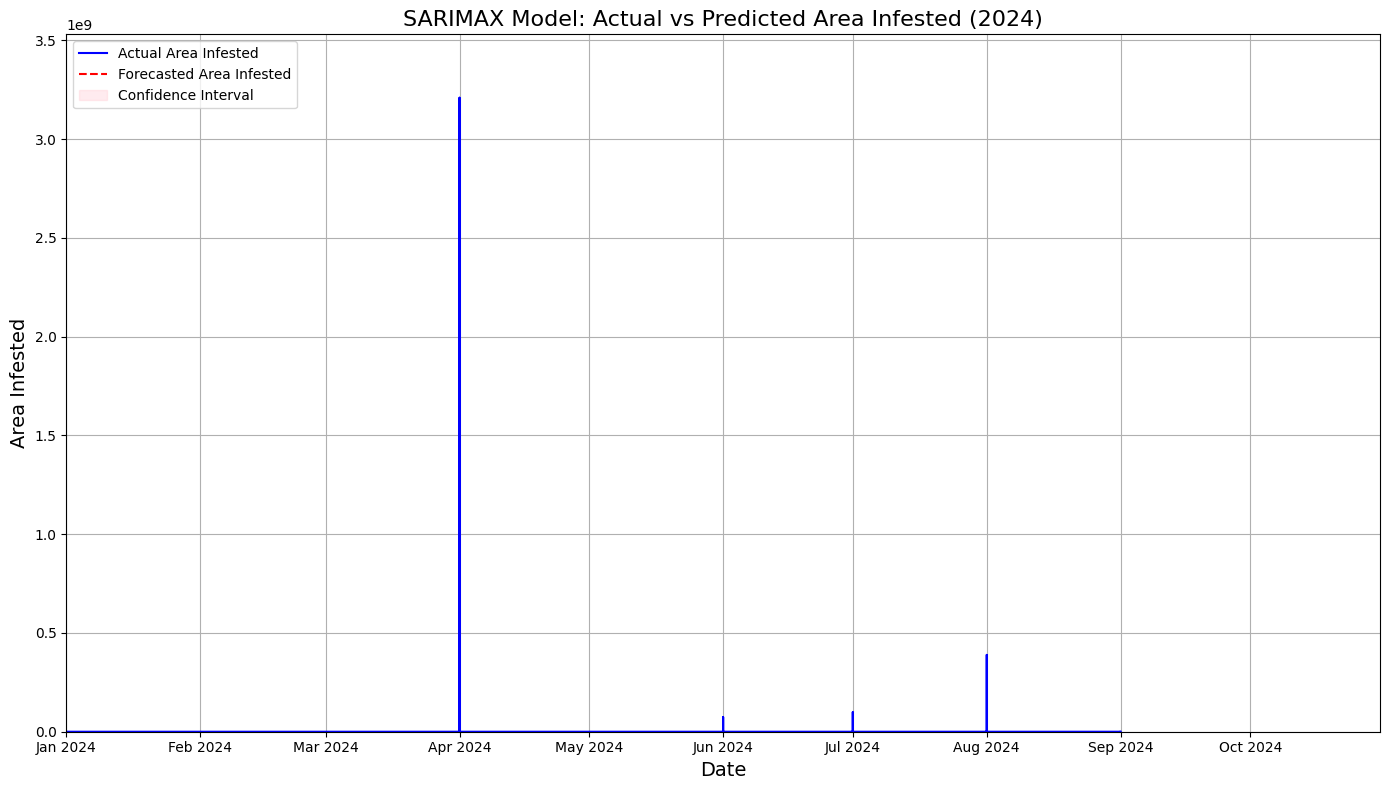

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import warnings
import matplotlib.dates as mdates

warnings.filterwarnings('ignore')

# Step 1: Filter the data for 2024
merged_full_data_cleaned['detection_date'] = pd.to_datetime(merged_full_data_cleaned['detection_date'], errors='coerce')
data_2024 = merged_full_data_cleaned[merged_full_data_cleaned['detection_date'].dt.year == 2024]

# Set 'detection_date' as the index
data_2024.set_index('detection_date', inplace=True)

# Target variable and exogenous variables
target_column = 'area_infested'  # Replace with your target variable
exog_columns = ['Temperature Min (°C)', 'Temperature Max (°C)', 'Humidity (%)',
                'Precipitation (mm)', 'Wind Speed (m/s)']  # Replace with your exogenous variables

# Extract target and exogenous variables
y = data_2024[target_column]
X = data_2024[exog_columns]

# Step 2: Check for stationarity
def check_stationarity(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] <= 0.05:
        print("The series is stationary.")
    else:
        print("The series is non-stationary. Consider differencing.")

check_stationarity(y)

# If the series is non-stationary, apply differencing
if adfuller(y)[1] > 0.05:
    y_diff = y.diff().dropna()  # First-order differencing
    check_stationarity(y_diff)
else:
    y_diff = y  # Series is already stationary

# Step 3: Define SARIMAX parameters
# Use ACF and PACF to determine p, d, q
p, d, q = 1, 1, 1  # Example values; tune based on ACF/PACF
P, D, Q, s = 1, 1, 1, 12  # Seasonal parameters; s=12 for monthly seasonality

# Step 4: Fit the SARIMAX model
model = SARIMAX(y_diff, exog=X, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarimax_model = model.fit(disp=False)

# Print model summary
print(sarimax_model.summary())

# Step 5: Make predictions
forecast_steps = len(y_diff)  # Predict for the same number of observations
forecast = sarimax_model.get_forecast(steps=forecast_steps, exog=X)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Step 6: Evaluate the model
rmse = np.sqrt(mean_squared_error(y_diff, forecast_mean))
print(f"RMSE: {rmse:.2f}")

# Step 7: Plot actual vs predicted values
plt.figure(figsize=(14, 8))

# Plot actual data
plt.plot(y_diff.index, y_diff, label='Actual Area Infested', color='blue')

# Plot forecasted data
plt.plot(forecast_mean.index, forecast_mean, label='Forecasted Area Infested', color='red', linestyle='--')

# Fill the confidence interval
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1],
                 color='pink', alpha=0.3, label='Confidence Interval')

# Add titles and labels
plt.title('SARIMAX Model: Actual vs Predicted Area Infested (2024)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Area Infested', fontsize=14)

# Format x-axis to display months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Monthly ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as Month Year
plt.xlim(pd.to_datetime('2024-01-01'), pd.to_datetime('2024-10-31'))  # Focus on 2024 data only

# Adjust y-axis to start from 0
max_area = max(y_diff.max(), forecast_mean.max())  # Get max of actual and predicted values
plt.ylim(0, max_area * 1.1)  # Extend 10% above maximum for better spacing

# Add grid, legend, and finalize layout
plt.grid(True)
plt.legend(loc='upper left')
plt.tight_layout()

# Display the plot
plt.show()


### **Step 8: Build and Forecast with SARIMAX Model (Summary)**

In Step 8, we use the SARIMAX model to forecast pest infestation areas based on historical data and environmental factors. Here's a concise breakdown:

1. **Data Aggregation**: The data is grouped by pest and date, summing the `area_infested` and averaging weather variables like temperature, humidity, and precipitation.

2. **Model Building**: For each pest, a SARIMAX model is created with `area_infested` as the target variable and weather factors as predictors. Missing values in the predictors are filled with column averages.

3. **Forecasting**: The model forecasts pest infestation for the next 30 days, using historical weather data as a proxy for future conditions. A confidence interval is also calculated.

4. **Visualization**: The actual and forecasted infestation areas are plotted, with the confidence interval shown as a shaded area.

This process helps predict future pest activity, aiding in effective pest management strategies.


Building SARIMAX model for pest: AFRICAN ARMYWORM


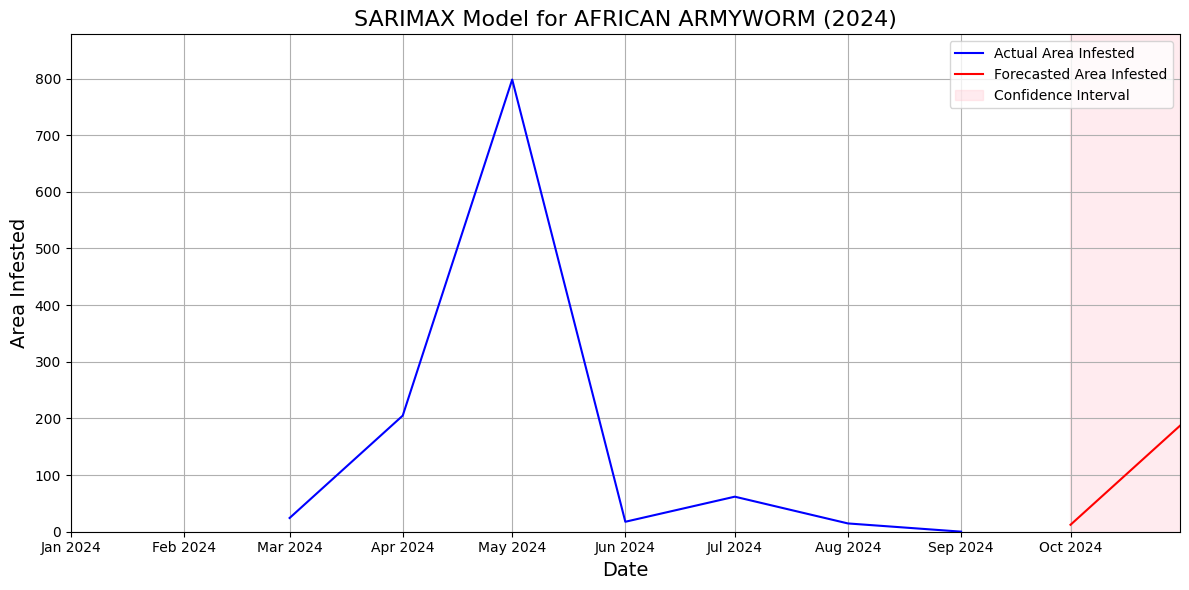


Building SARIMAX model for pest: AFRICAN BOLLWORM


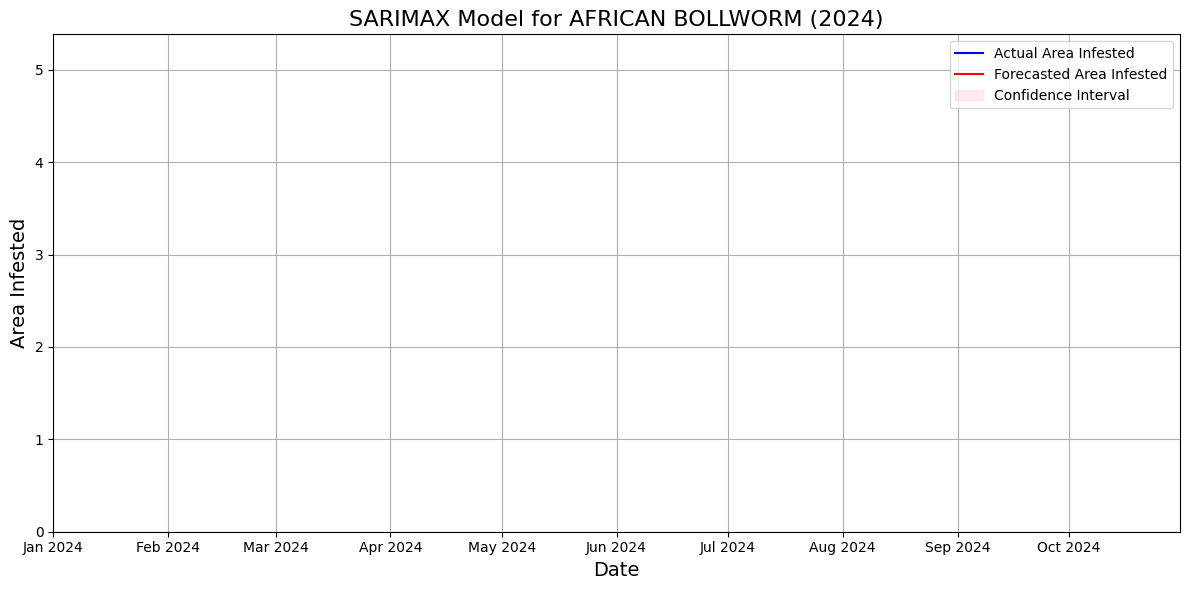


Building SARIMAX model for pest: ALTERNARIA LEAF BLIGHT


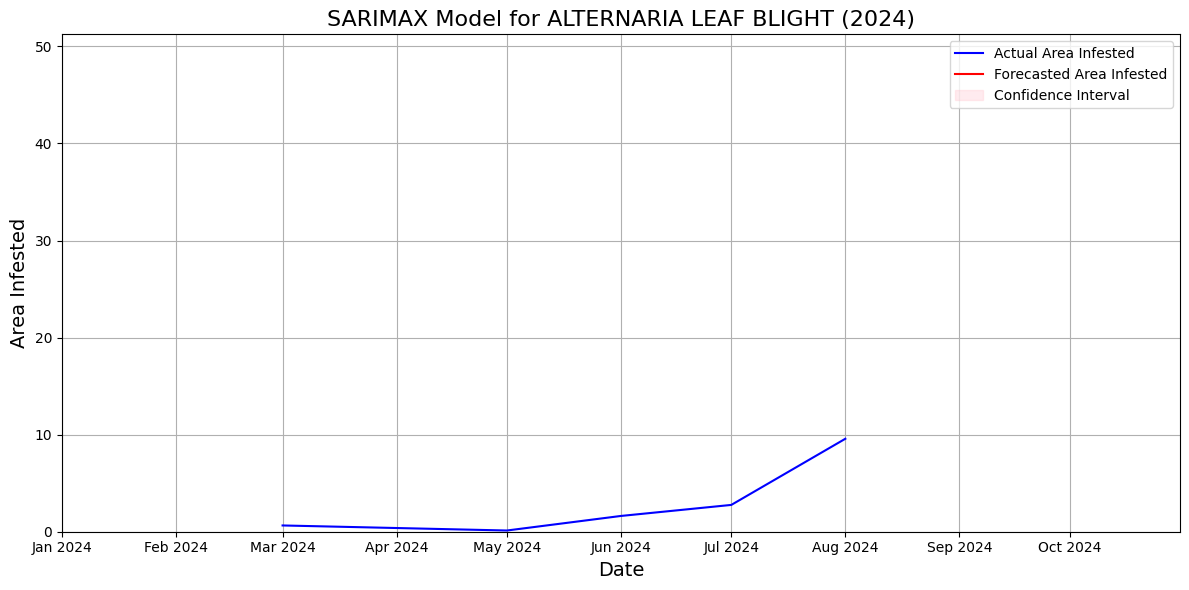


Building SARIMAX model for pest: ANGULAR LEAF SPOT


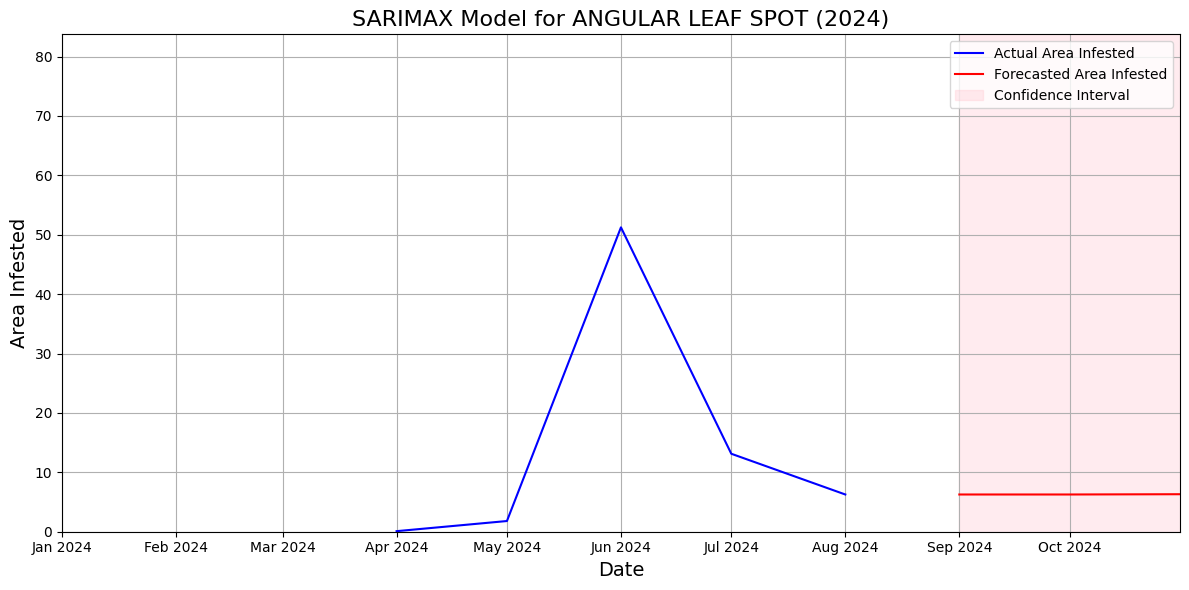


Building SARIMAX model for pest: ANTESTIA BUGS
Could not build SARIMAX model for pest ANTESTIA BUGS: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

Building SARIMAX model for pest: ANTHRACNOSE
Could not build SARIMAX model for pest ANTHRACNOSE: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

Building SARIMAX model for pest: APHIDS
Could not build SARIMAX model for pest APHIDS: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

Building SARIMAX model for pest: APPLE SCAB


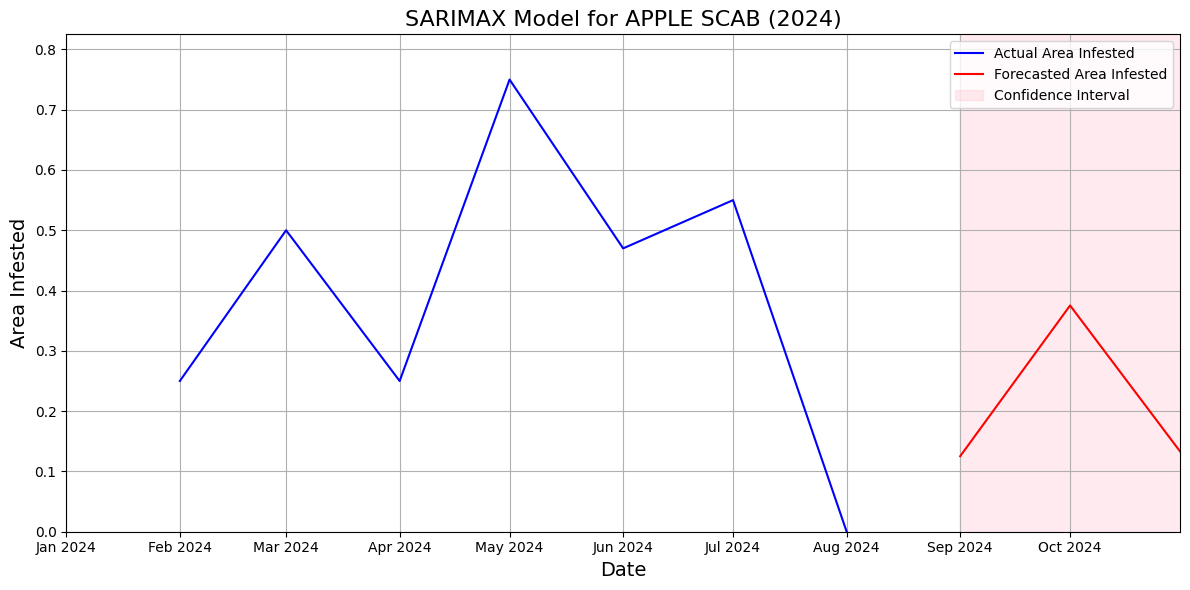


Building SARIMAX model for pest: AVOCADO ROOT ROT


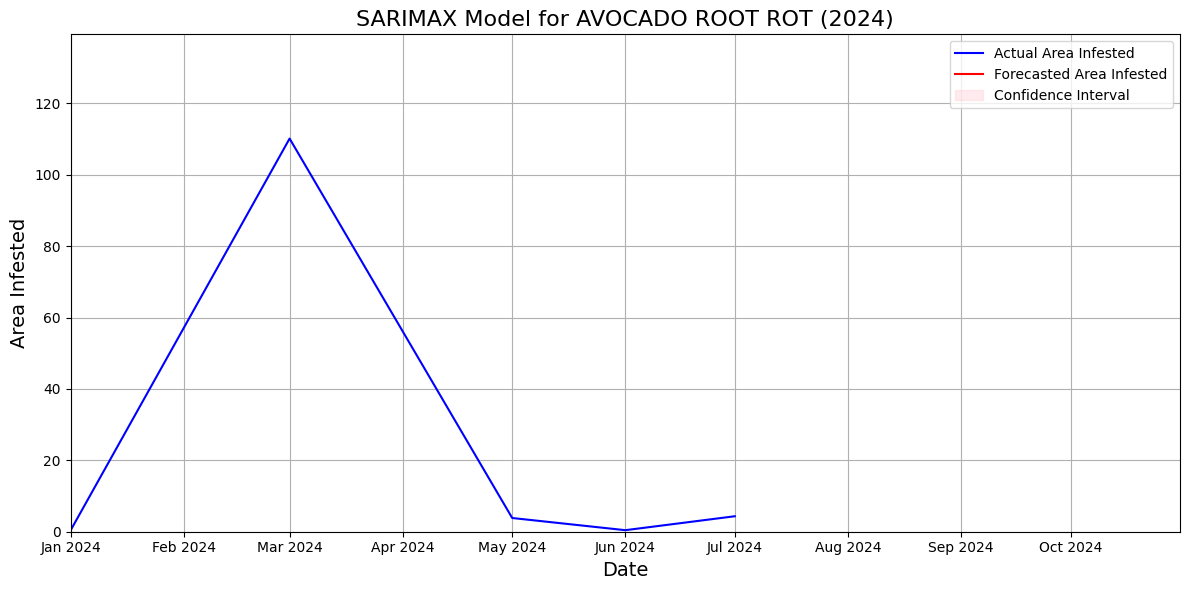


Building SARIMAX model for pest: BACTERIAL BLACK SPOT


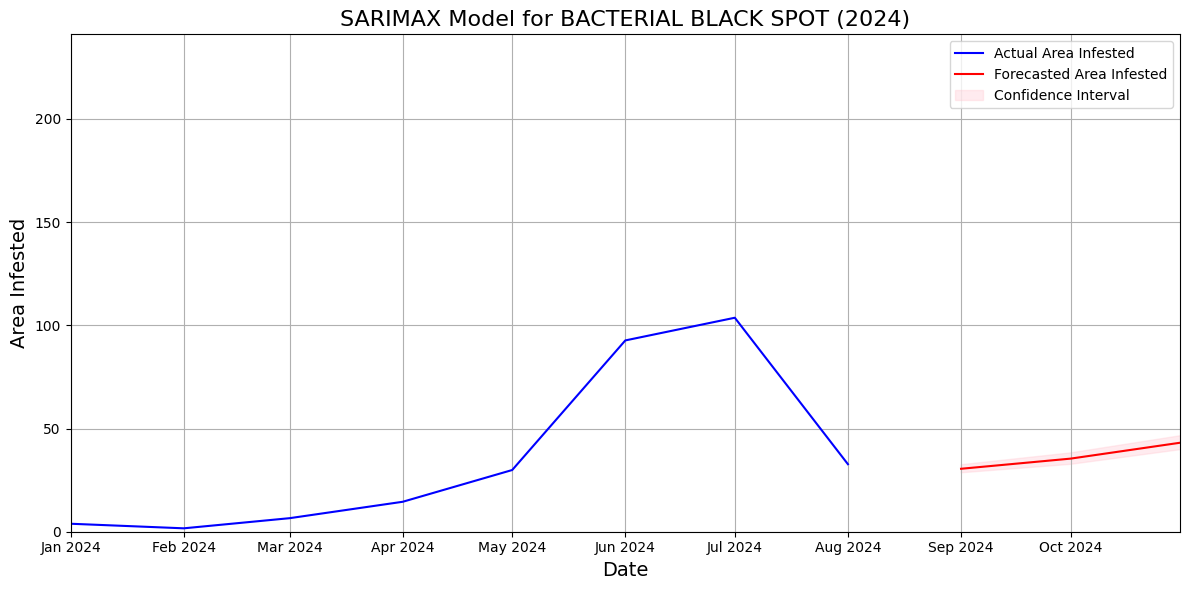


Building SARIMAX model for pest: BACTERIAL BLIGHT


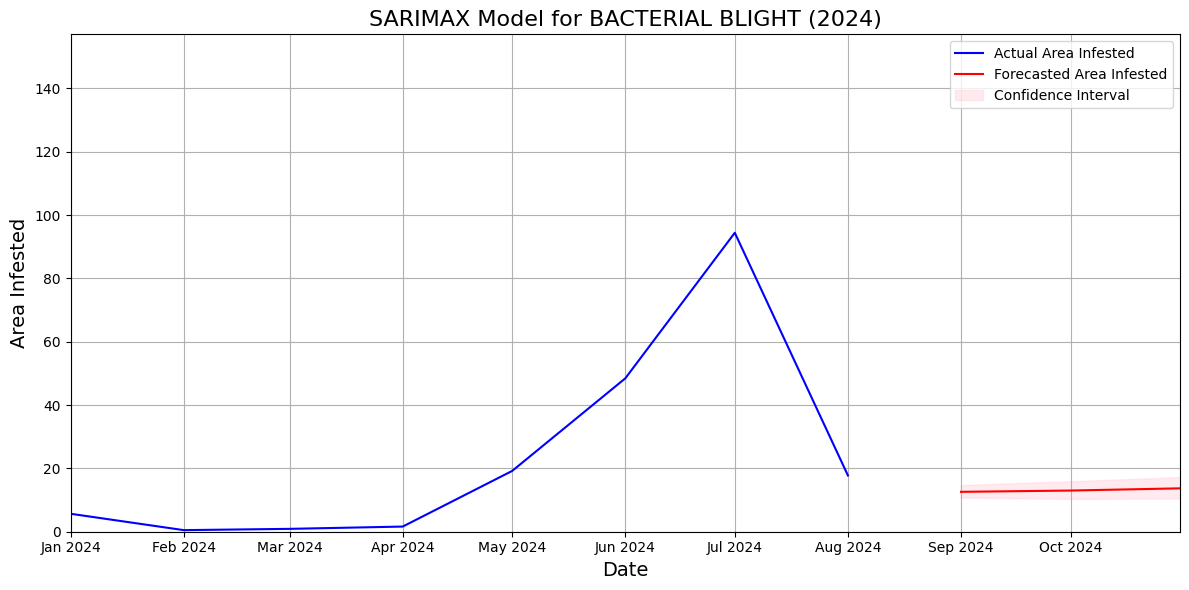


Building SARIMAX model for pest: BACTERIAL LEAF BLIGHT


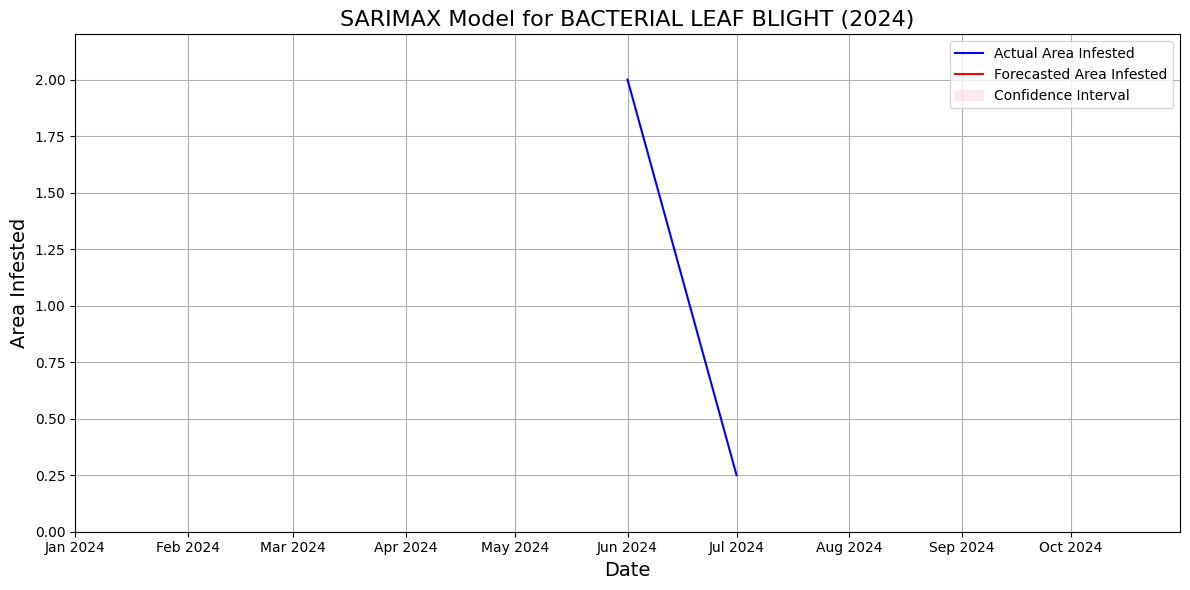


Building SARIMAX model for pest: BACTERIAL SOFT ROT


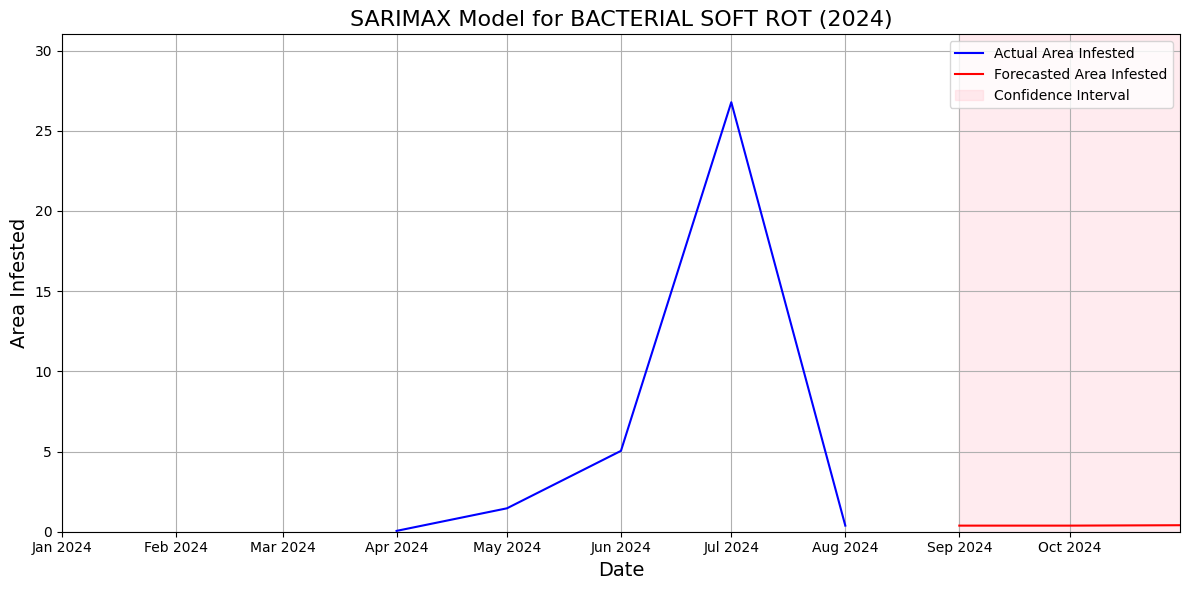


Building SARIMAX model for pest: BAGRADA BUGS


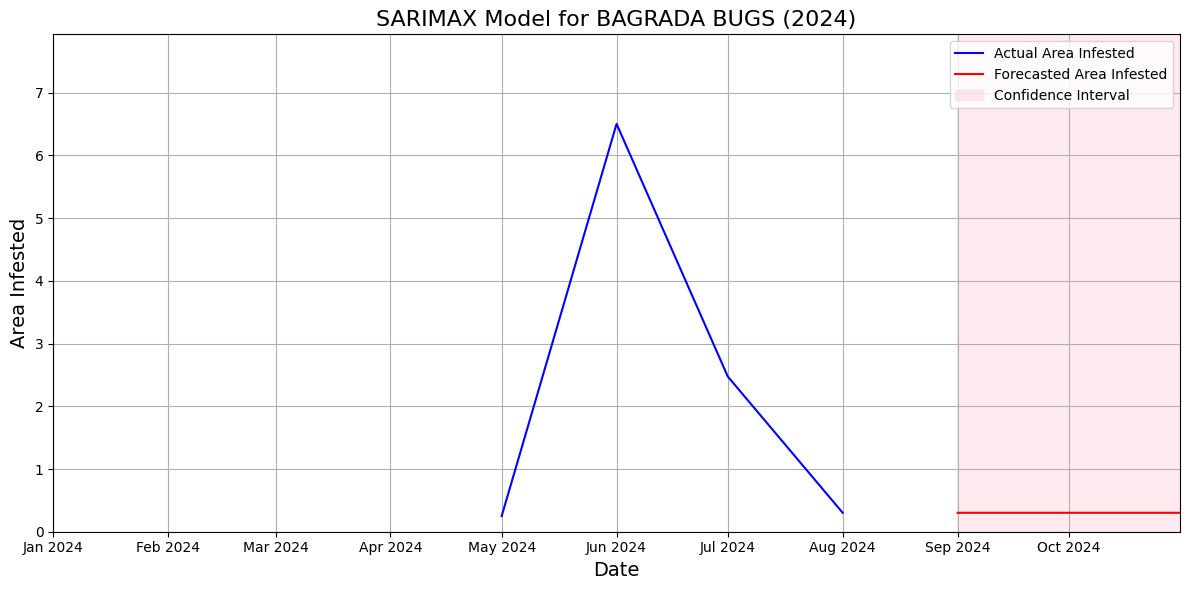


Building SARIMAX model for pest: BANANA BUNCHY TOP VIRUS


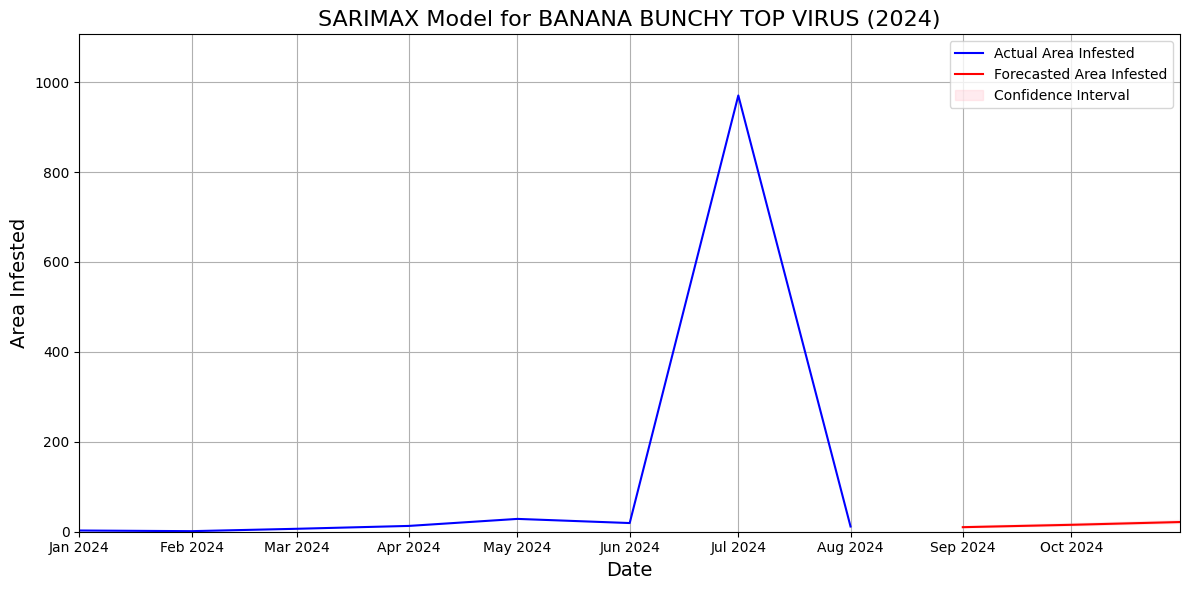


Building SARIMAX model for pest: BANANA MOSAIC VIRUS


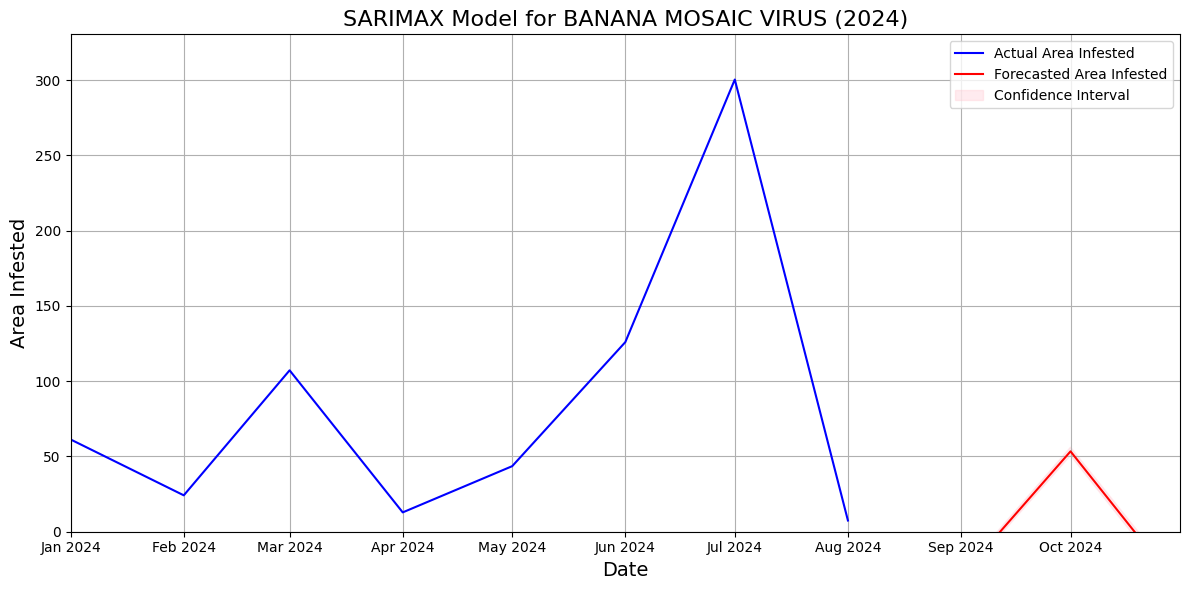


Building SARIMAX model for pest: BANANA WEEVILS


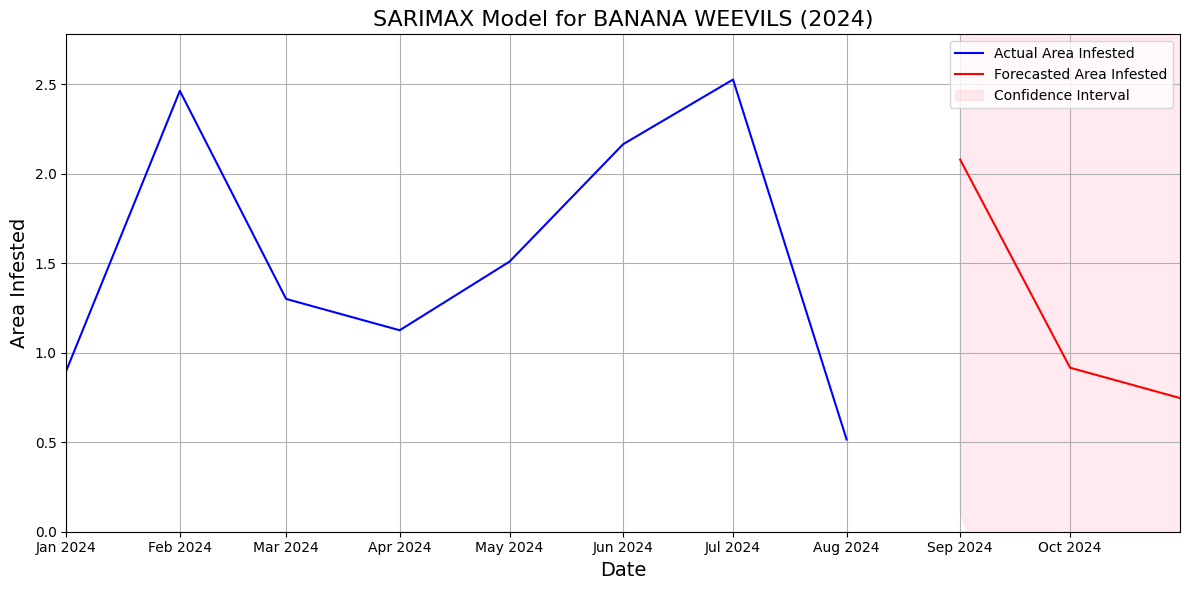


Building SARIMAX model for pest: BEAN FLIES


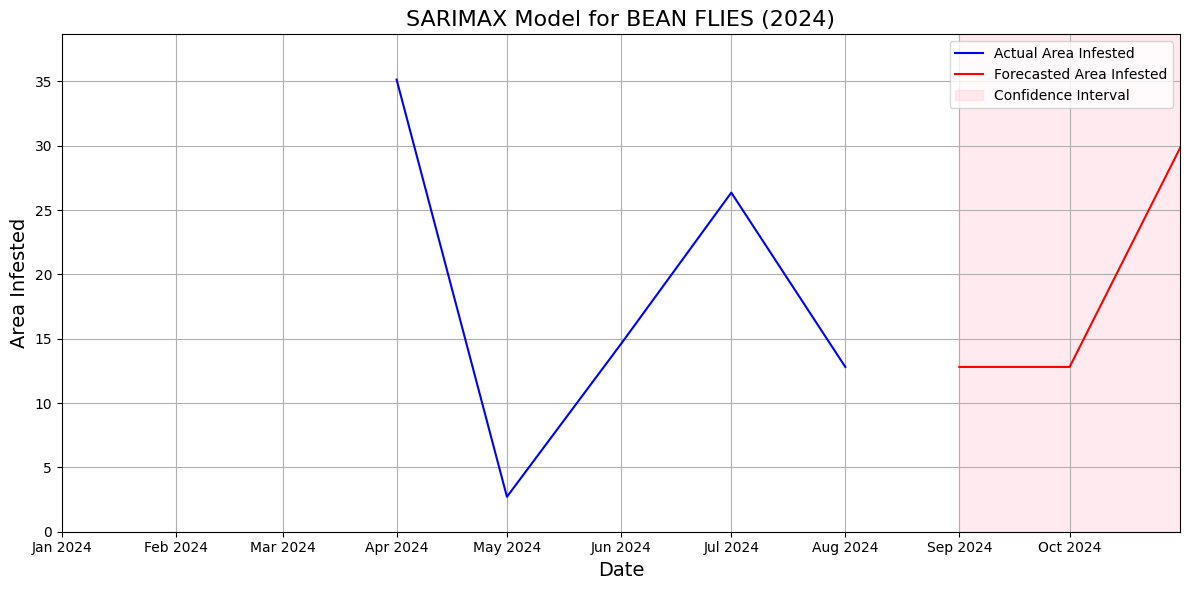


Building SARIMAX model for pest: BIRDS


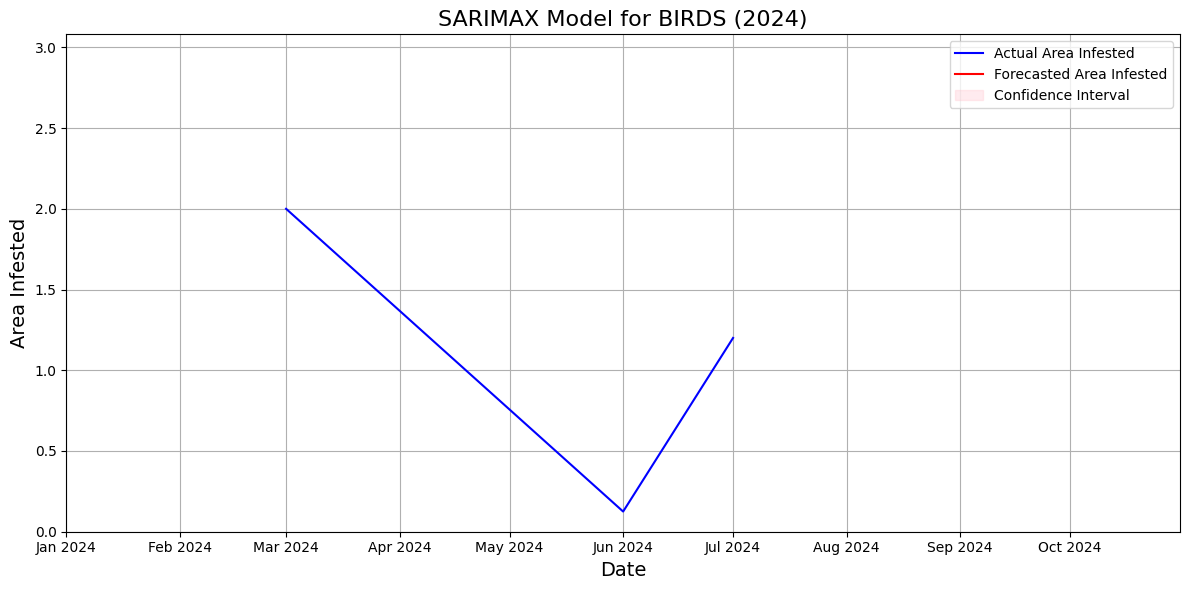


Building SARIMAX model for pest: BLACK MOULD


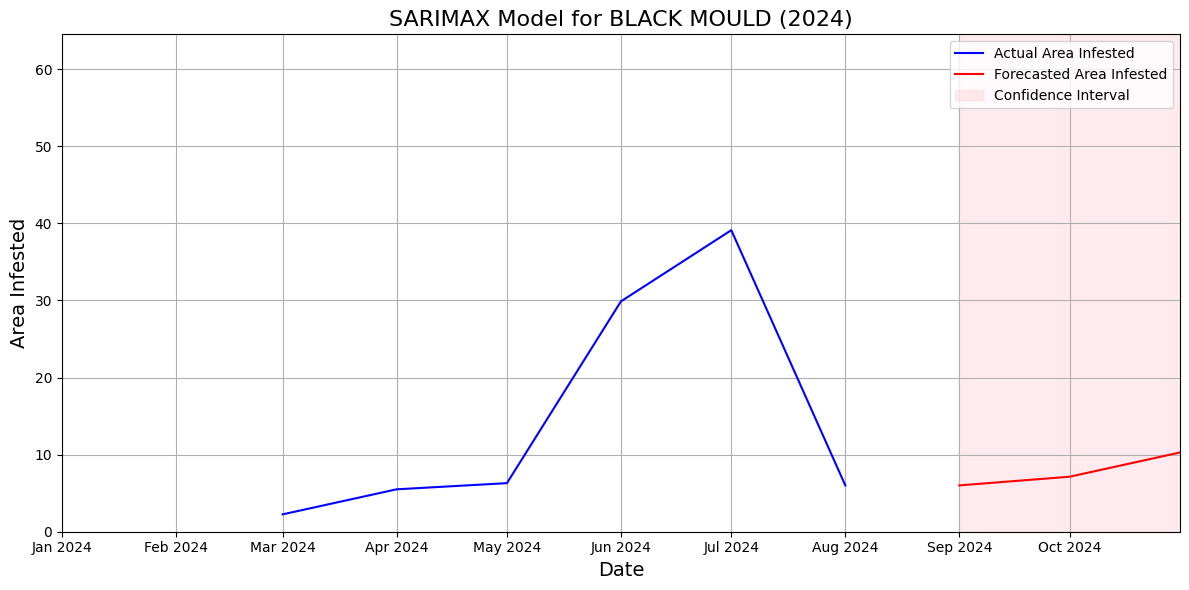


Building SARIMAX model for pest: BLACK ROT


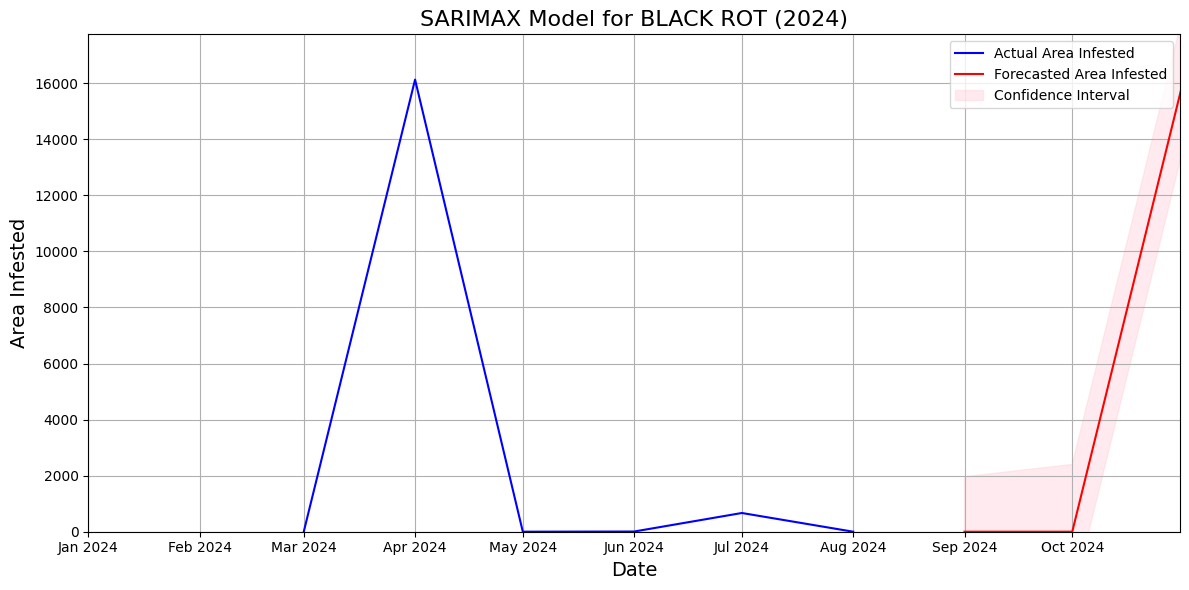


Building SARIMAX model for pest: BLACK SPOT


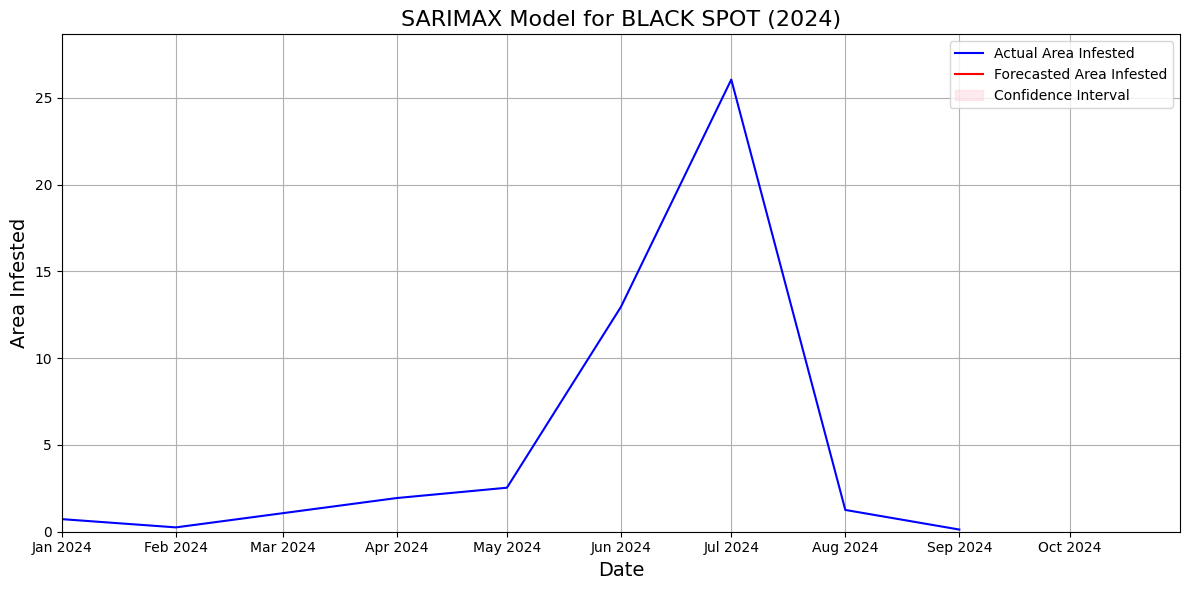


Building SARIMAX model for pest: BLISTER BEETLES


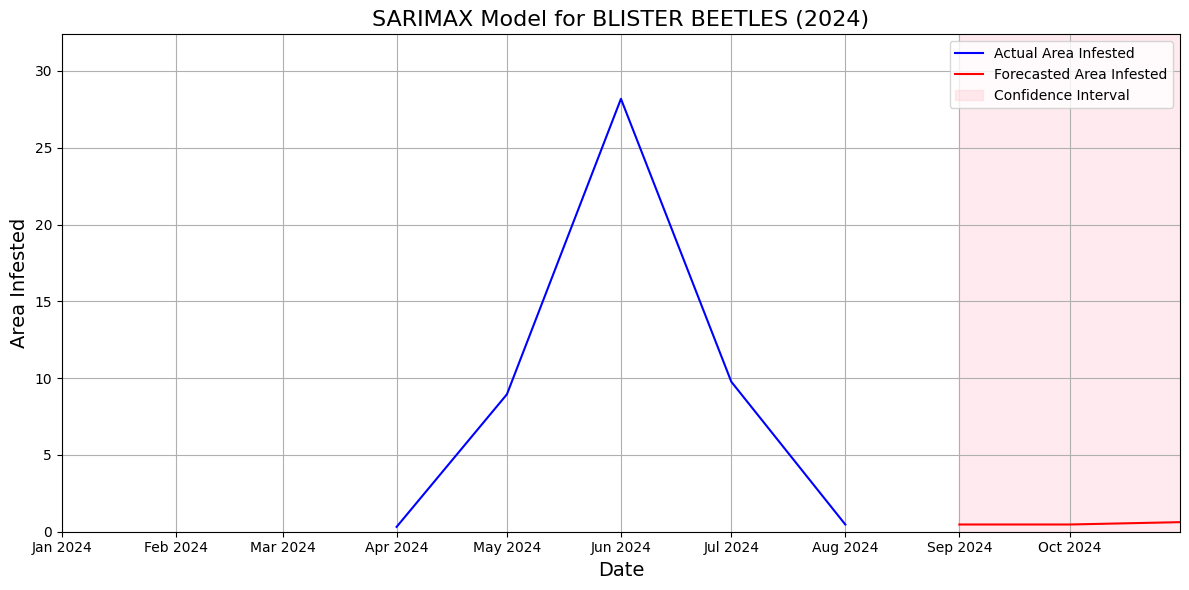


Building SARIMAX model for pest: BLOSSOM END ROT


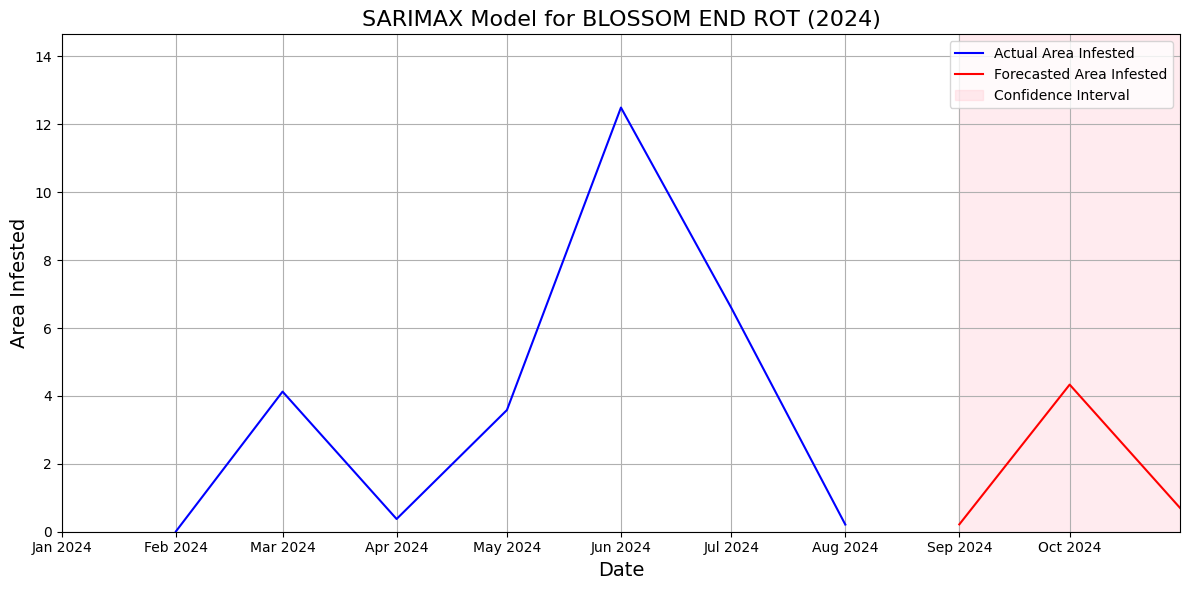


Building SARIMAX model for pest: BOTRYTIS


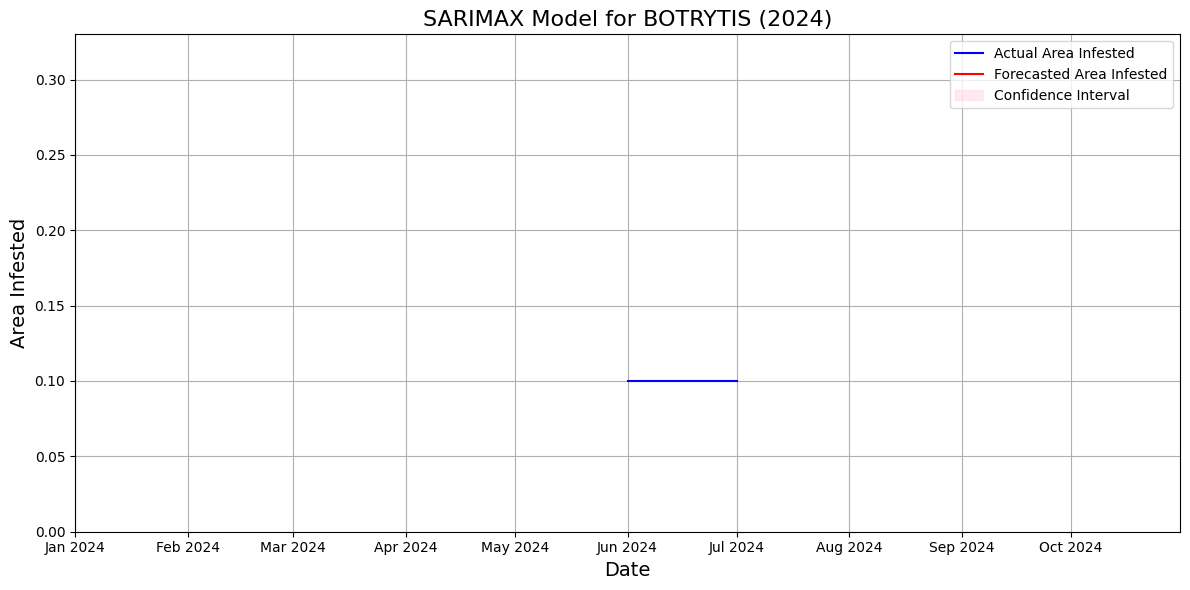


Building SARIMAX model for pest: BROWN LEAF SPOT


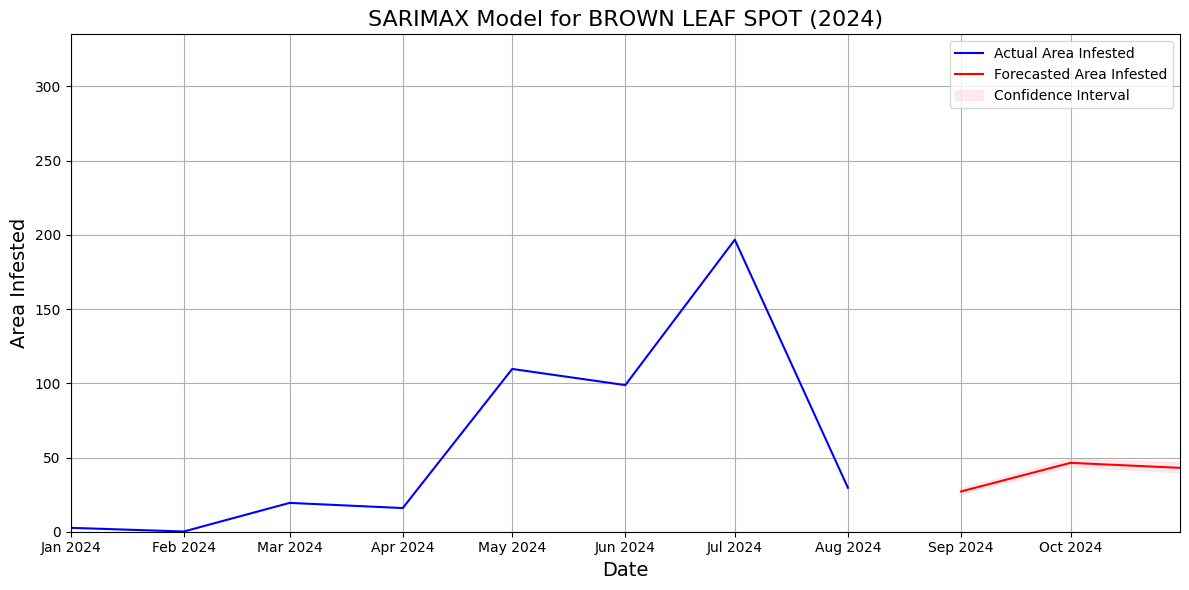


Building SARIMAX model for pest: BROWN SPOT


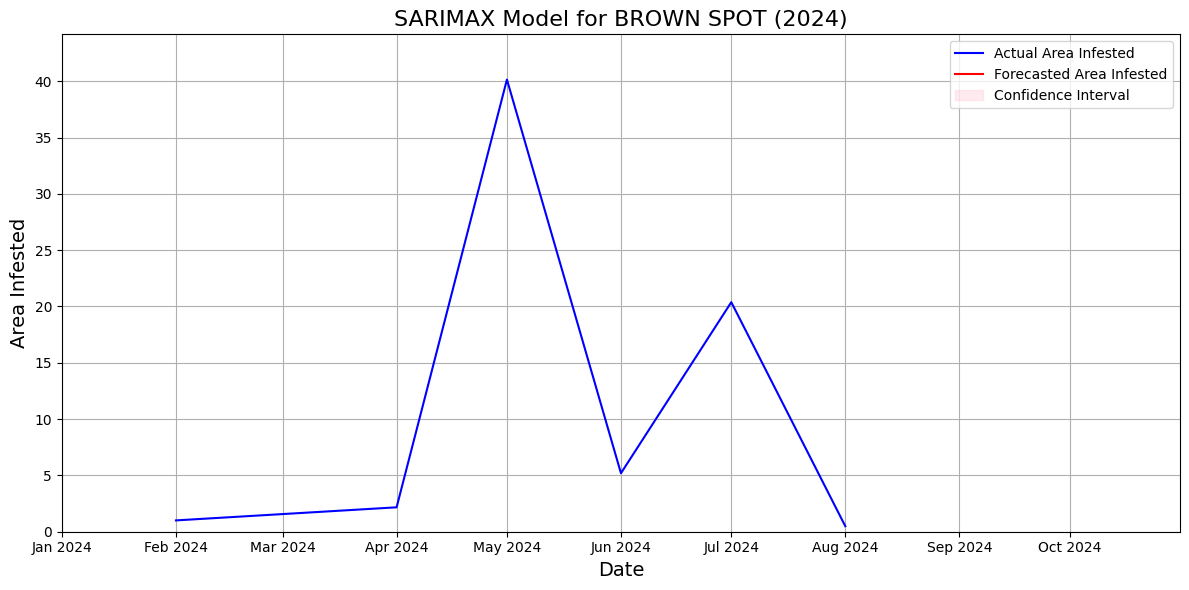


Building SARIMAX model for pest: BUGS


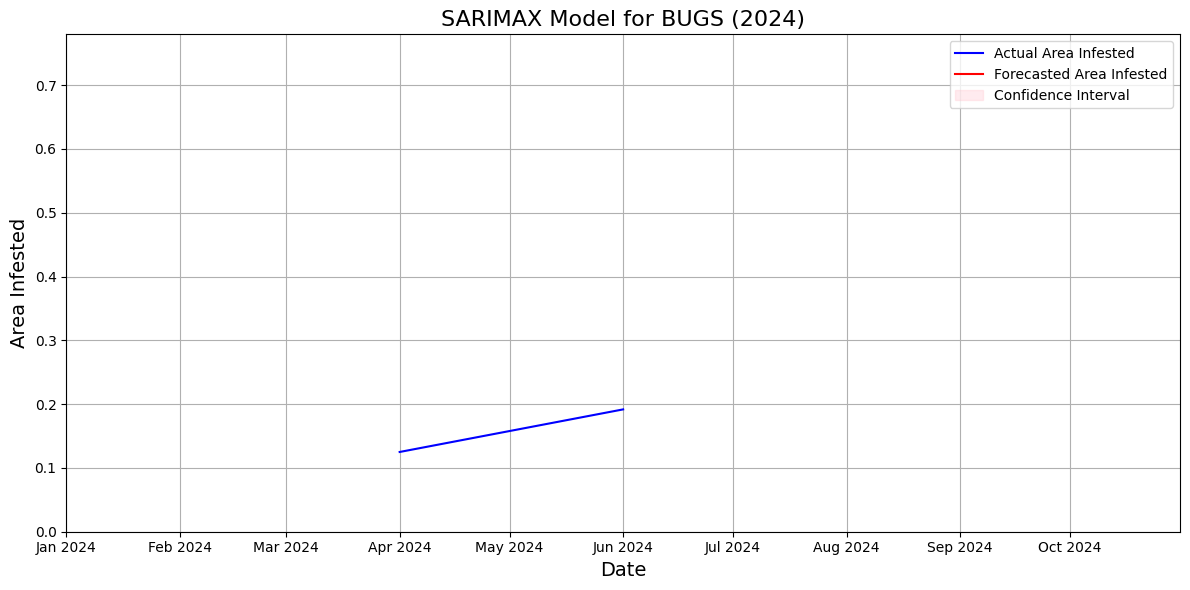


Building SARIMAX model for pest: CANKER


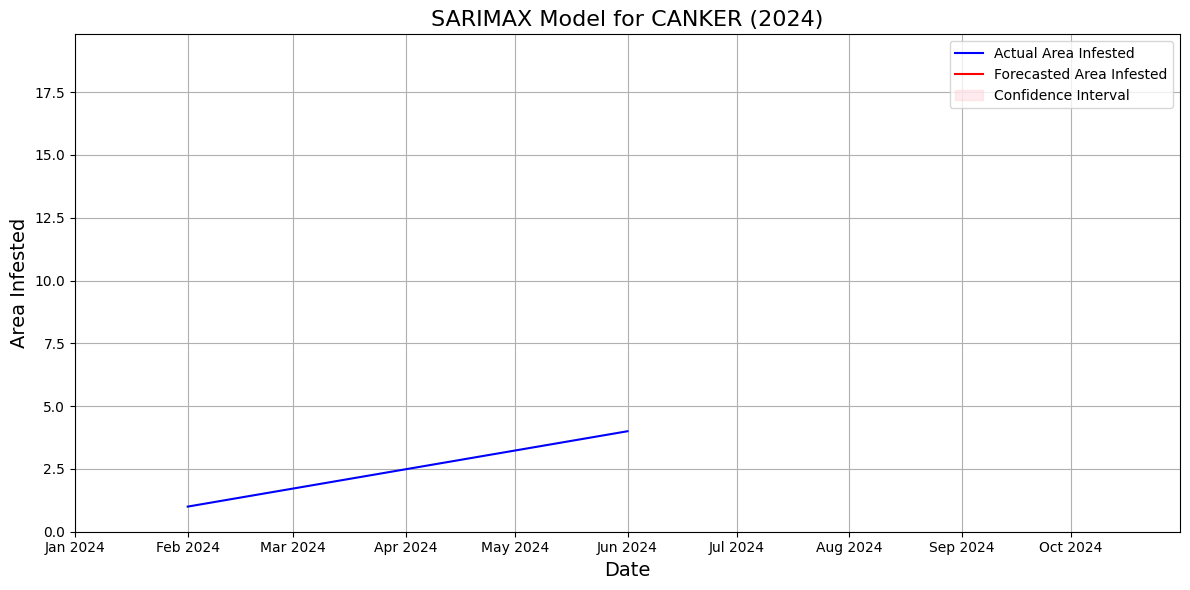


Building SARIMAX model for pest: CASHEW WEEVILS


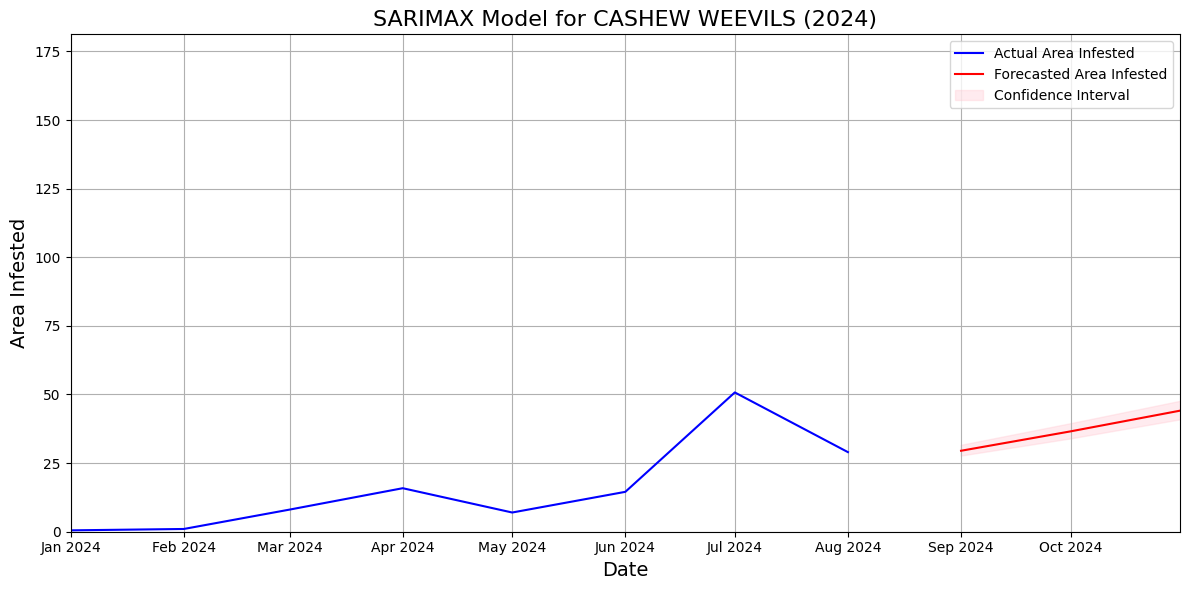


Building SARIMAX model for pest: CASSAVA BROWN STREAK VIRUS


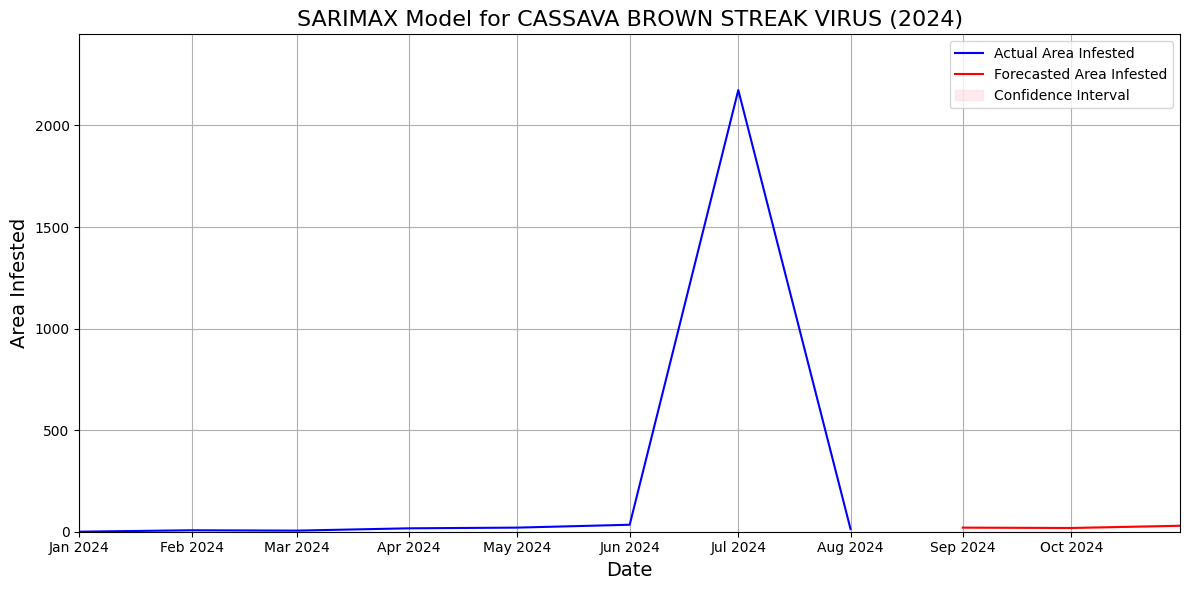


Building SARIMAX model for pest: CASSAVA MOSAIC VIRUS
Could not build SARIMAX model for pest CASSAVA MOSAIC VIRUS: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

Building SARIMAX model for pest: CERCOSPORA LEAF SPOT


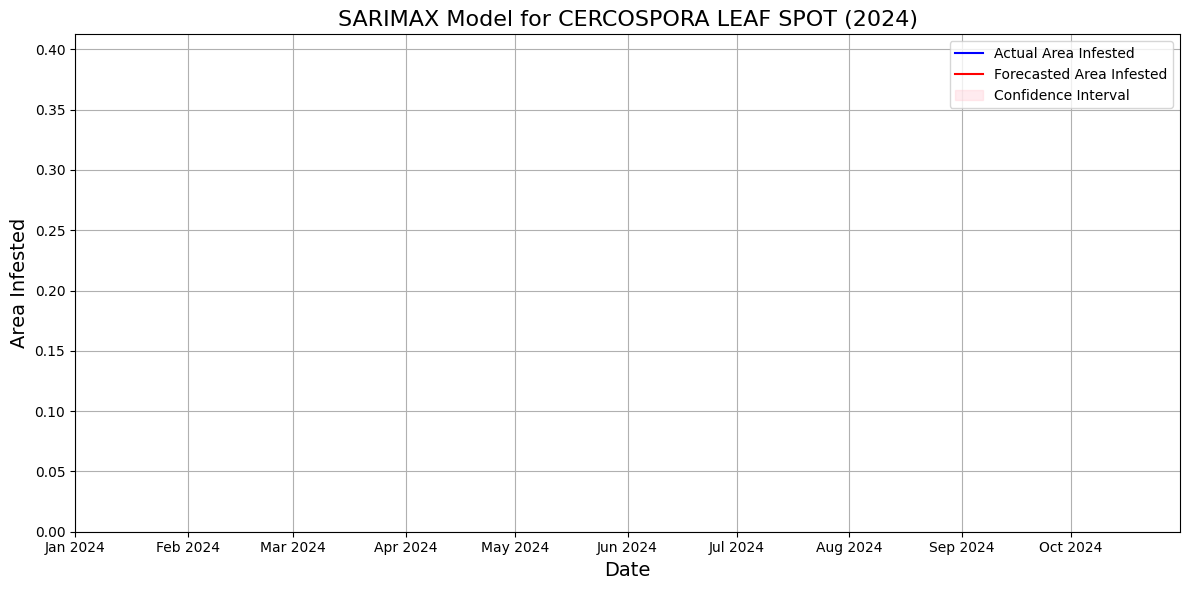


Building SARIMAX model for pest: CHARCOAL ROT


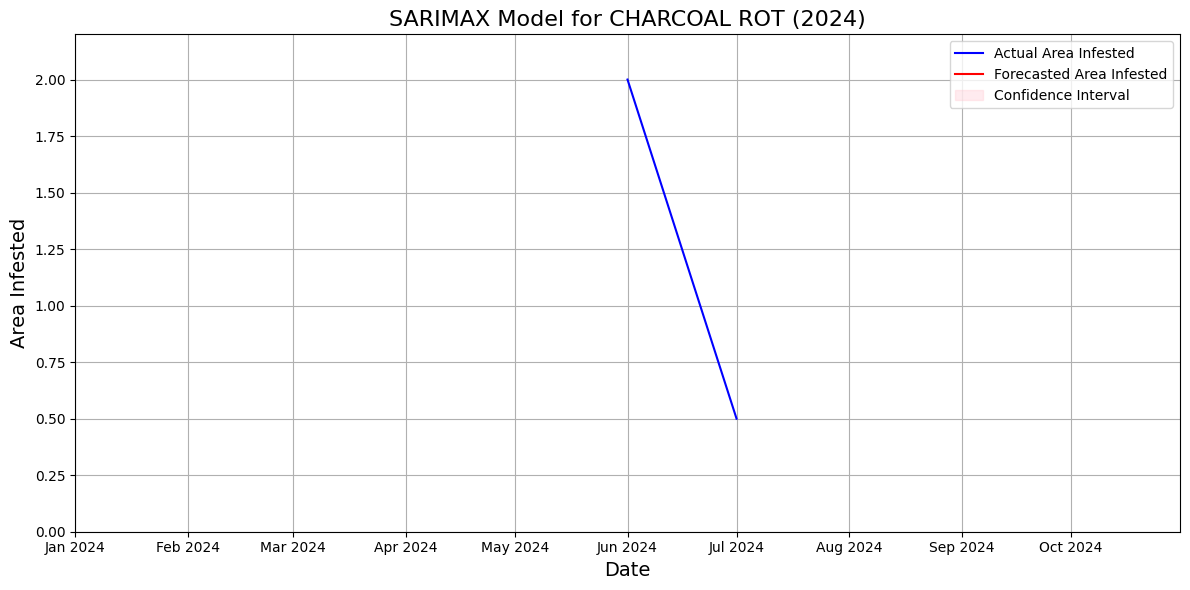


Building SARIMAX model for pest: CIGAR END ROT


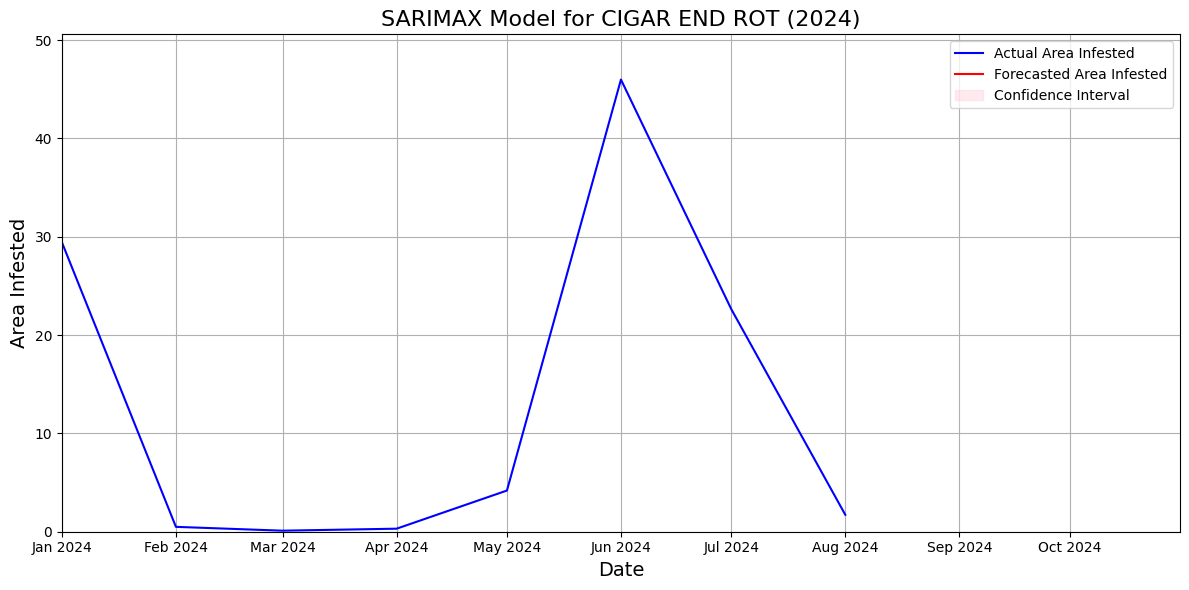


Building SARIMAX model for pest: CLUB ROOT


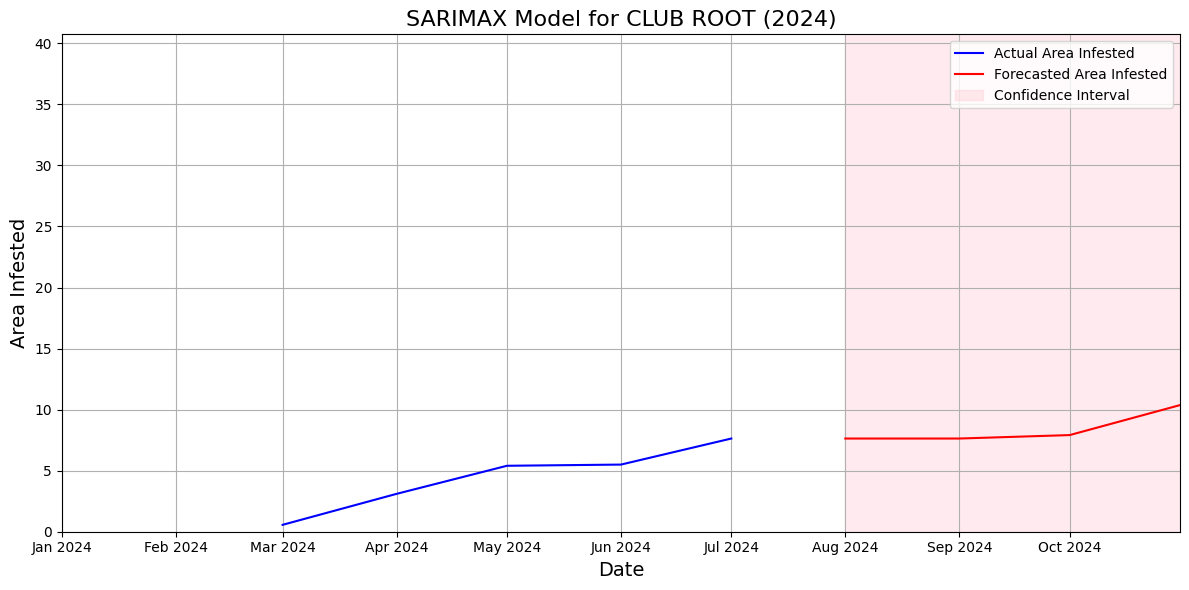


Building SARIMAX model for pest: COFFEE BERRY BORER


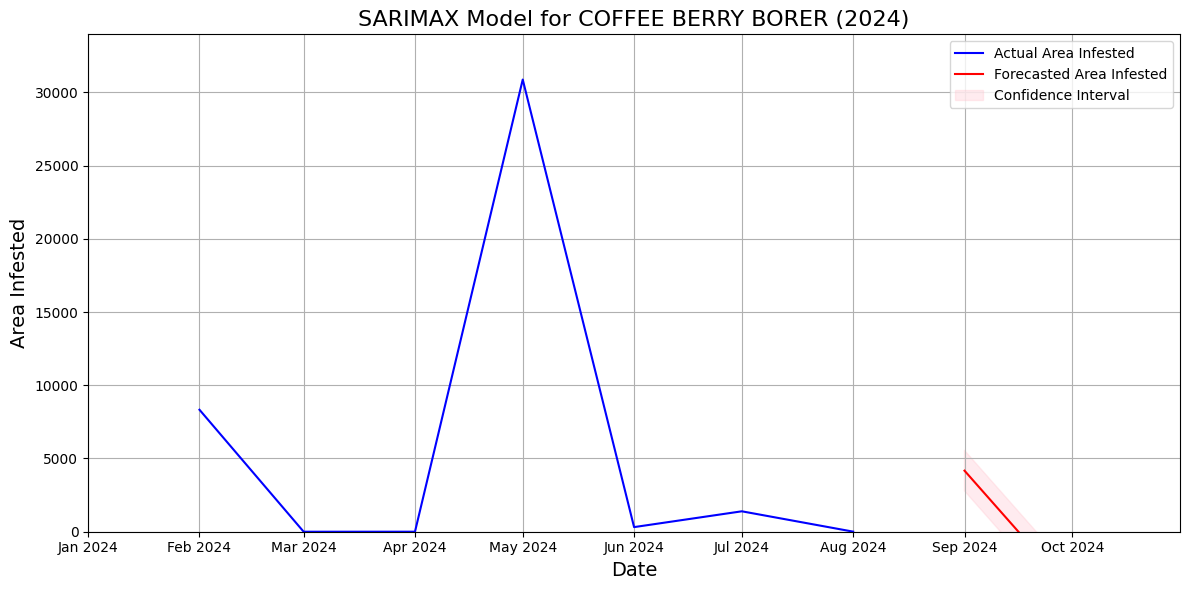


Building SARIMAX model for pest: COFFEE BERRY DISEASE
Could not build SARIMAX model for pest COFFEE BERRY DISEASE: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

Building SARIMAX model for pest: COFFEE LEAF RUST
Could not build SARIMAX model for pest COFFEE LEAF RUST: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

Building SARIMAX model for pest: COFFEE TWIG BORER


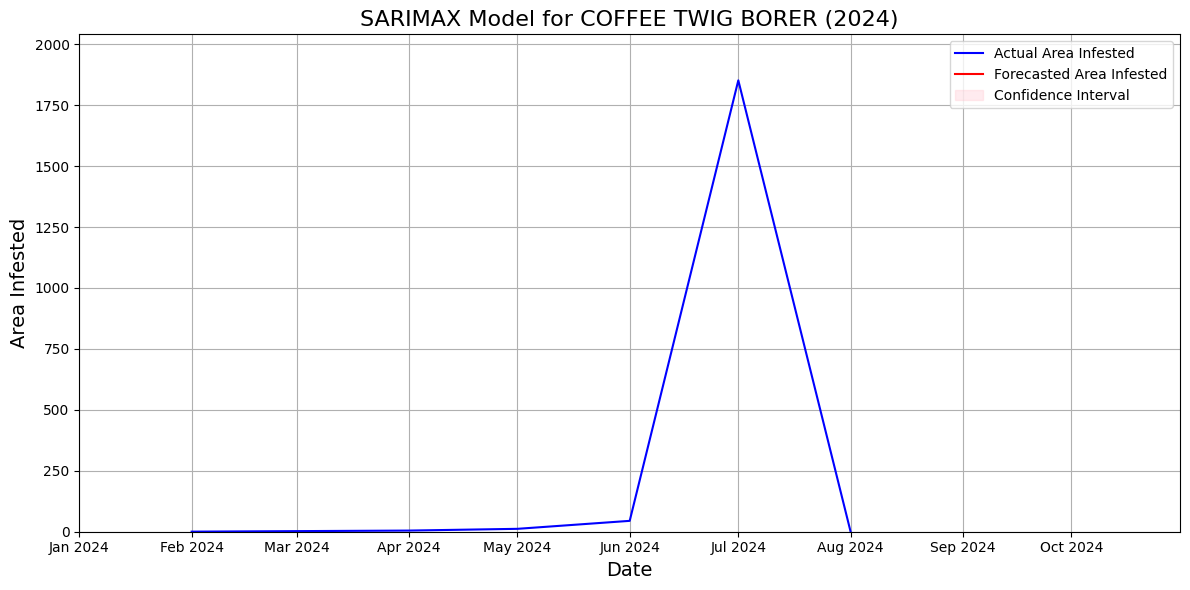


Building SARIMAX model for pest: COFFEE WILT


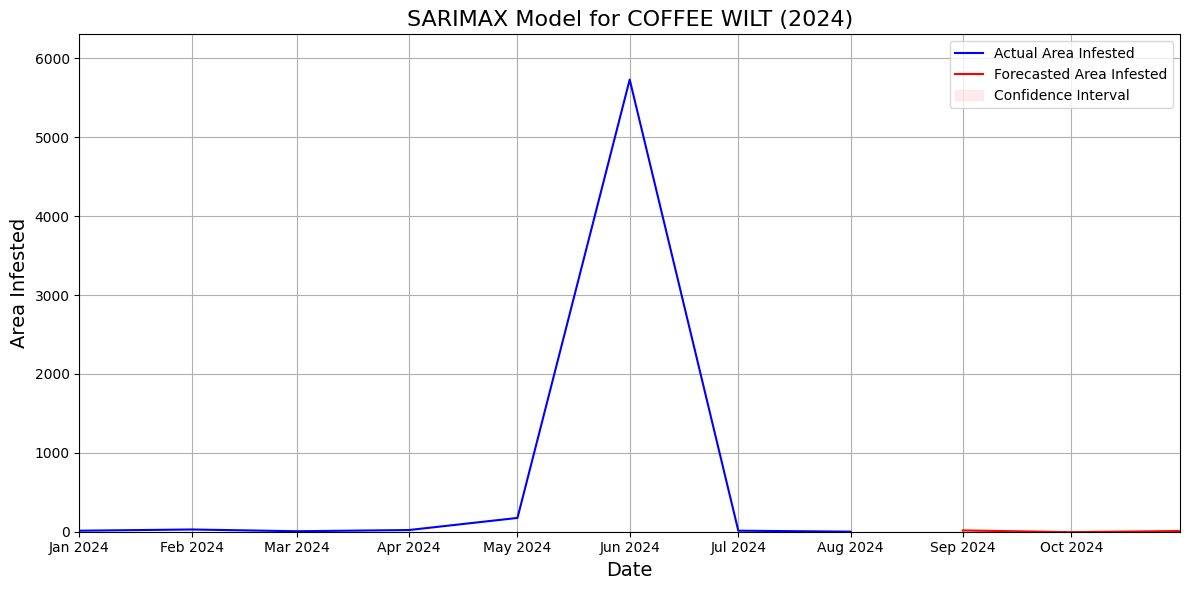


Building SARIMAX model for pest: COLLORADO BEETLES


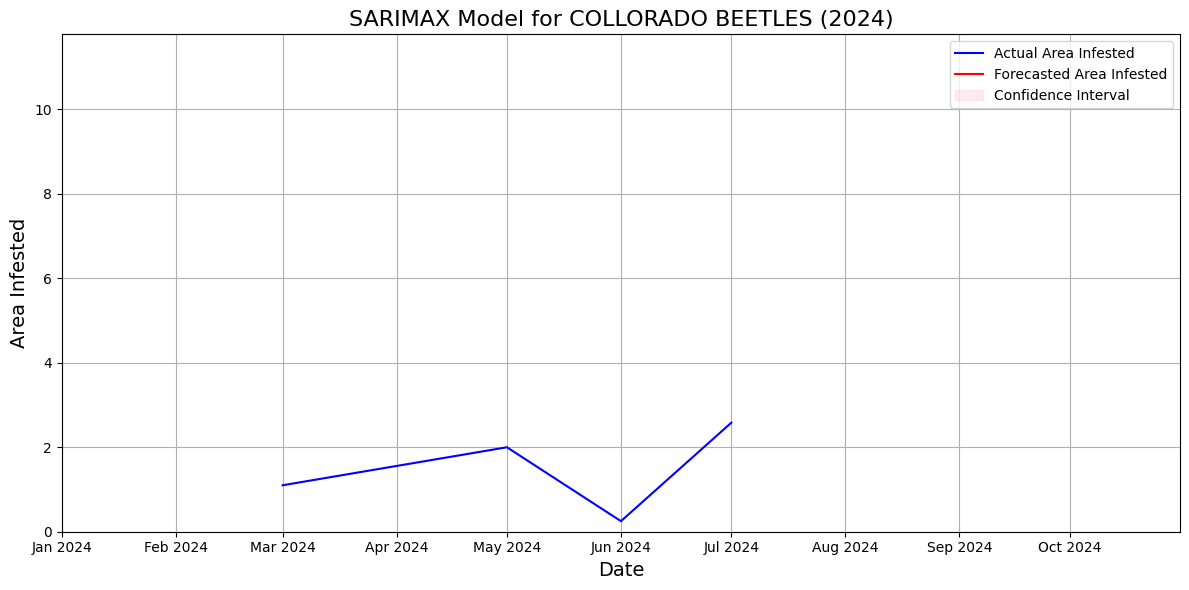


Building SARIMAX model for pest: COTTON BOLLWORMS


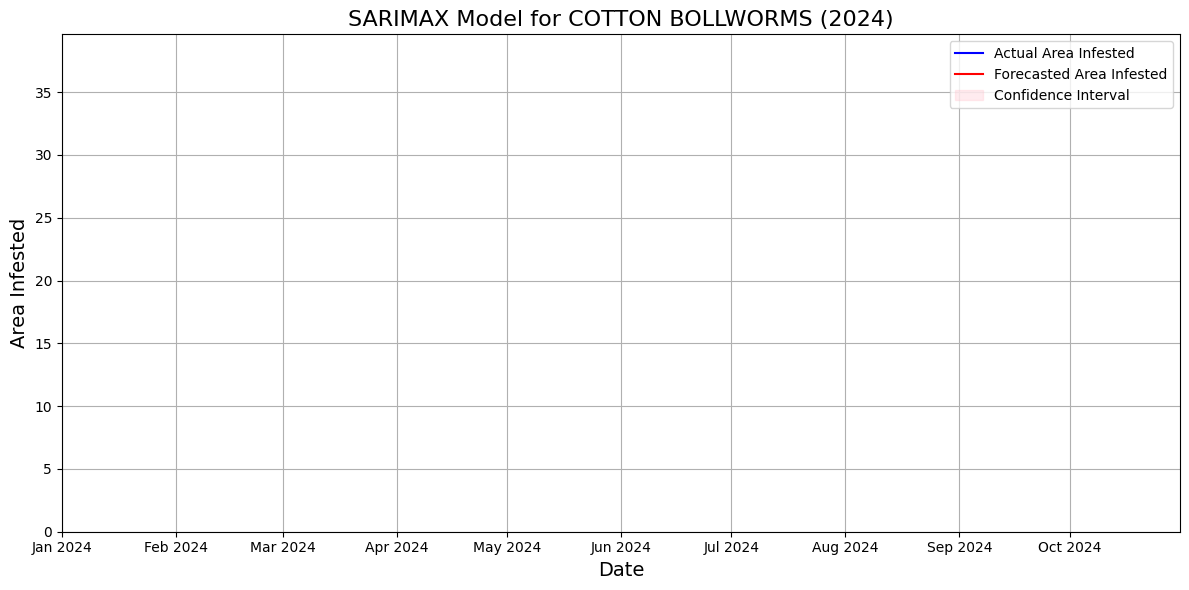


Building SARIMAX model for pest: CROWN RUST


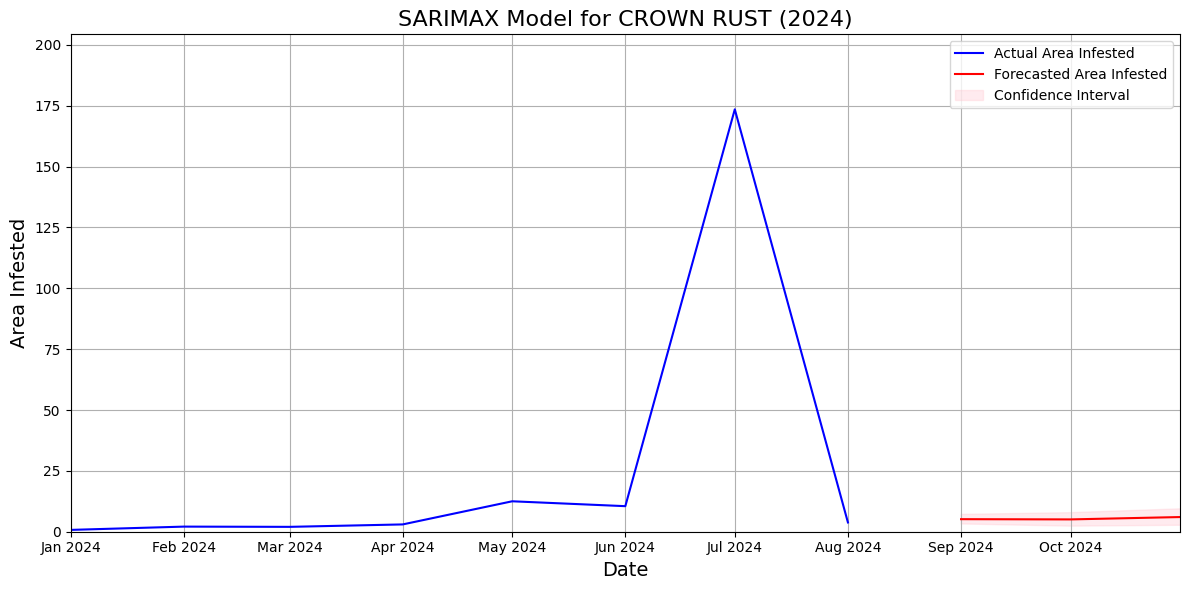


Building SARIMAX model for pest: CUTWORM


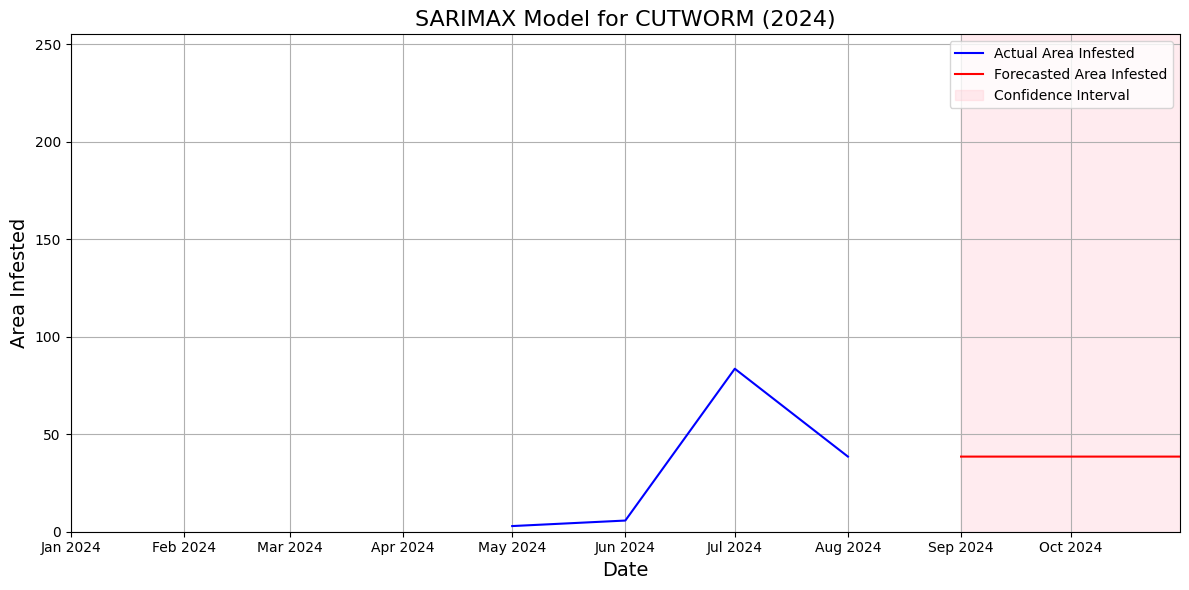


Building SARIMAX model for pest: DAMPING OFF


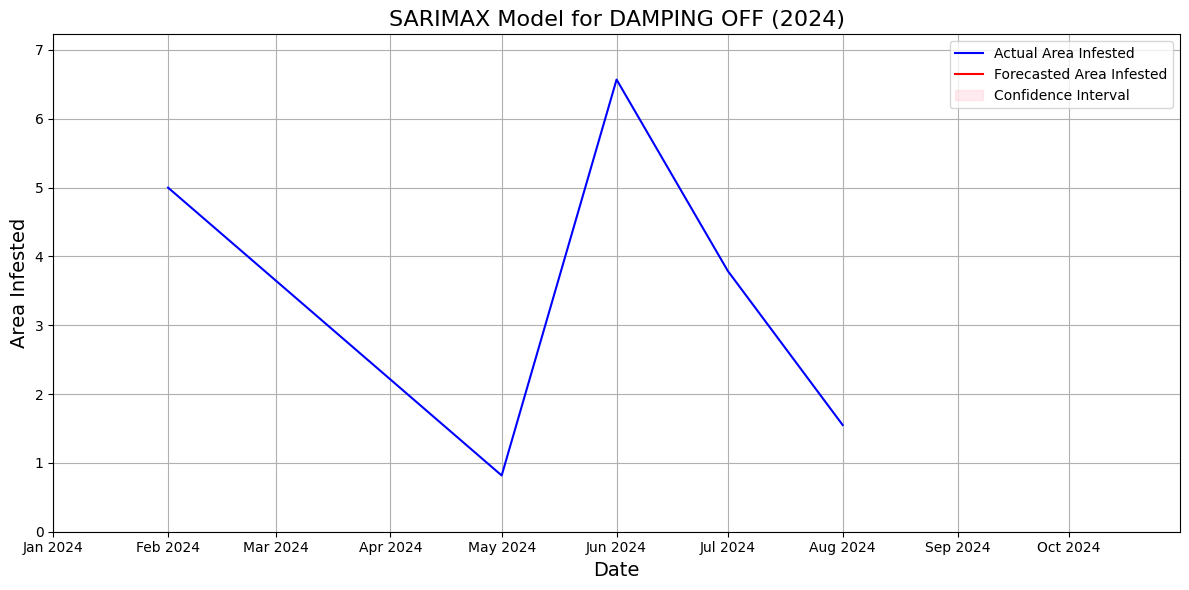


Building SARIMAX model for pest: DESERT LOCUSTS


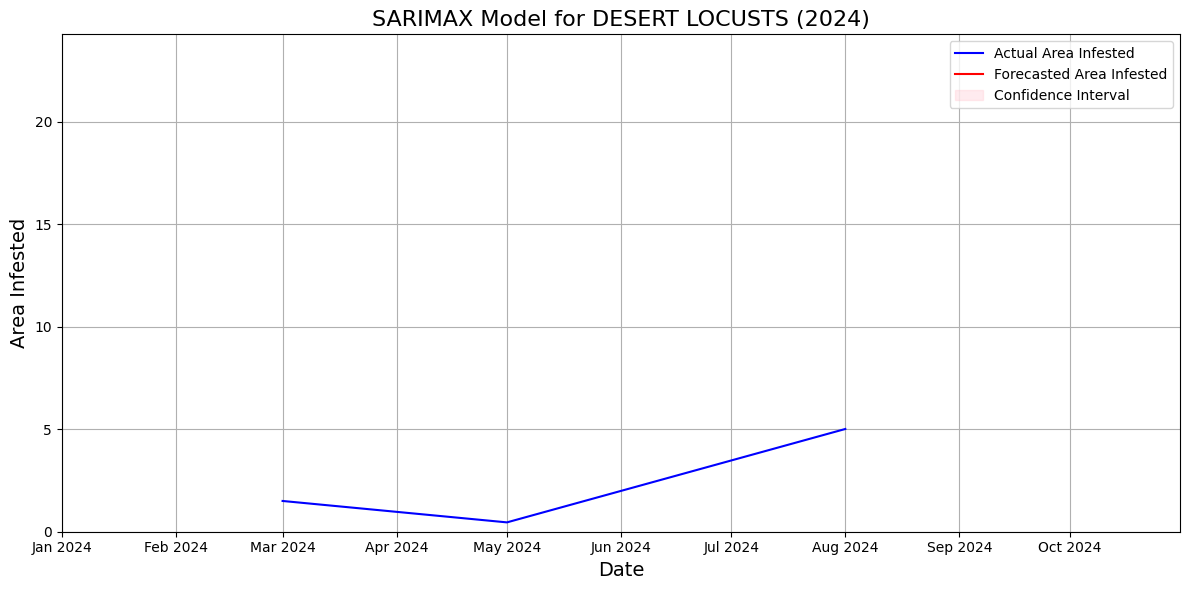


Building SARIMAX model for pest: DIAMONDBACK MOTH


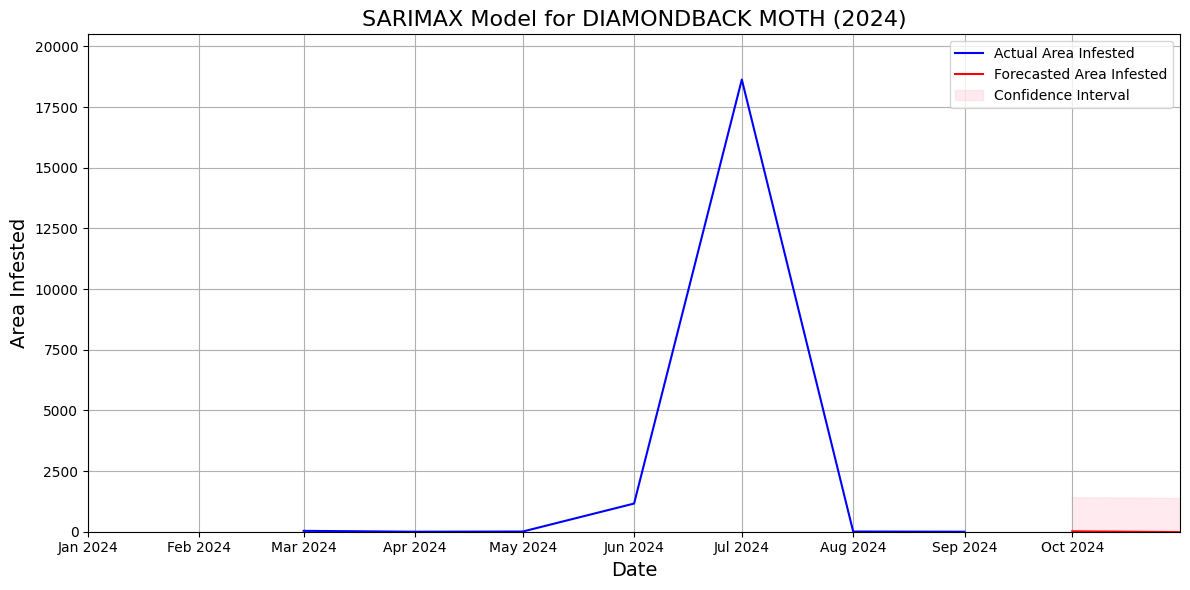


Building SARIMAX model for pest: DODDER


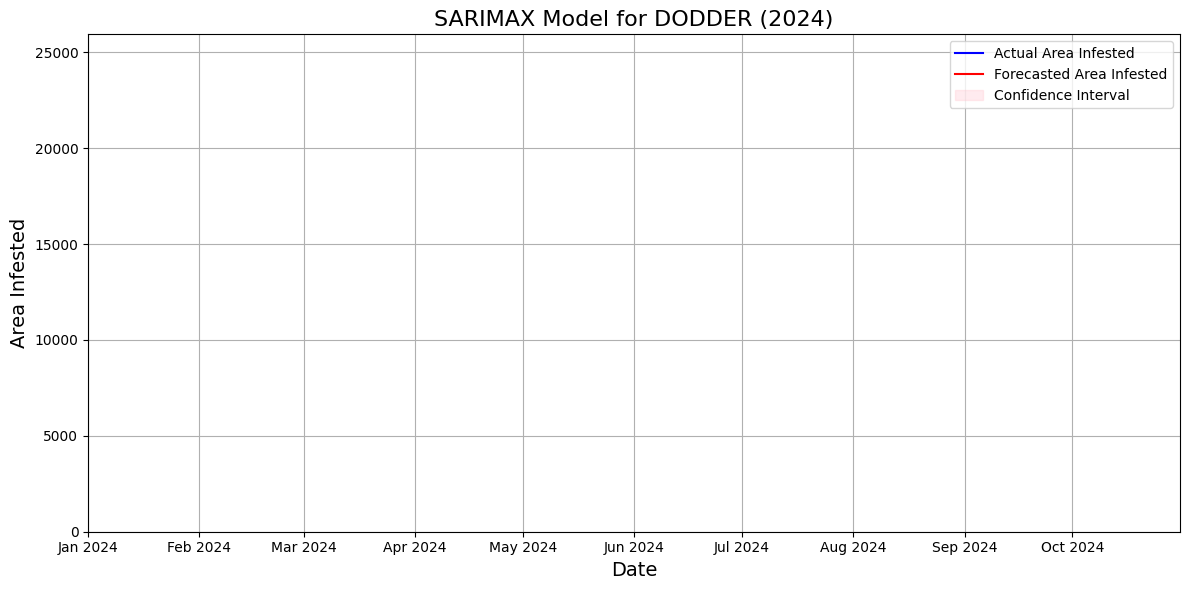


Building SARIMAX model for pest: DOWNY MILDEW


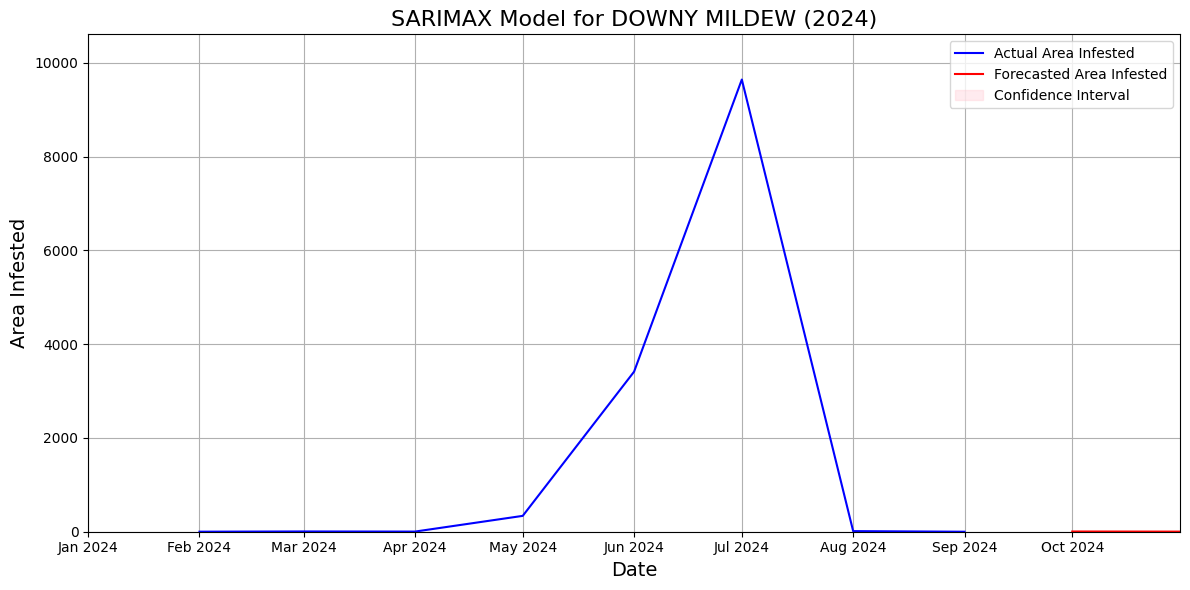


Building SARIMAX model for pest: EPILACHNA BEETLES


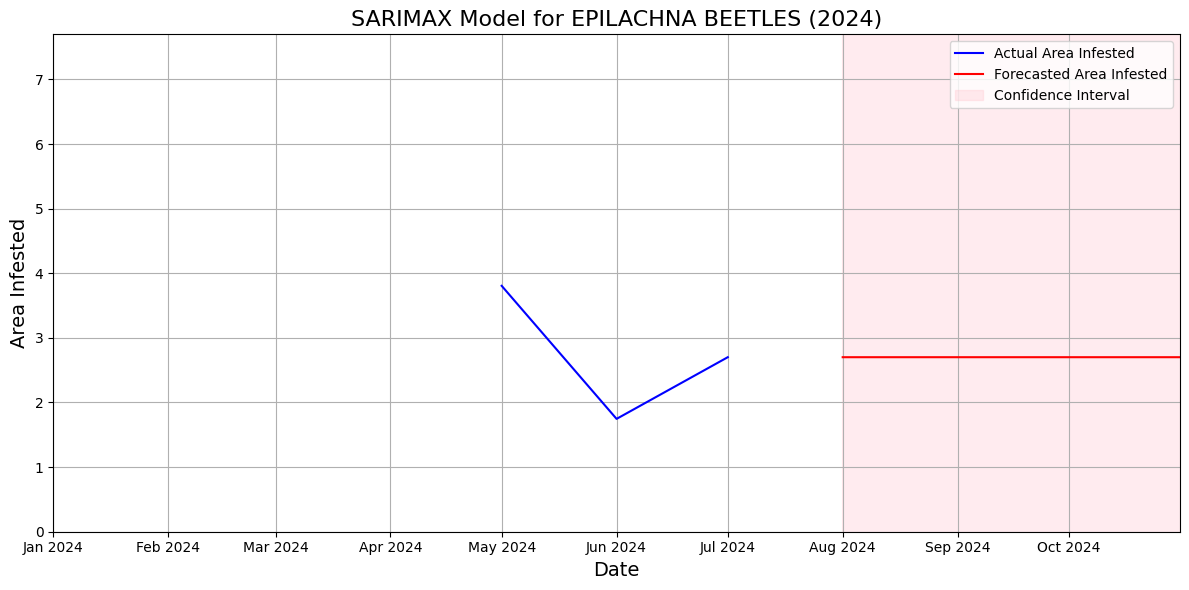


Building SARIMAX model for pest: ERECT PRICKLY PEAR


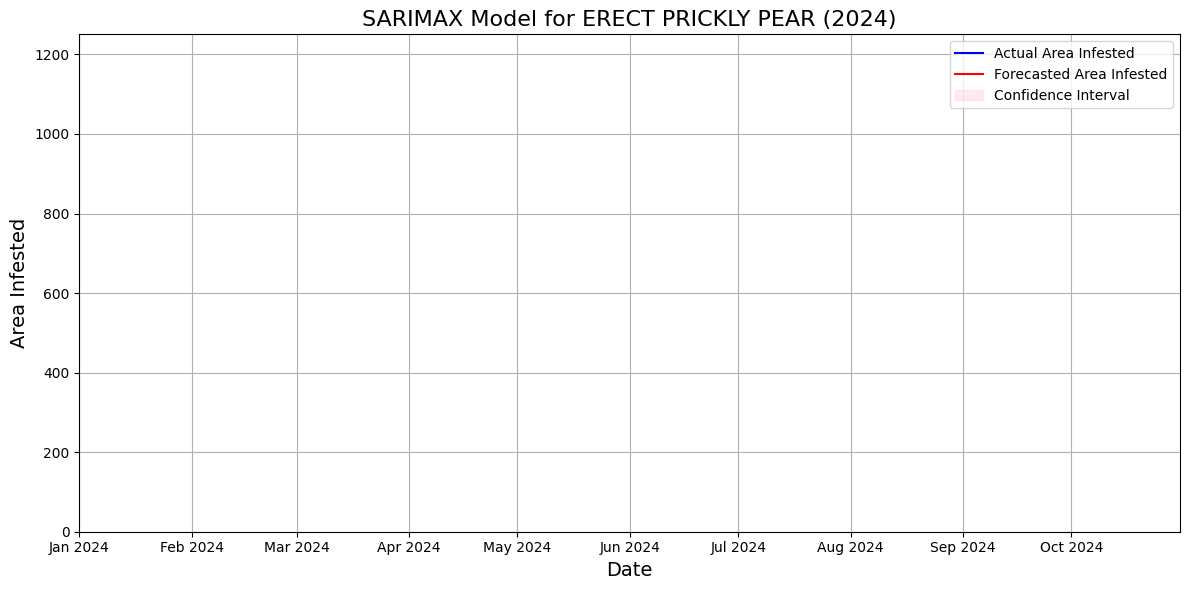


Building SARIMAX model for pest: FALL ARMYWORM


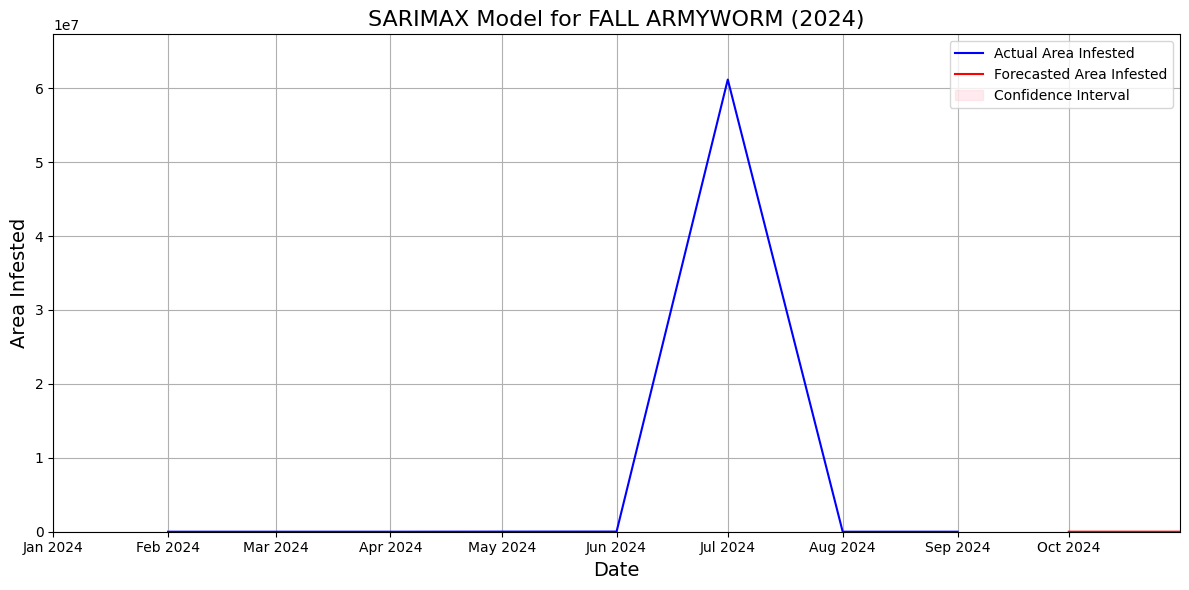


Building SARIMAX model for pest: FALSE CODLING MOTH


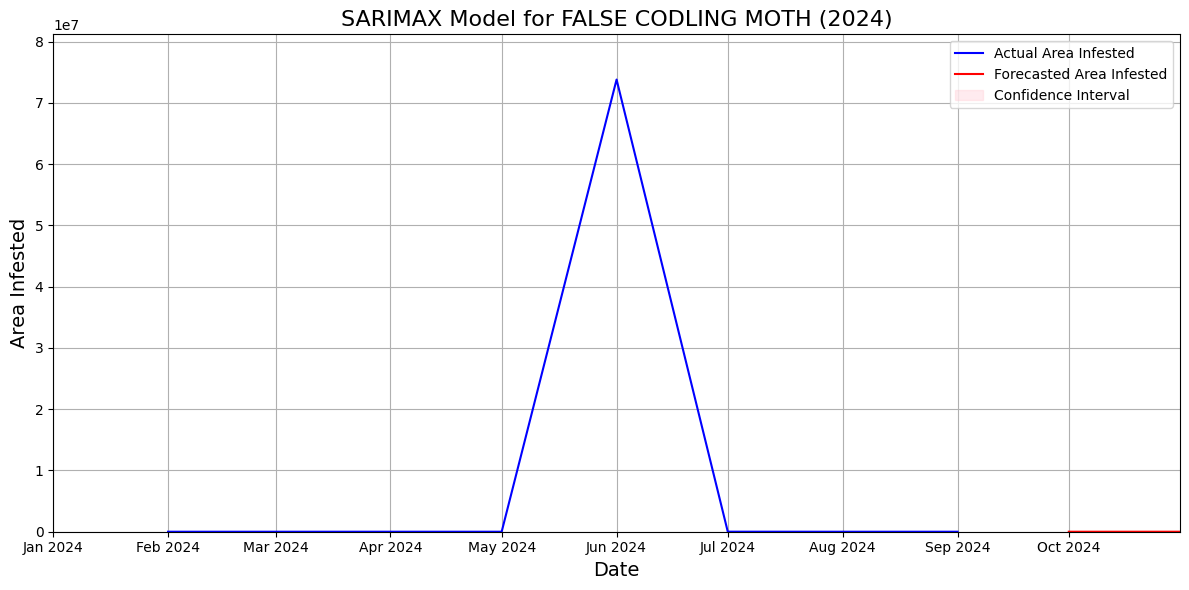


Building SARIMAX model for pest: FLEA BEETLES


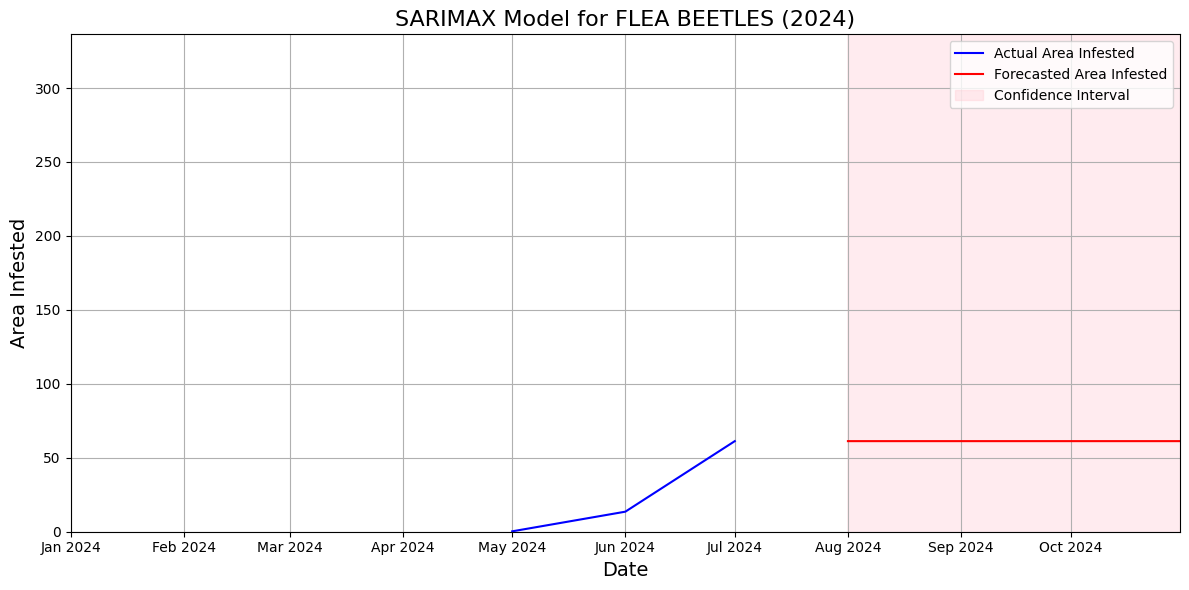


Building SARIMAX model for pest: FRUIT BORERS


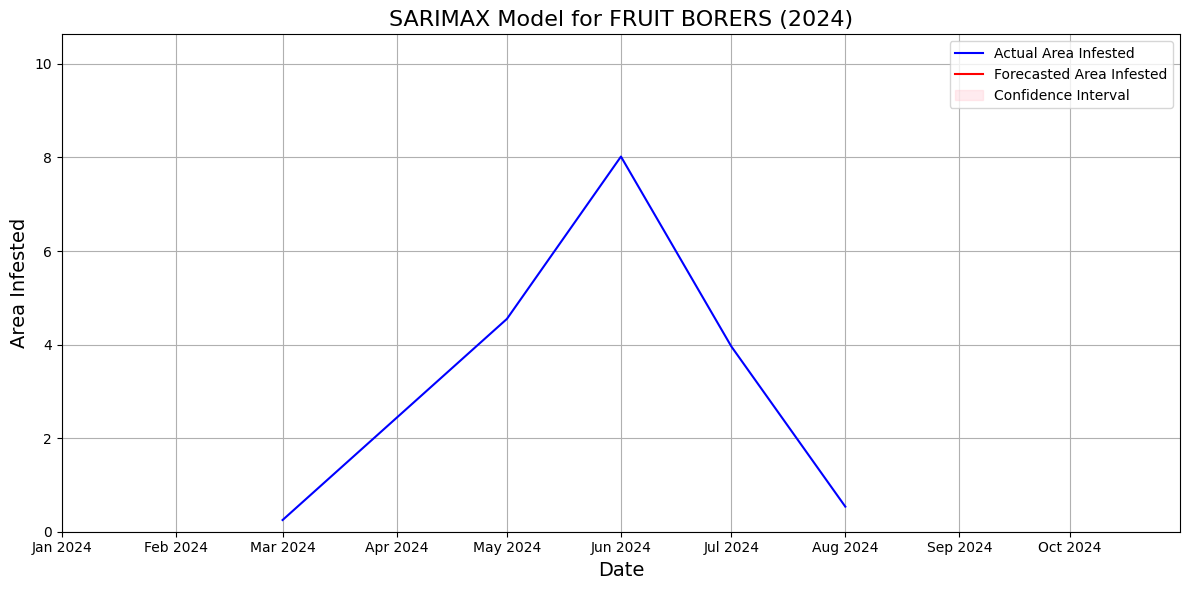


Building SARIMAX model for pest: FRUIT FLIES


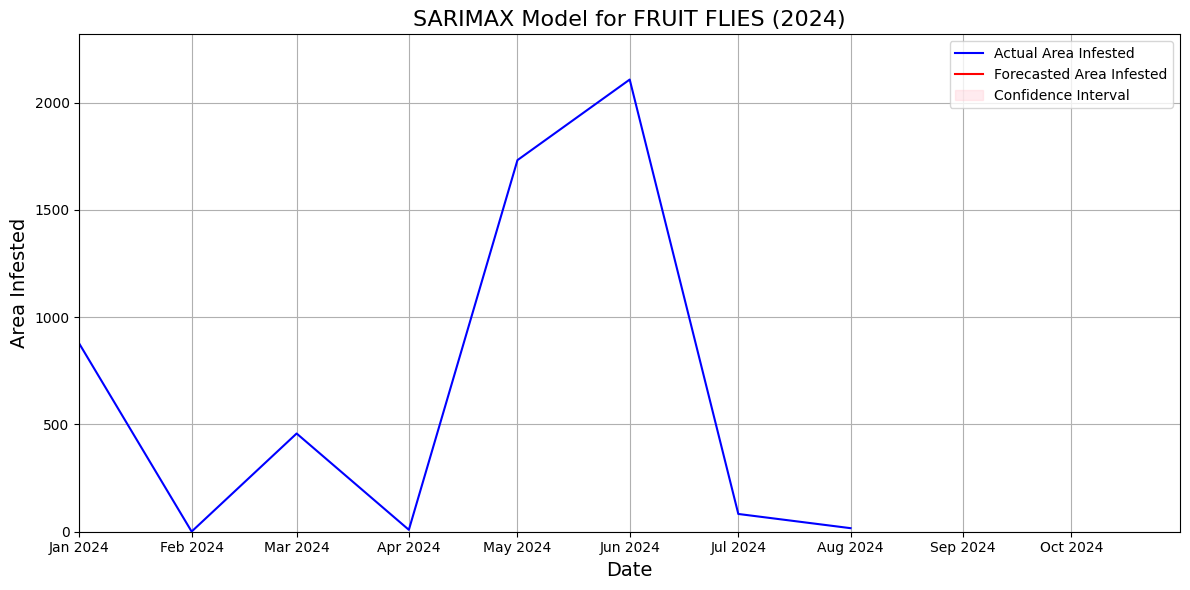


Building SARIMAX model for pest: FRUIT ROT


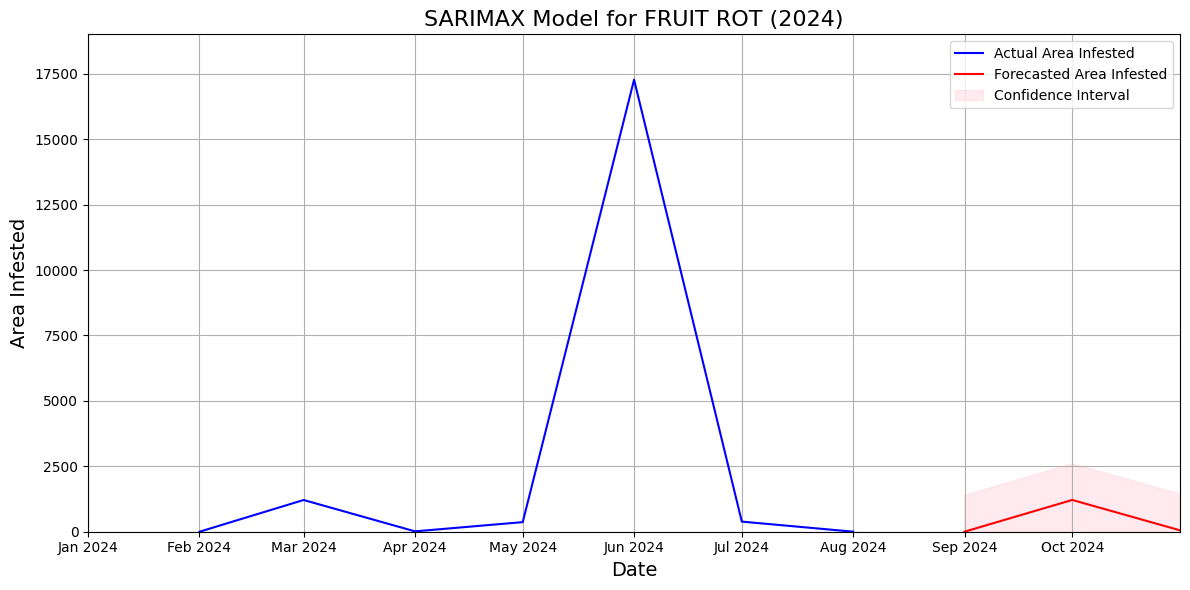


Building SARIMAX model for pest: FUSARIUM BASAL ROT


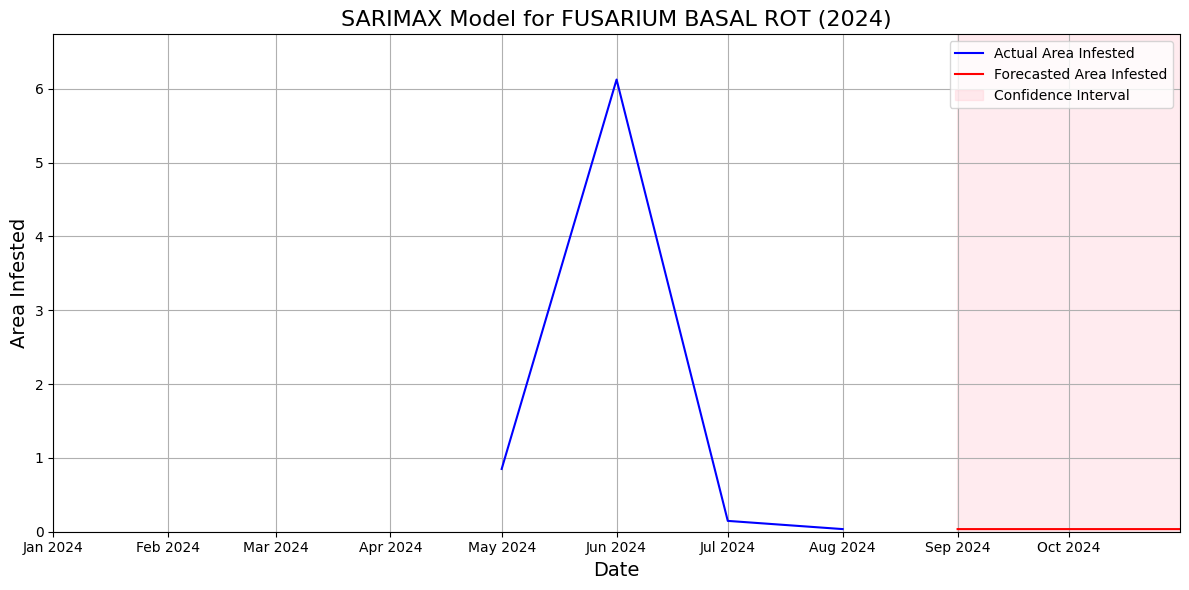


Building SARIMAX model for pest: FUSARIUM COB ROT


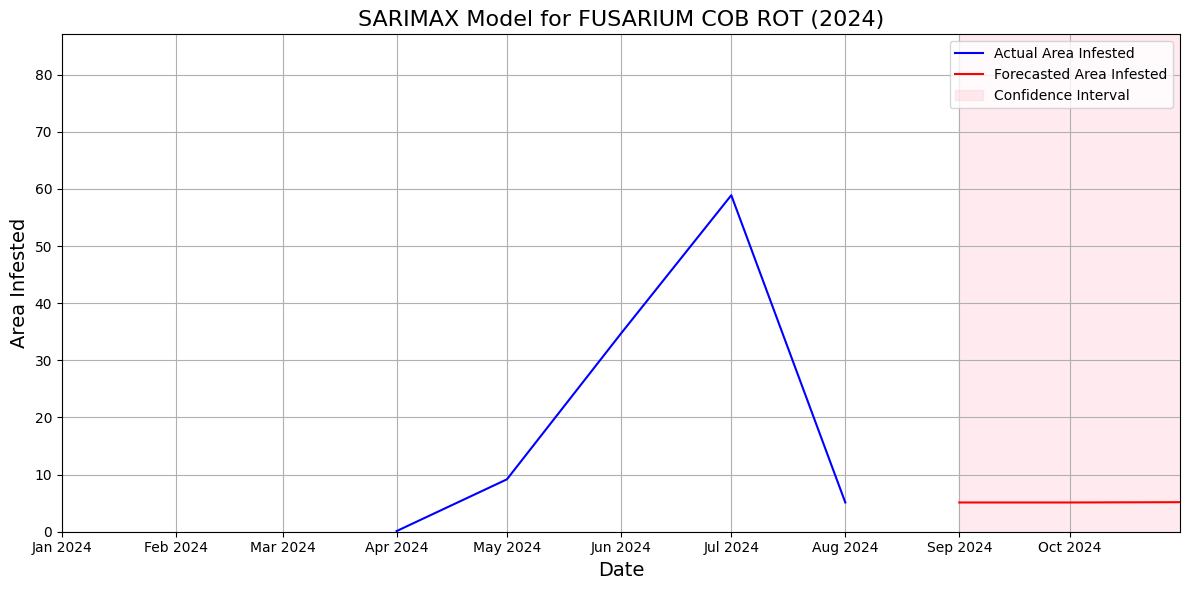


Building SARIMAX model for pest: FUSARIUM ROOT ROT


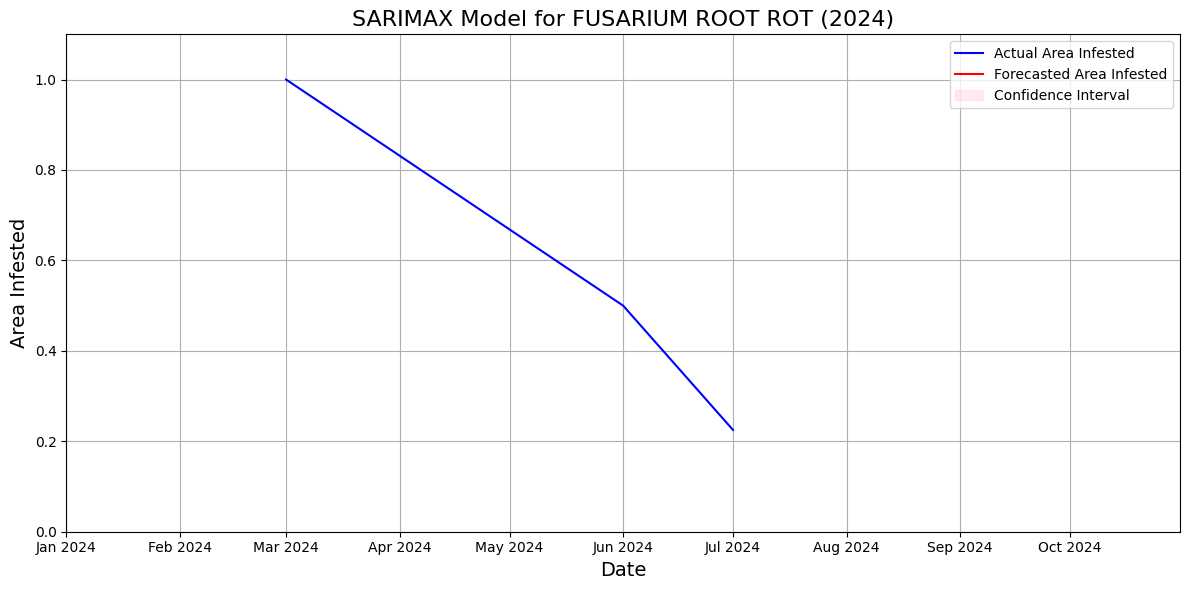


Building SARIMAX model for pest: FUSARIUM WILT


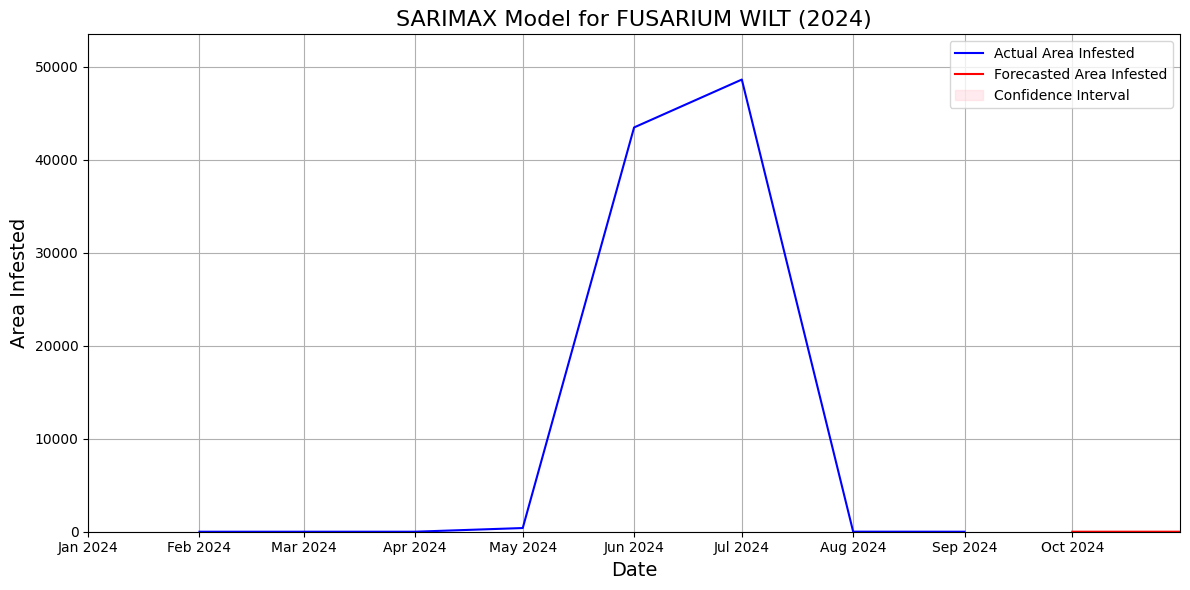


Building SARIMAX model for pest: GALL FLY


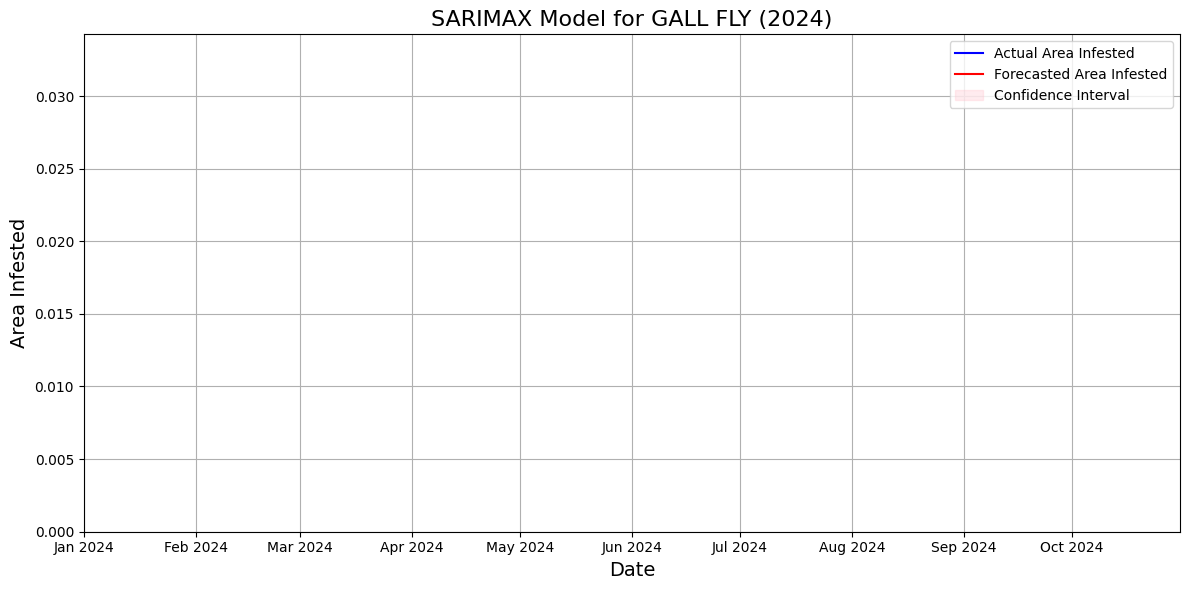


Building SARIMAX model for pest: GALL MIDGES


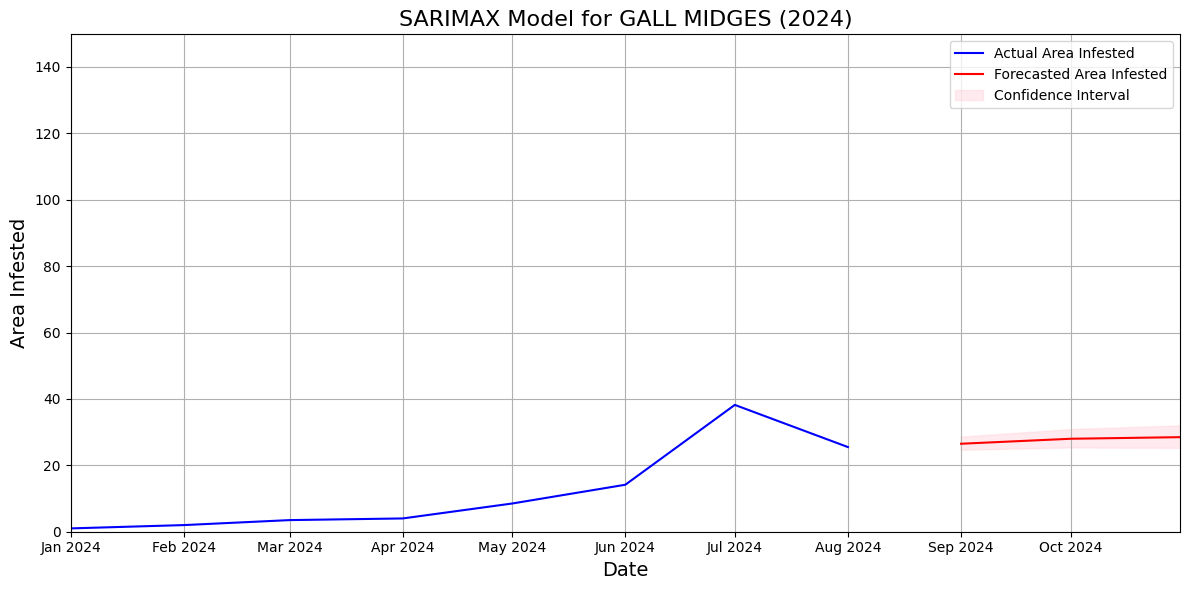


Building SARIMAX model for pest: GIANT SALVINIA


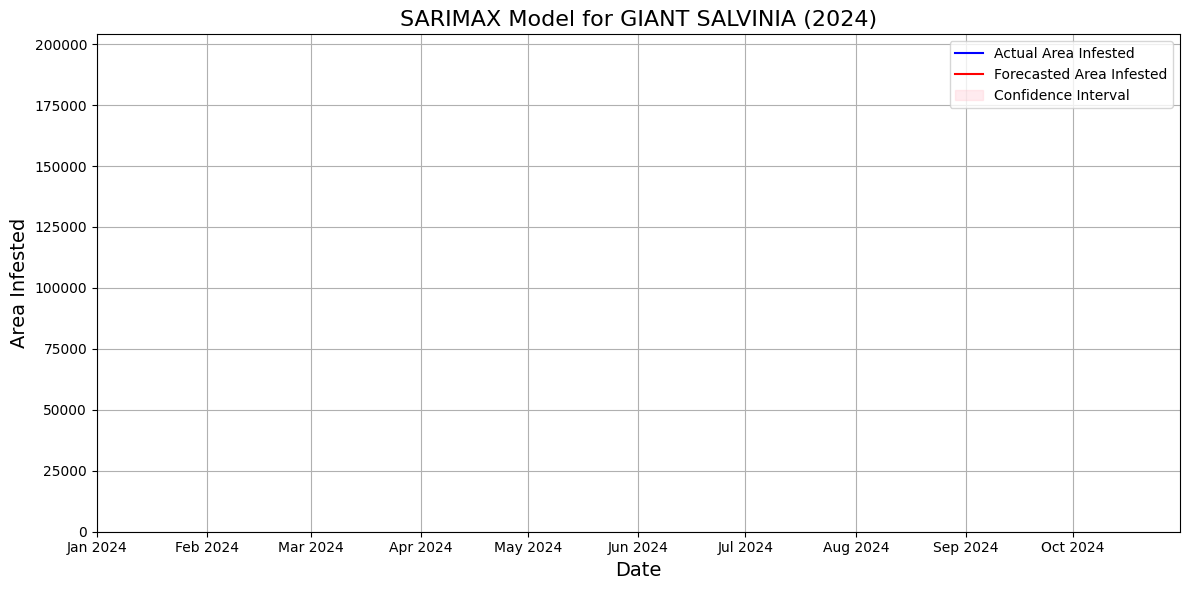


Building SARIMAX model for pest: GOLDEN APPLE SNAIL


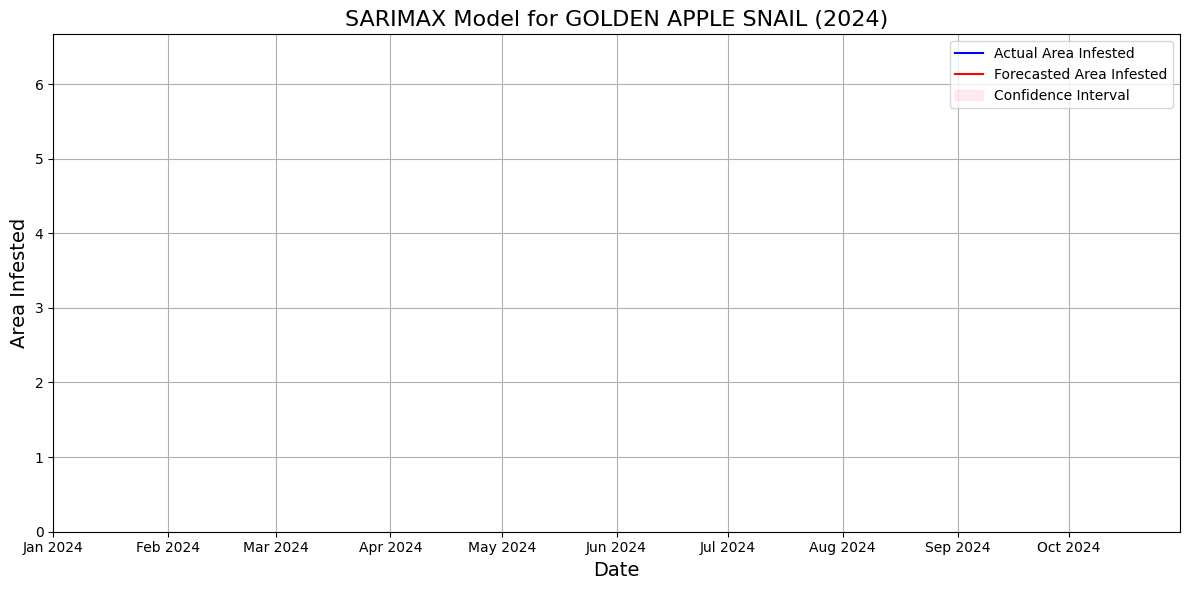


Building SARIMAX model for pest: HEADWORMS


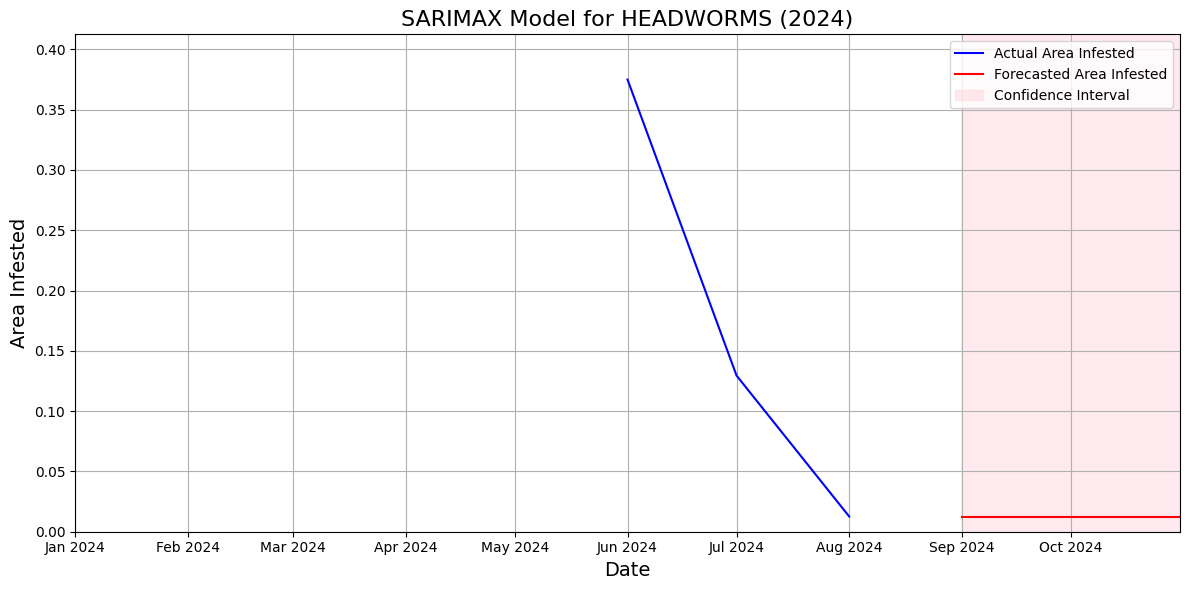


Building SARIMAX model for pest: LEAF BLIGHT


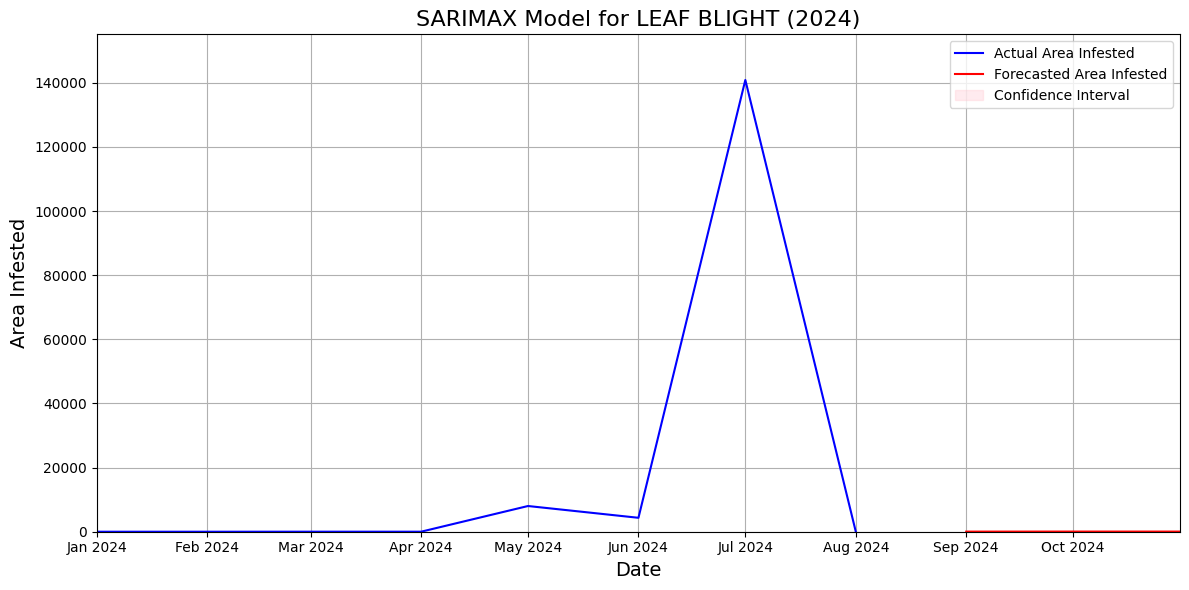


Building SARIMAX model for pest: LEAF MINER


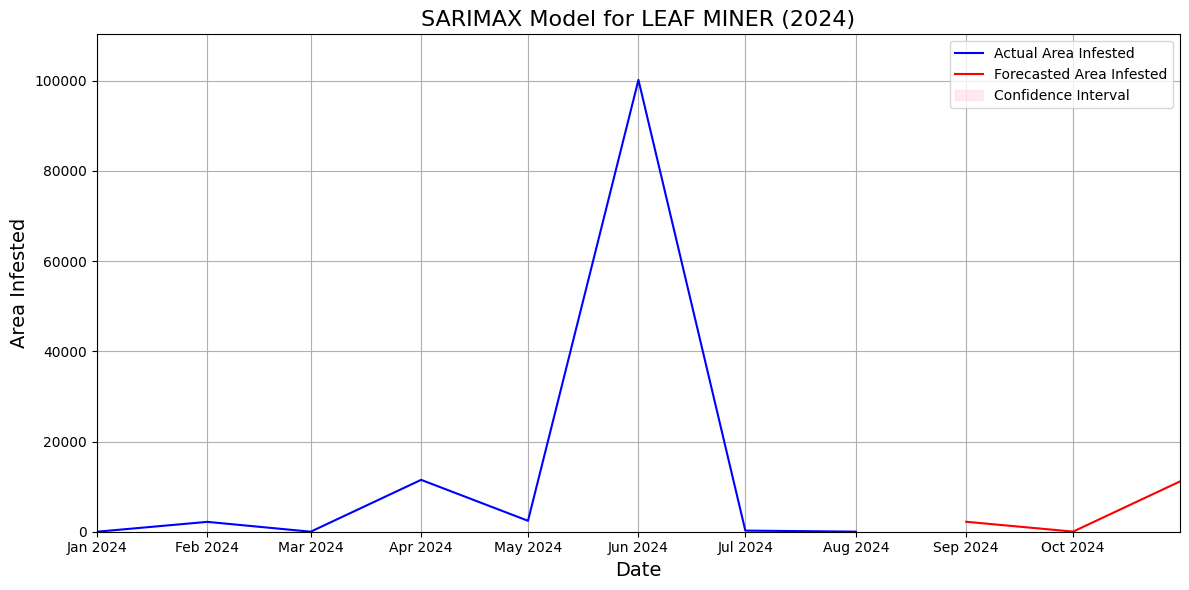


Building SARIMAX model for pest: LEAF MINER (LIRIOMYZA SP)


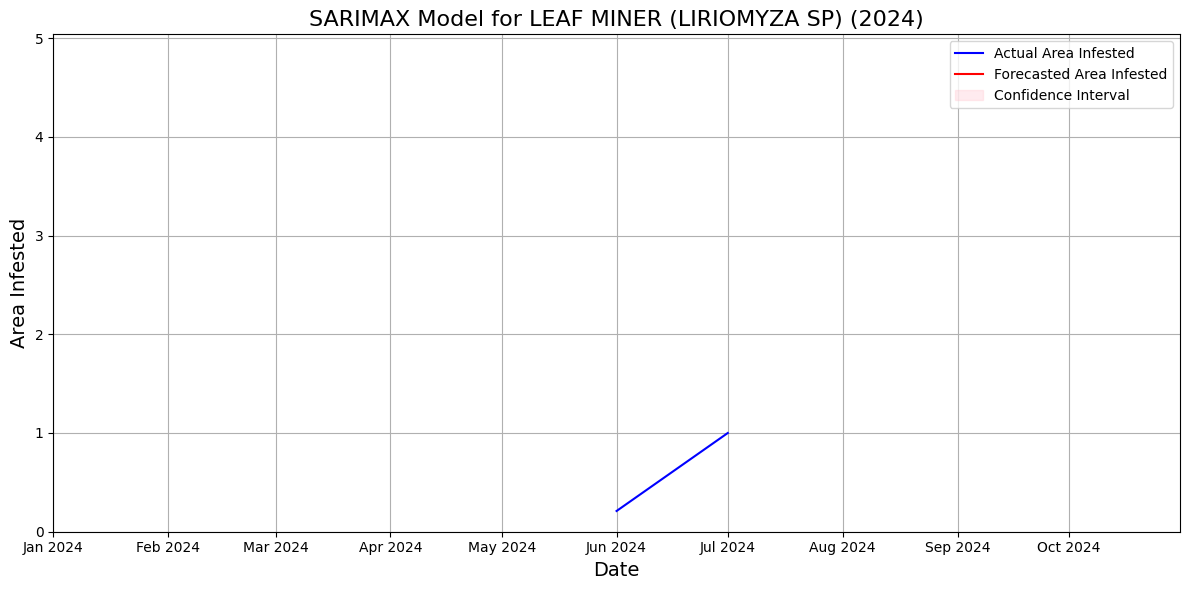


Building SARIMAX model for pest: LEAF MINER (TUTA ABSOLUTA)


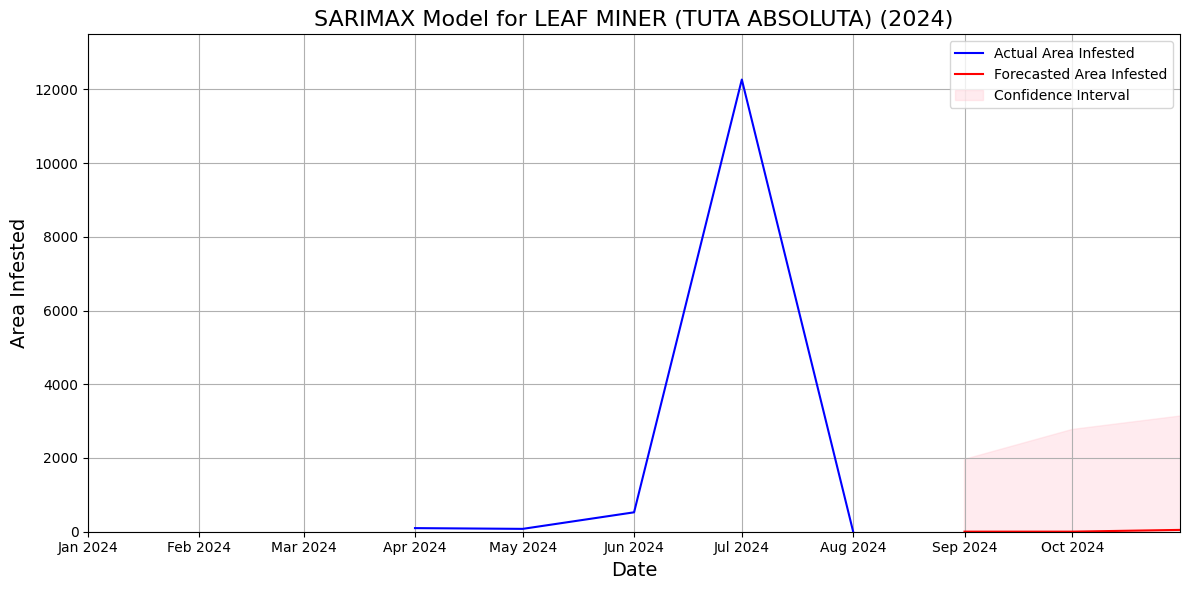


Building SARIMAX model for pest: LEAF SPOT


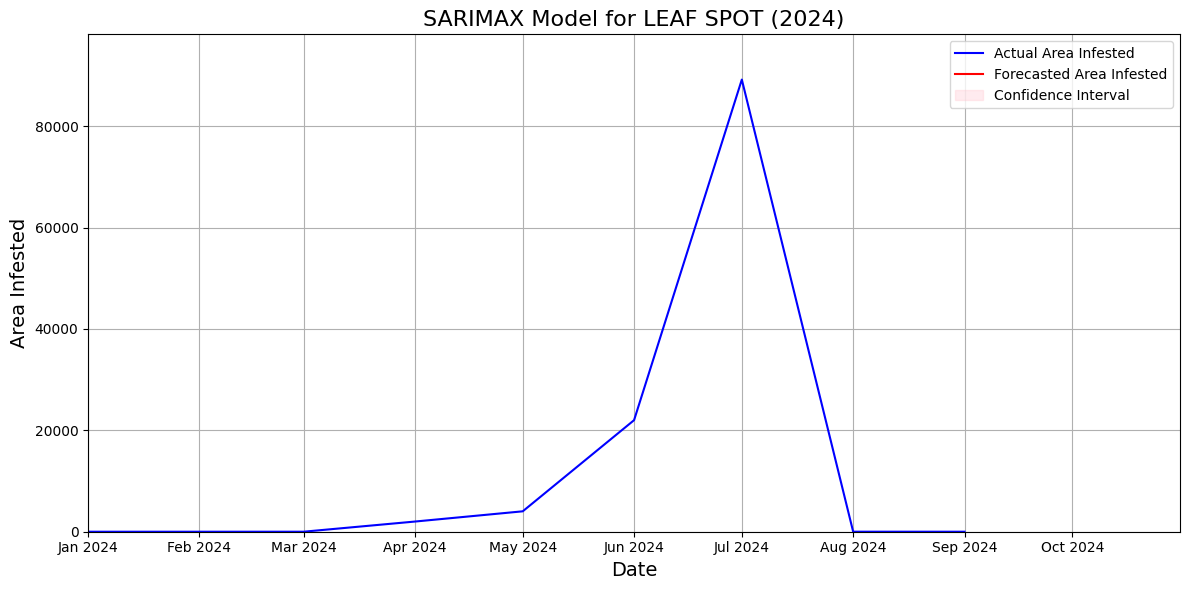


Building SARIMAX model for pest: LEAFHOPPERS


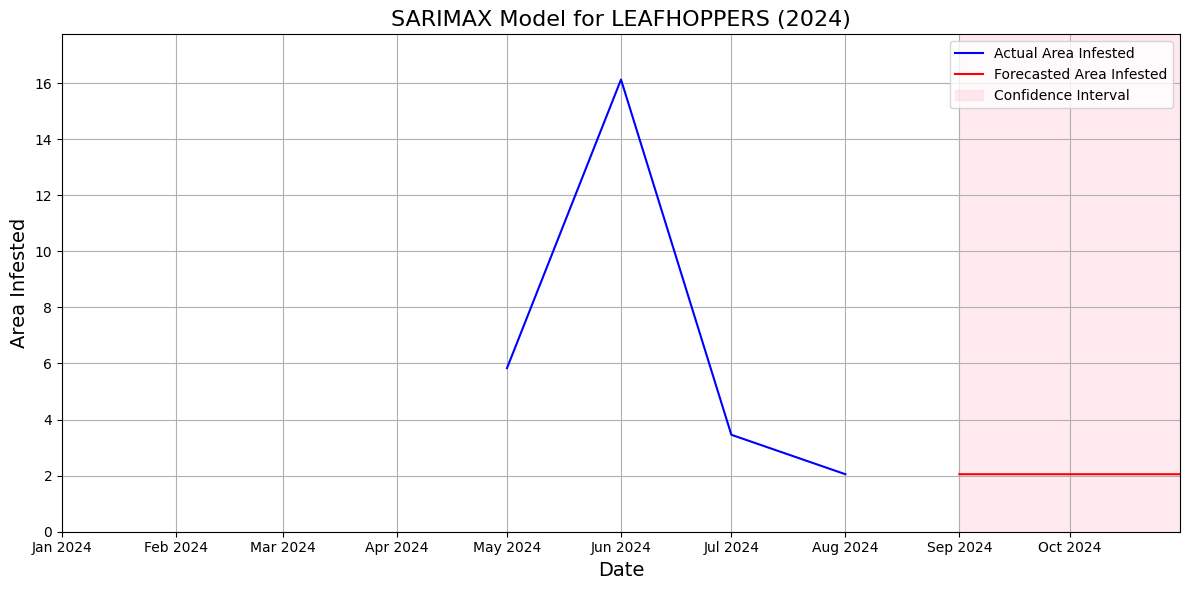


Building SARIMAX model for pest: LOOSE SMUT


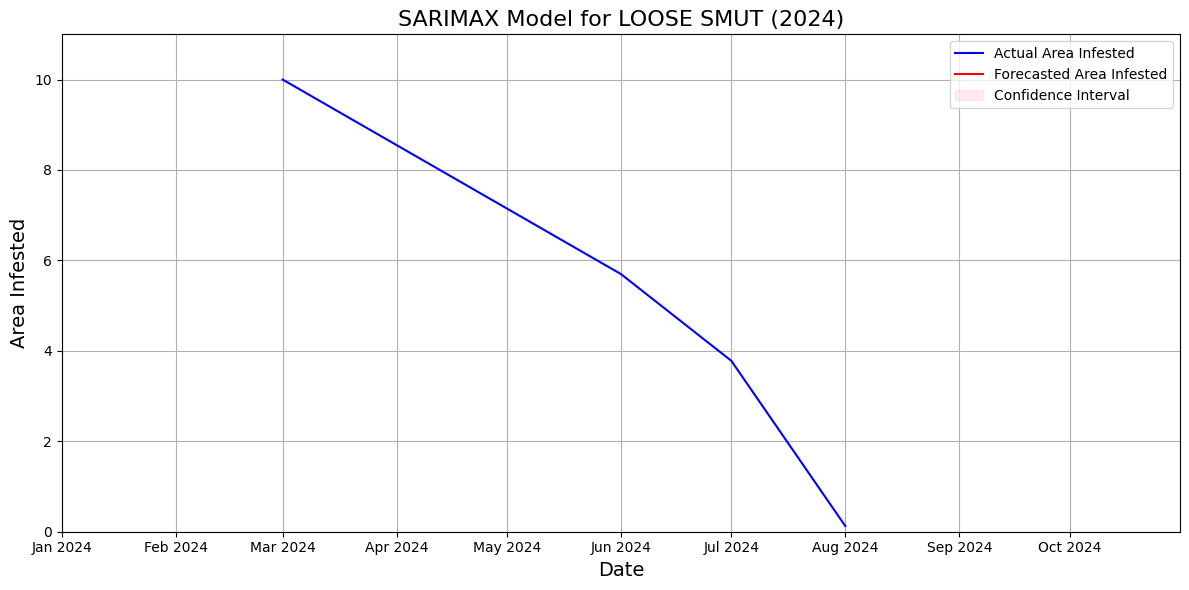


Building SARIMAX model for pest: MAIZE LETHAL NECROSIS DISEASE


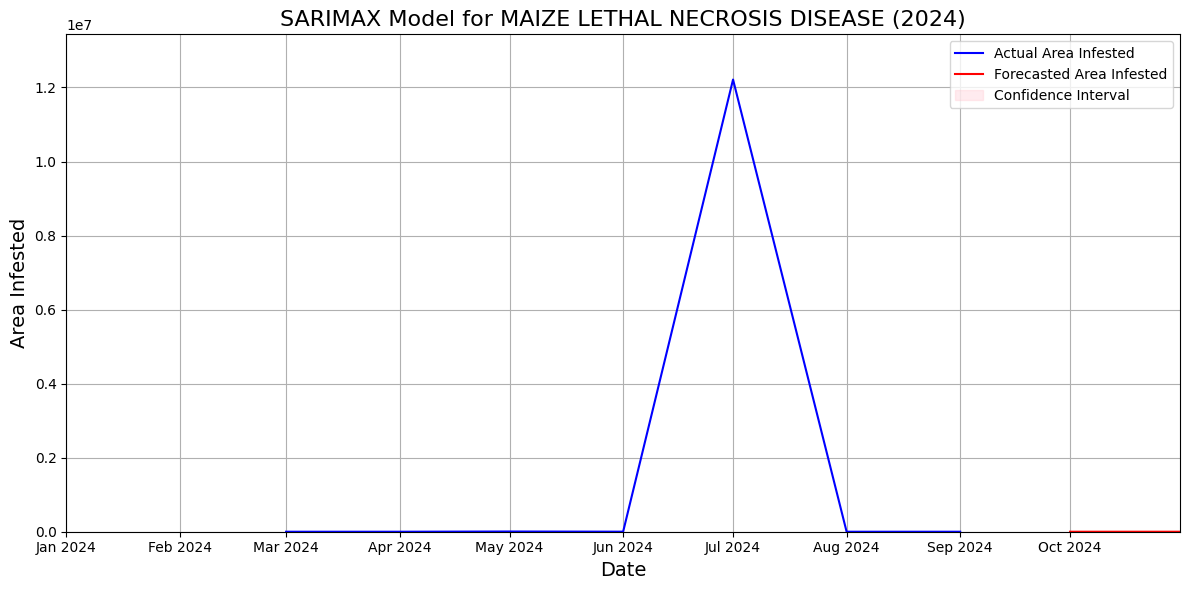


Building SARIMAX model for pest: MANGO SEED WEEVIL


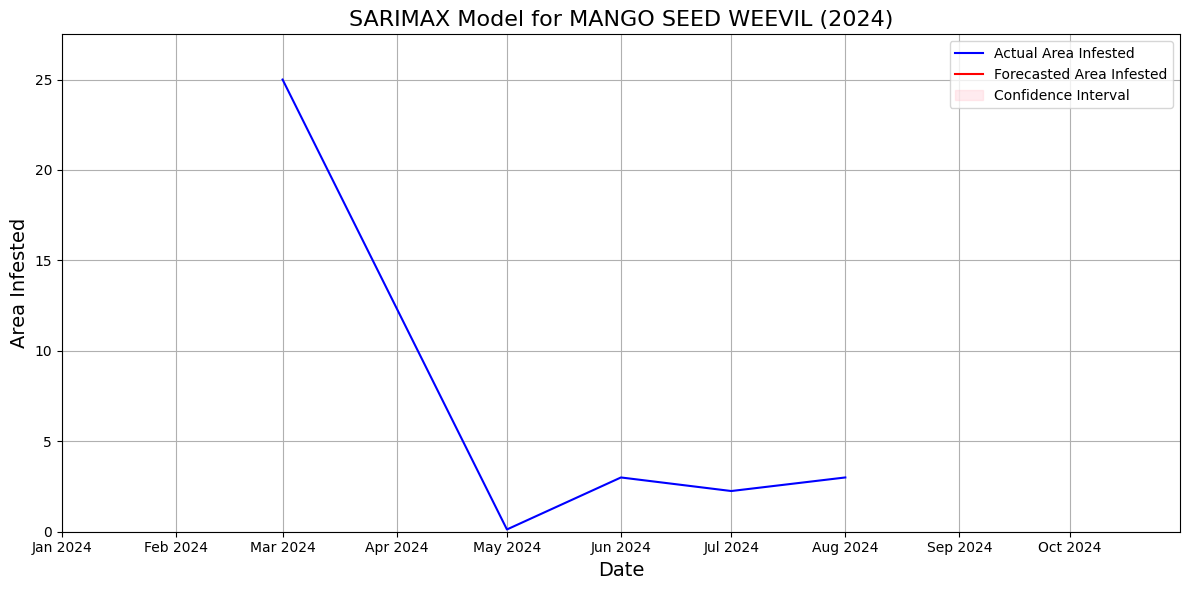


Building SARIMAX model for pest: MATHENGE (PROSOPIS)


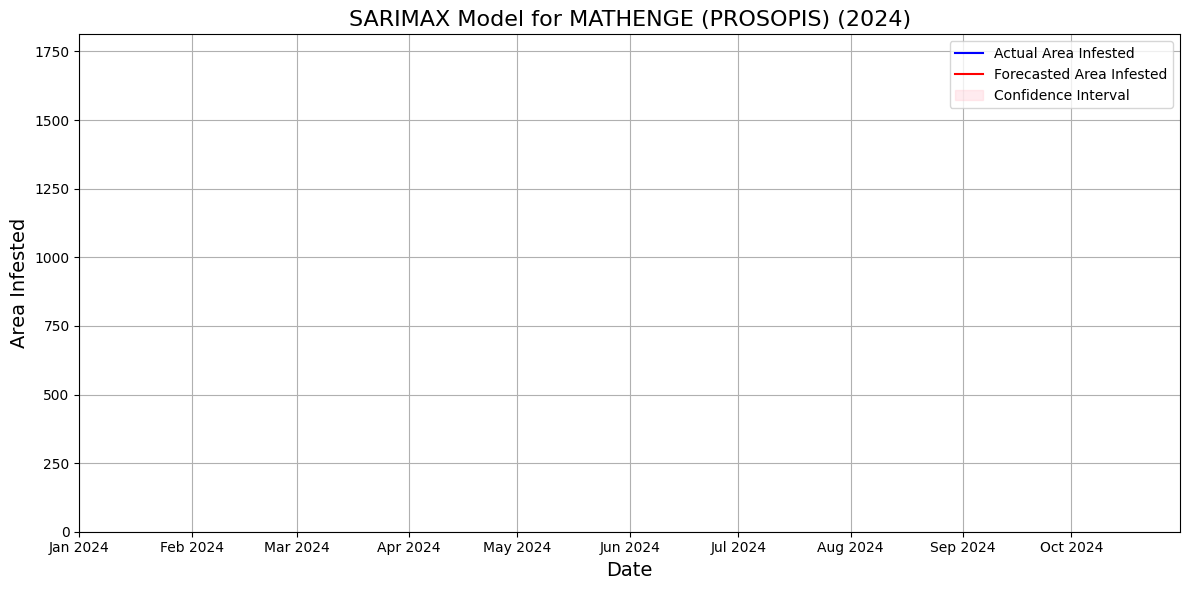


Building SARIMAX model for pest: MEALYBUGS


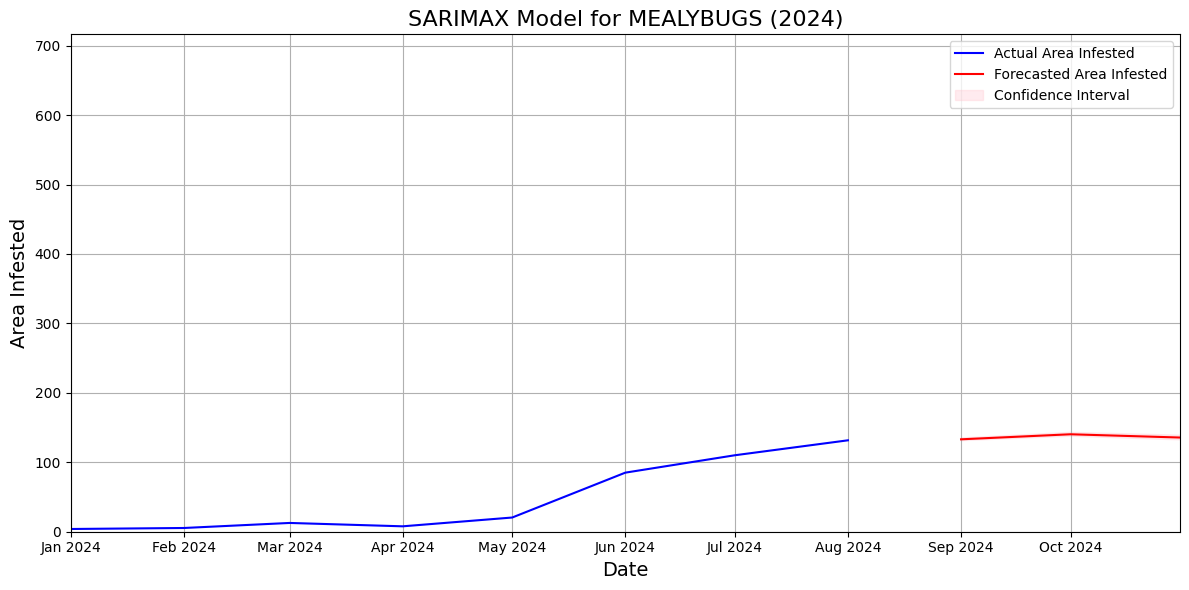


Building SARIMAX model for pest: MOSAIC POTYVIRUS


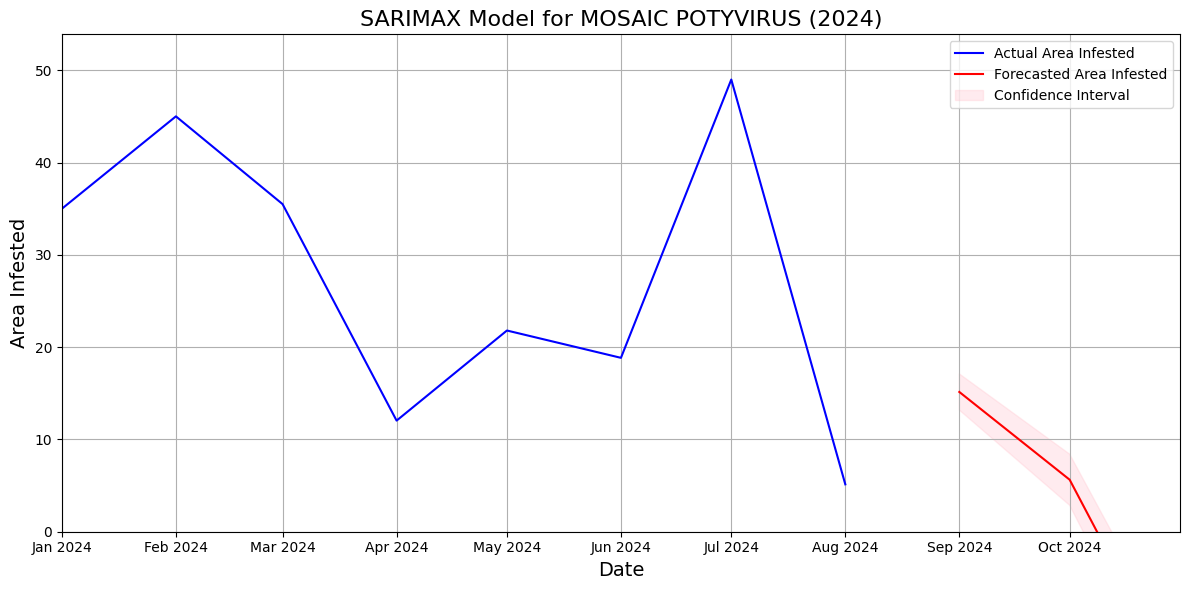


Building SARIMAX model for pest: MOSAIC VIRUS


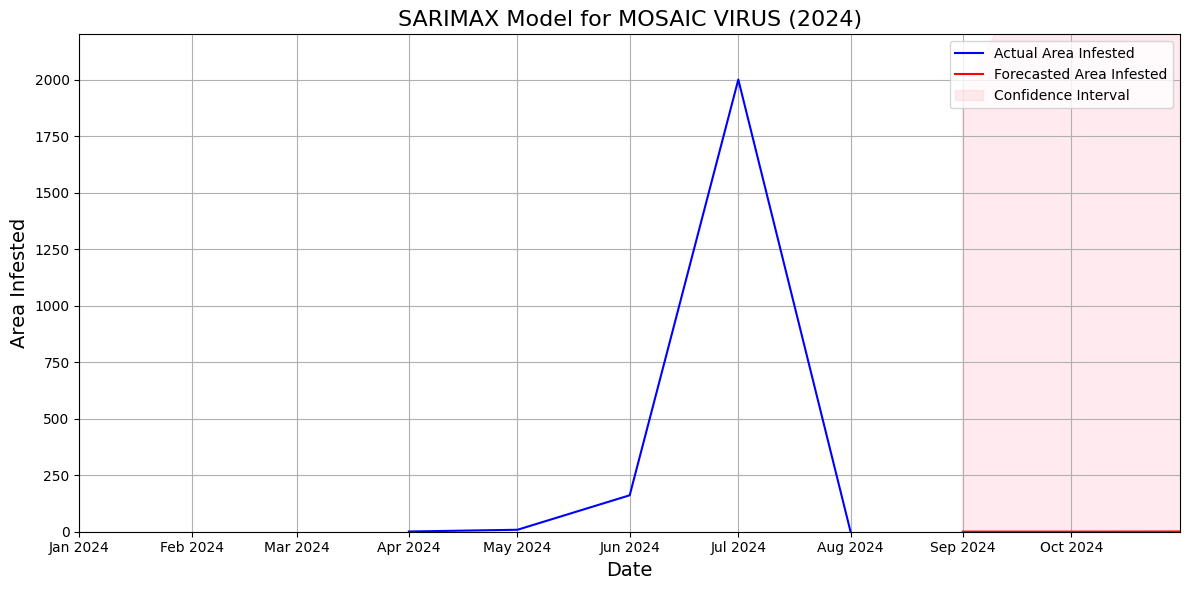


Building SARIMAX model for pest: MUSTARD APHIDS


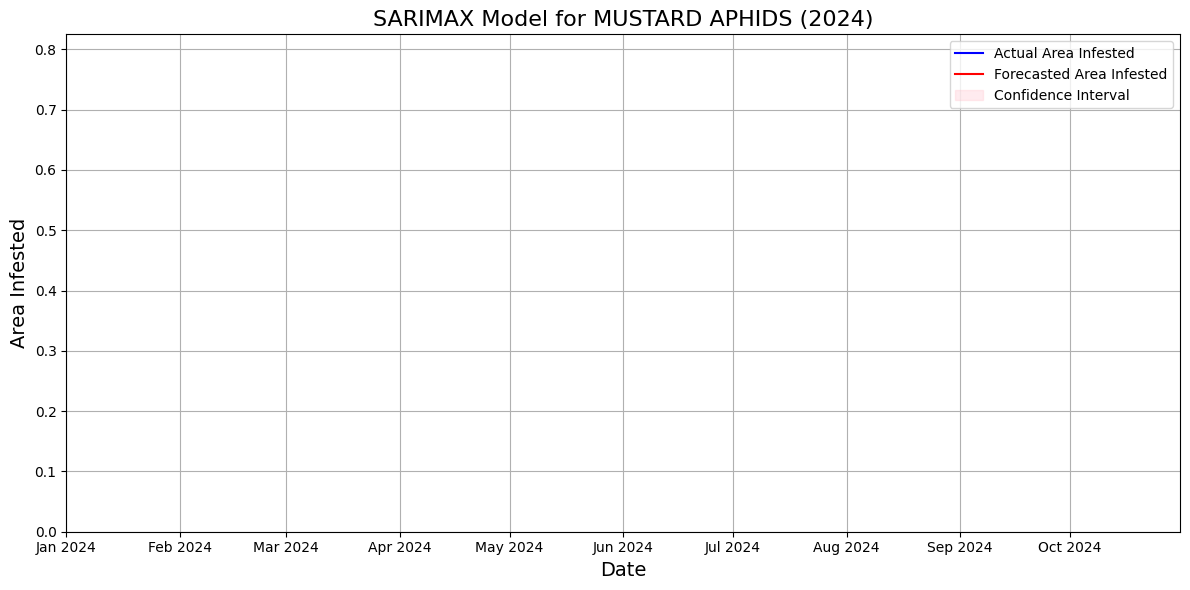


Building SARIMAX model for pest: NEMATODES


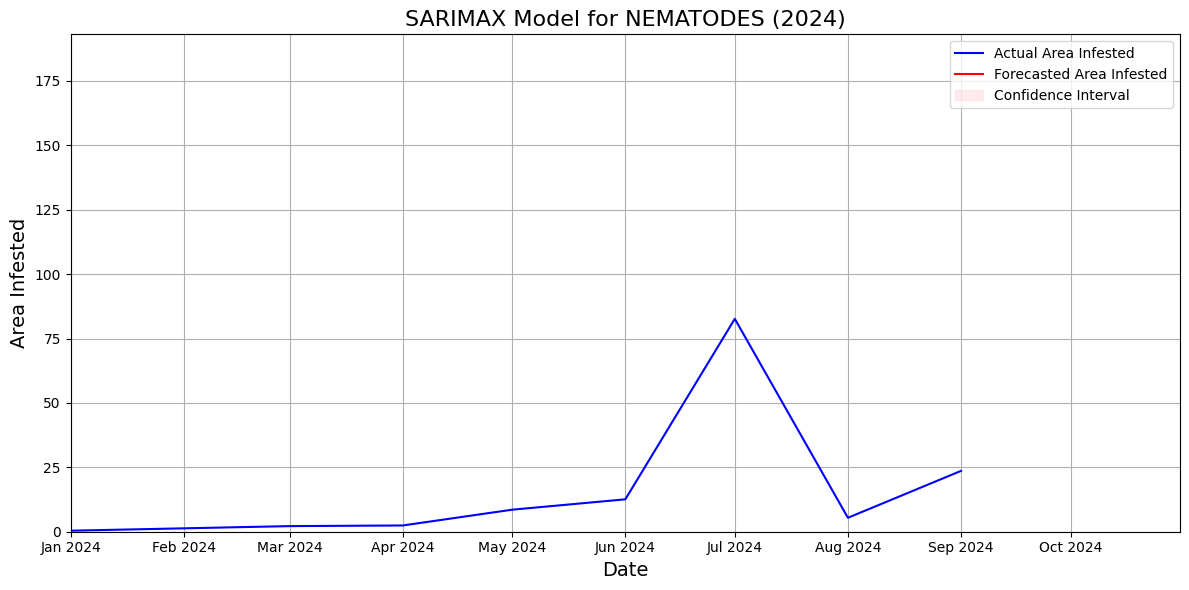


Building SARIMAX model for pest: ONION FLY


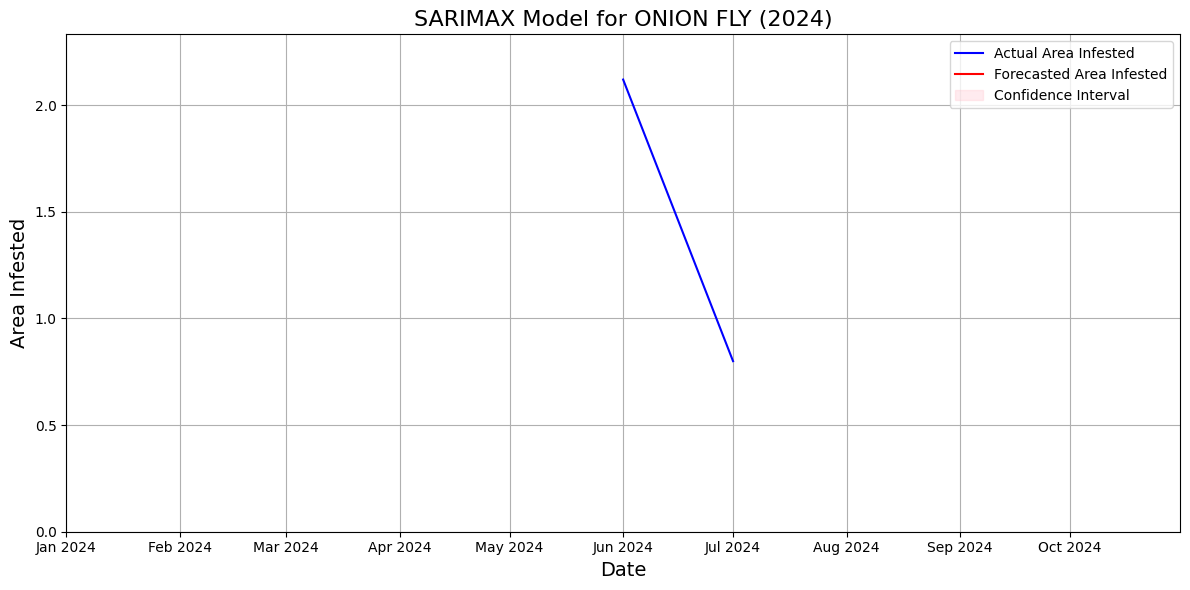


Building SARIMAX model for pest: PAPAYA MEALYBUG


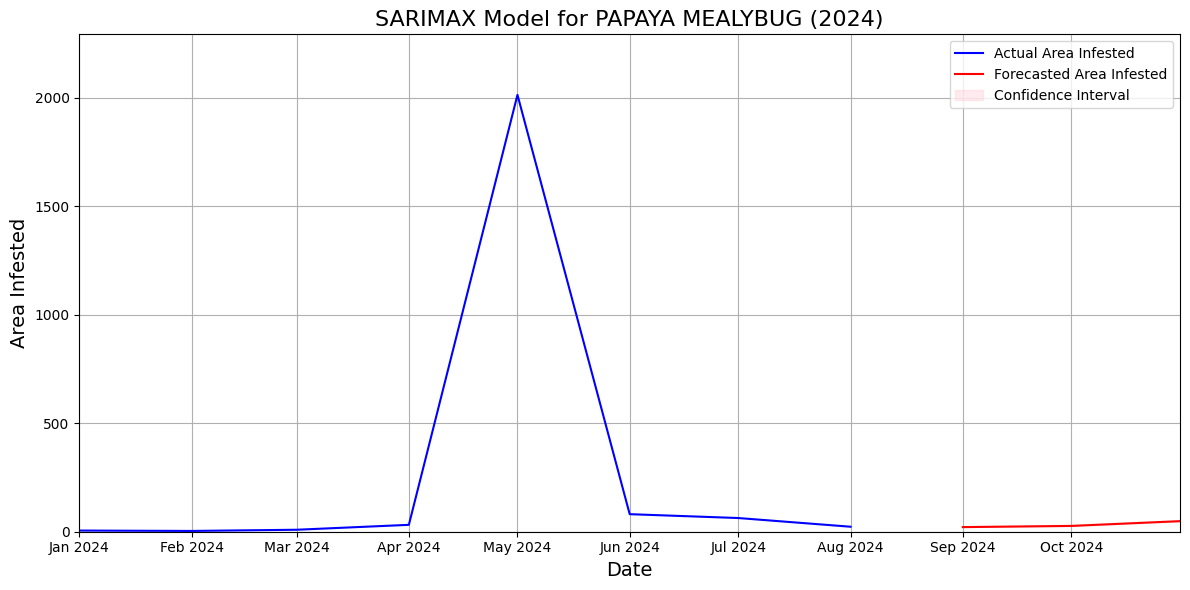


Building SARIMAX model for pest: PARTHENIUM WEED


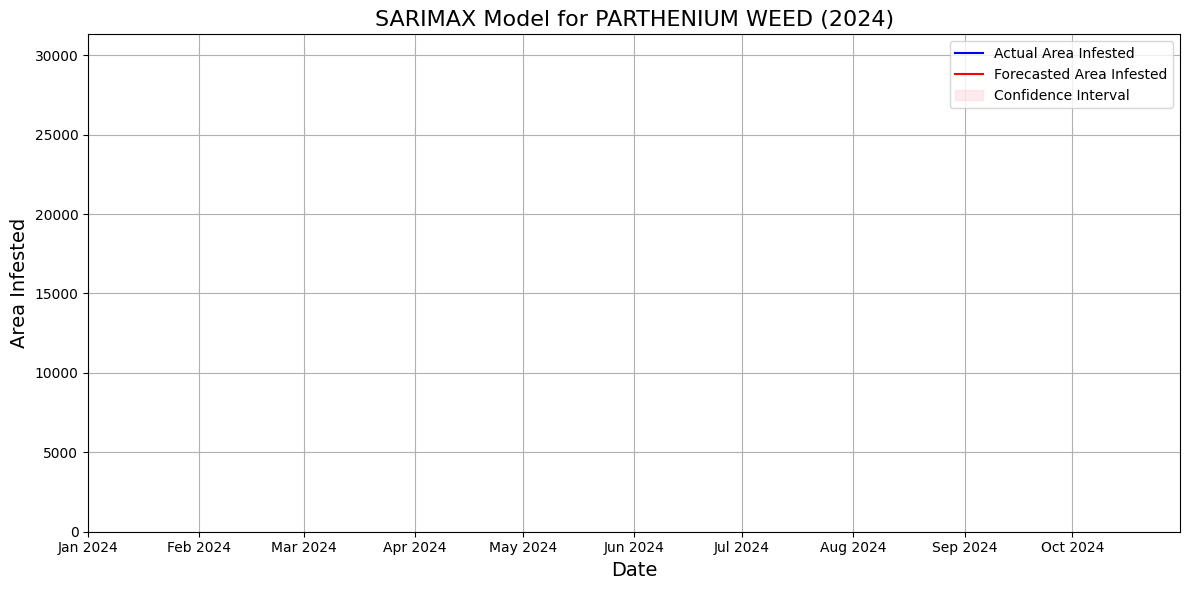


Building SARIMAX model for pest: PASSION FRUIT WOODINESS VIRUS


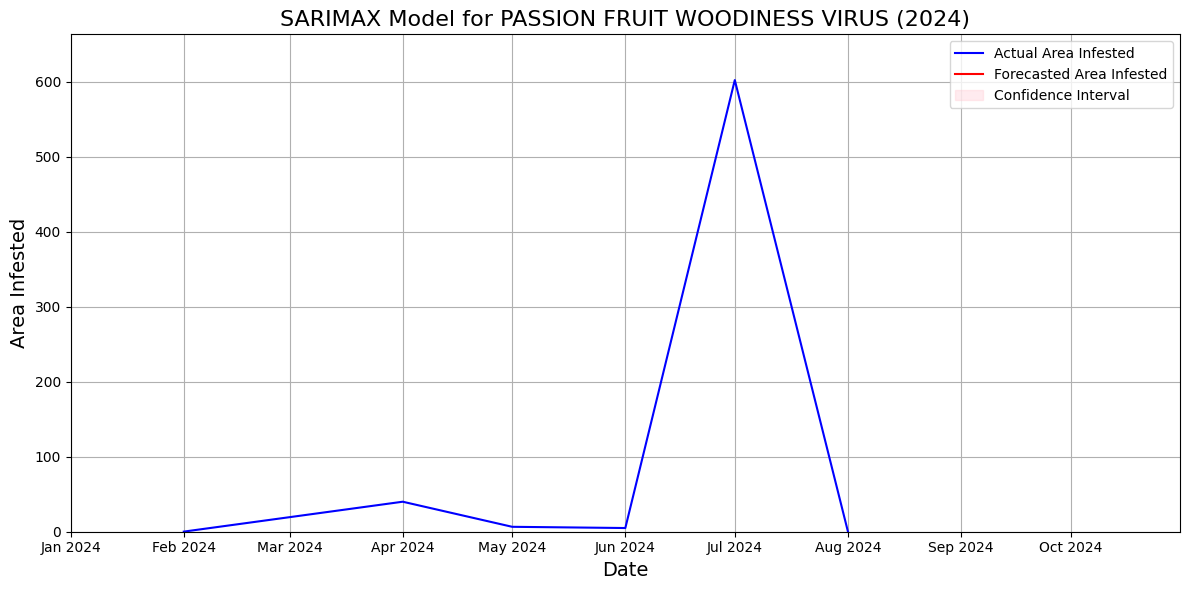


Building SARIMAX model for pest: PHYTOPTHORA BLIGHT


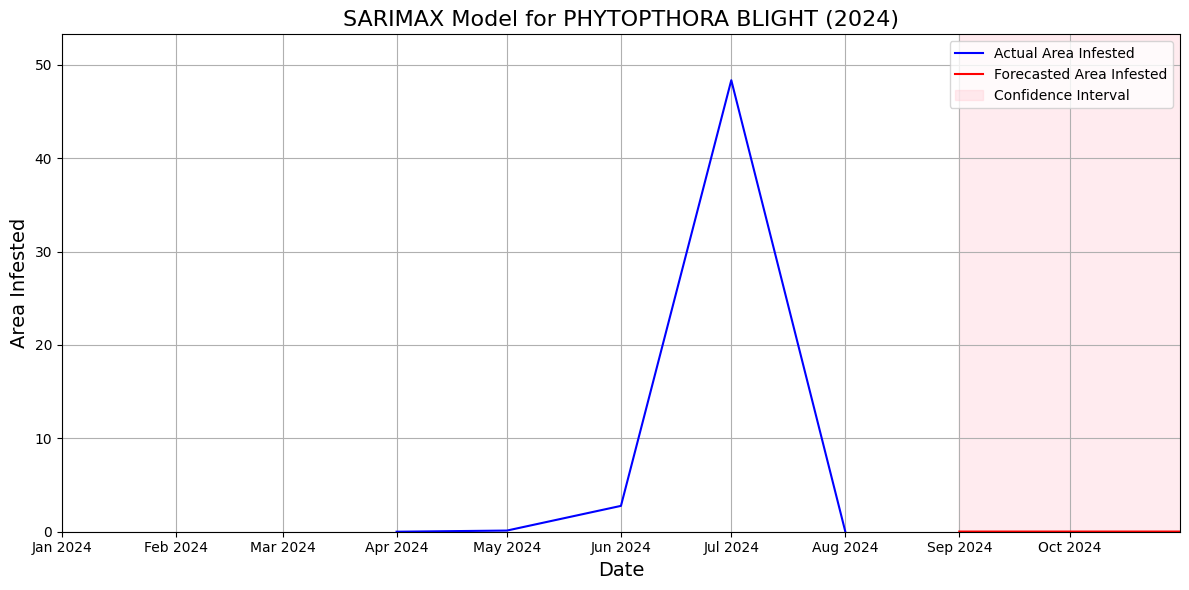


Building SARIMAX model for pest: PINEAPPLE ROT


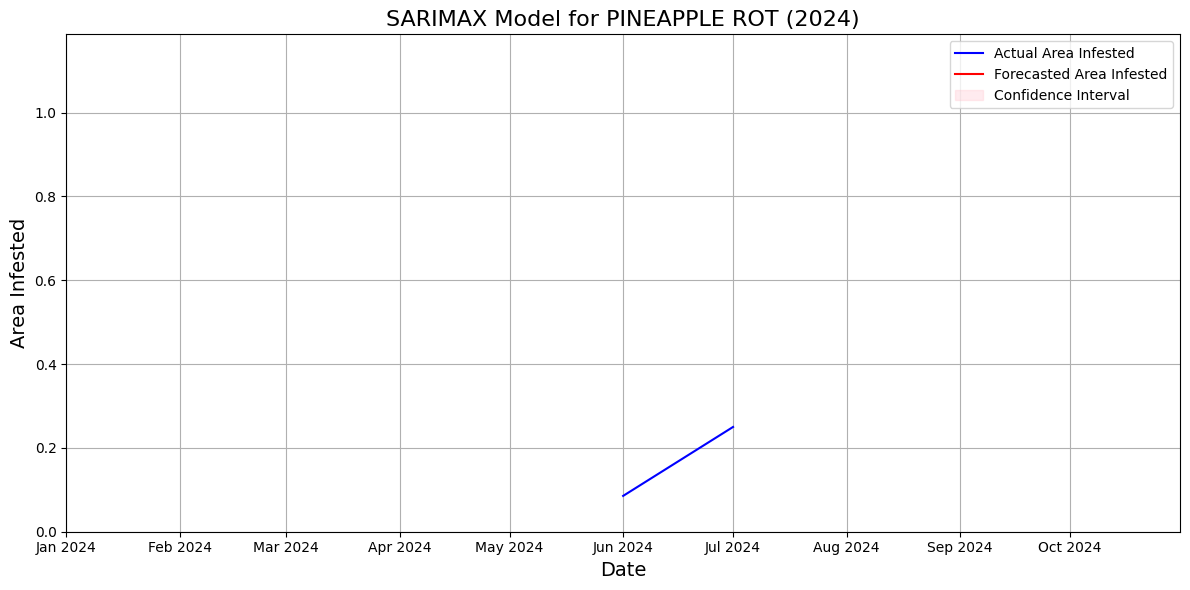


Building SARIMAX model for pest: PINEAPPLE WILT VIRUS


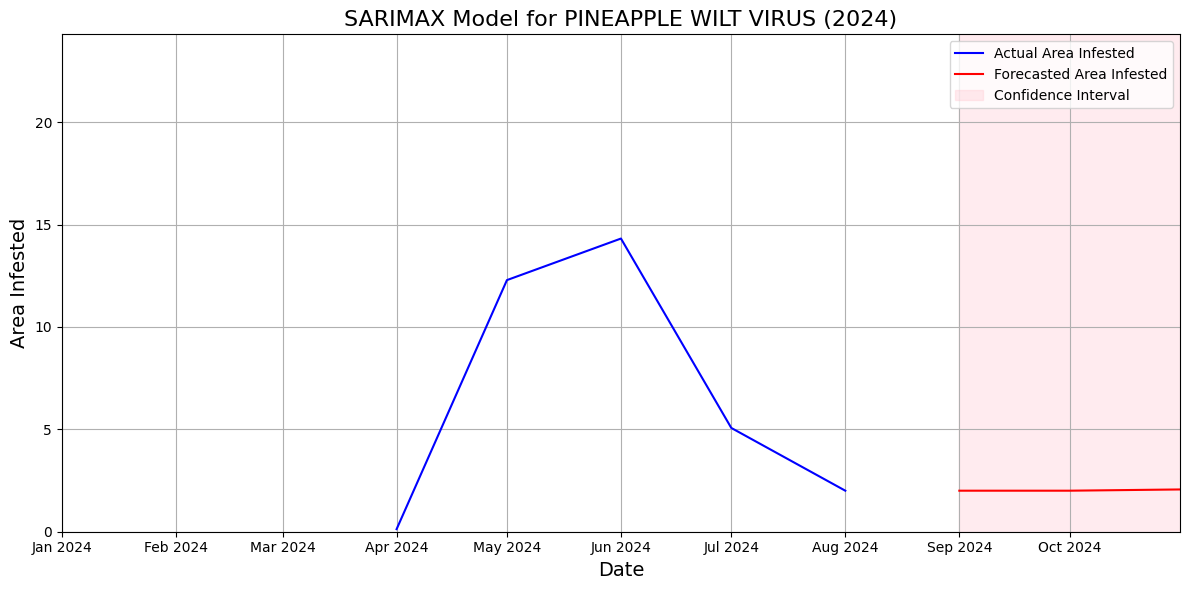


Building SARIMAX model for pest: PLANTHOPPERS


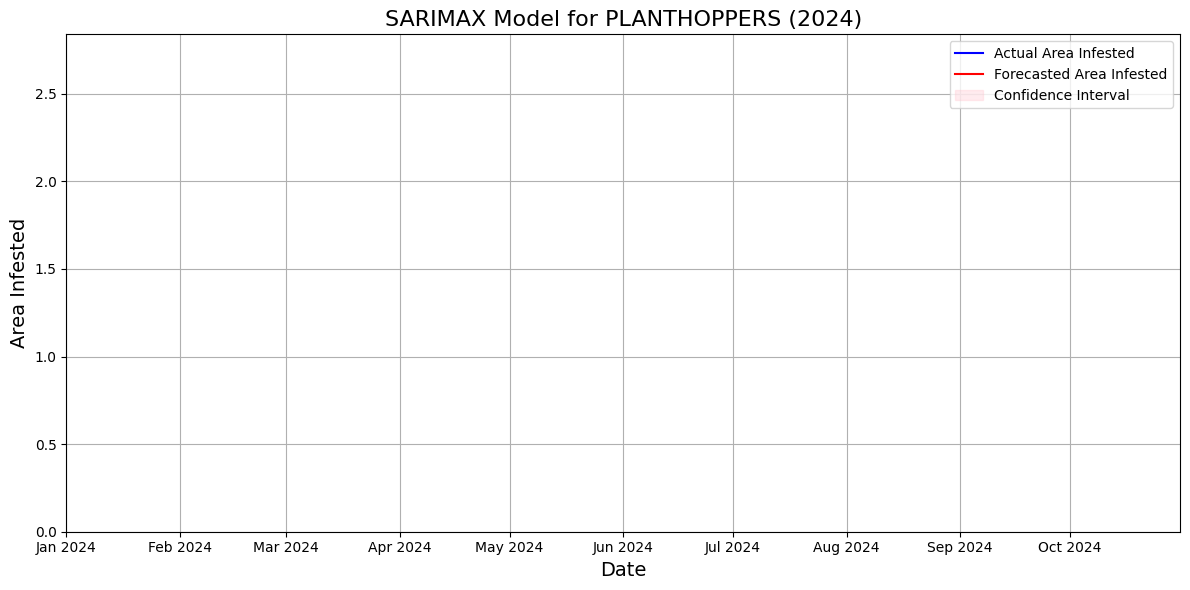


Building SARIMAX model for pest: POTATO BLACK LEG


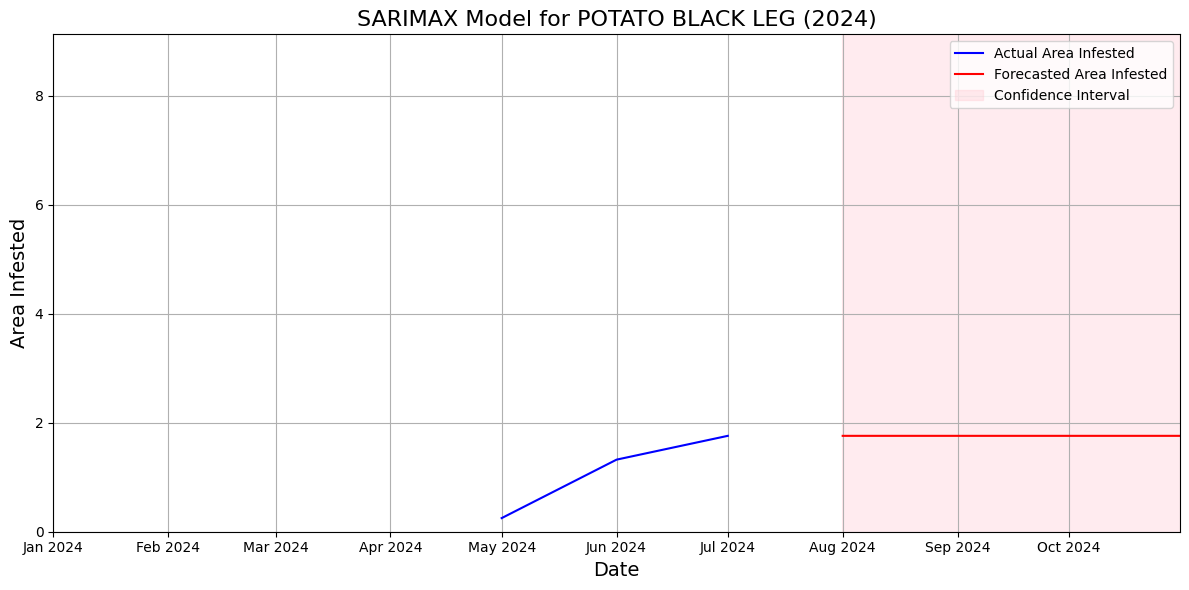


Building SARIMAX model for pest: POTATO CYST NEMATODES


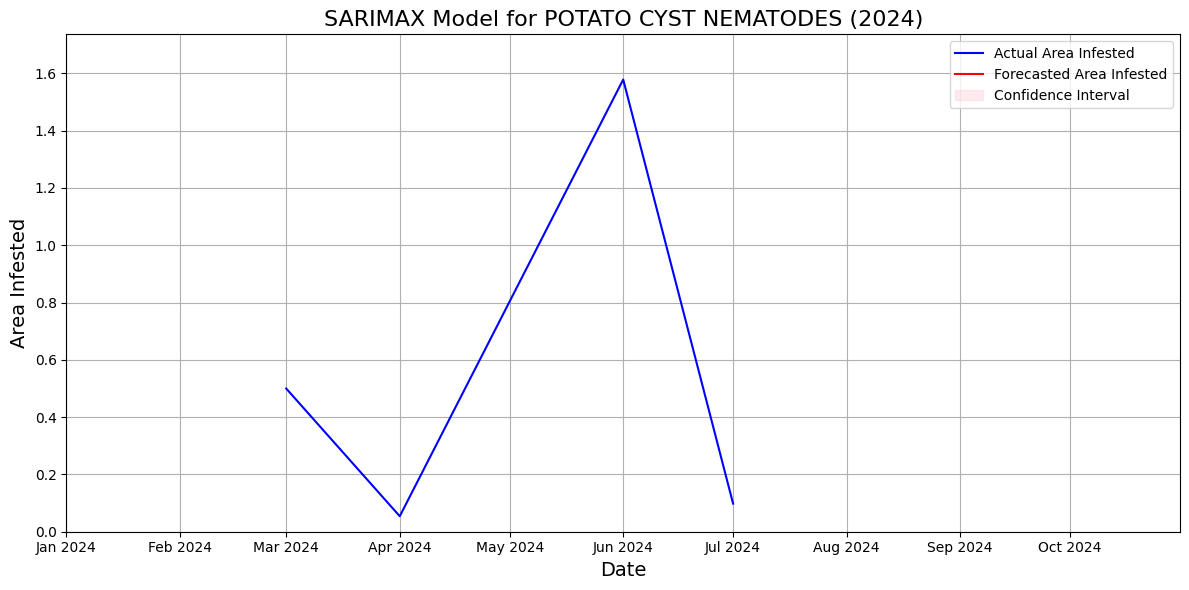


Building SARIMAX model for pest: POTATO EARLY BLIGHT


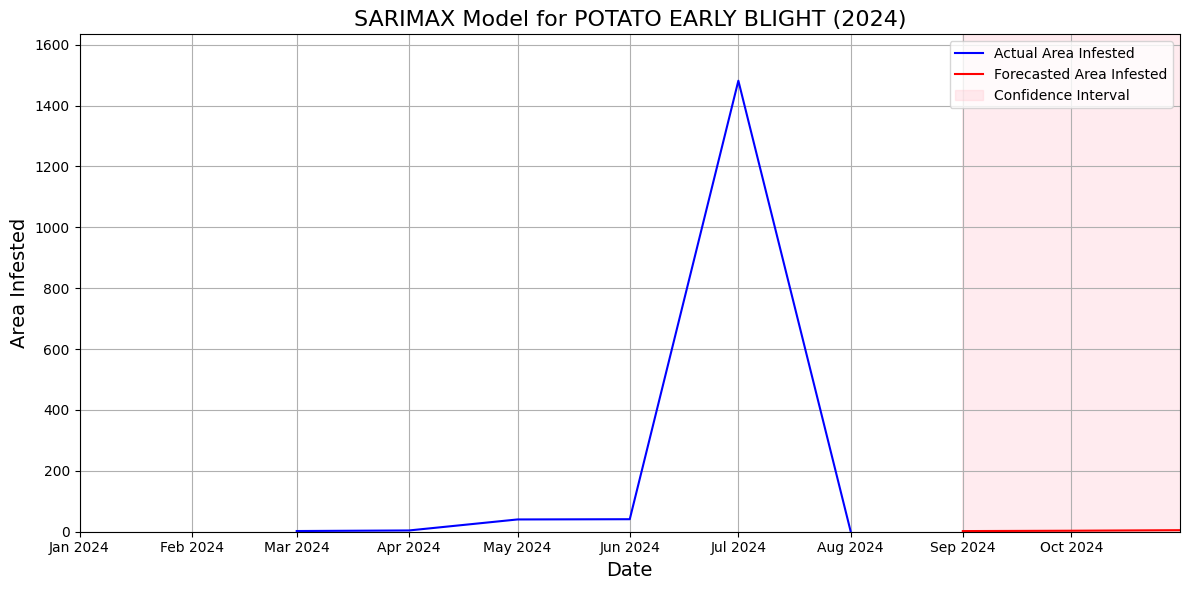


Building SARIMAX model for pest: POWDERY MILDEW
Could not build SARIMAX model for pest POWDERY MILDEW: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

Building SARIMAX model for pest: PSYLLIDS


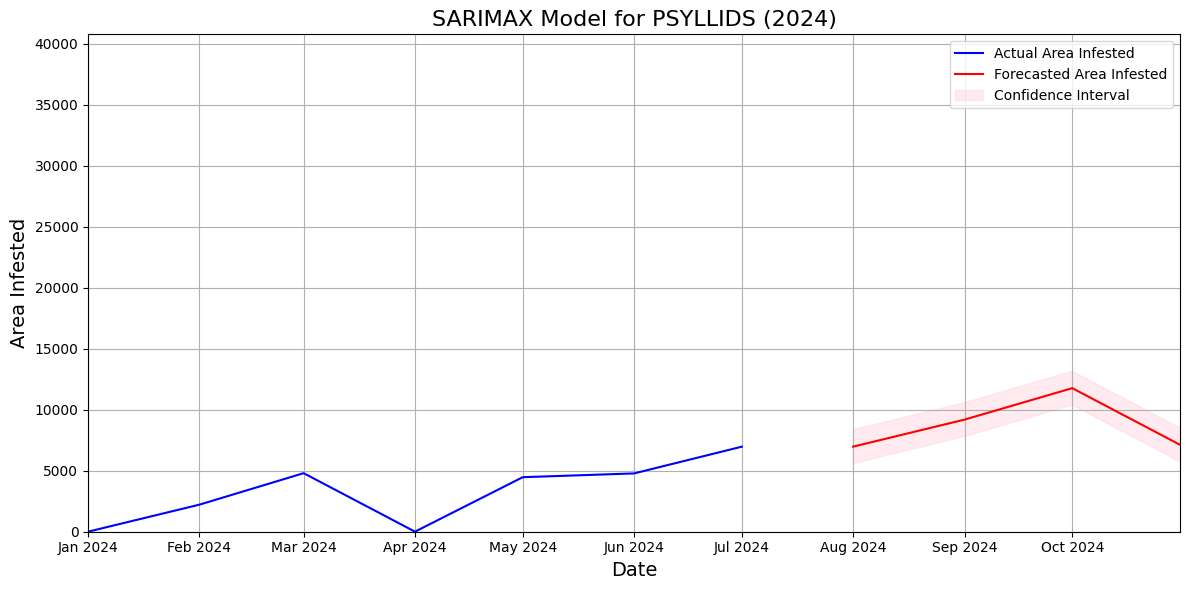


Building SARIMAX model for pest: PURPLE BLOTCH


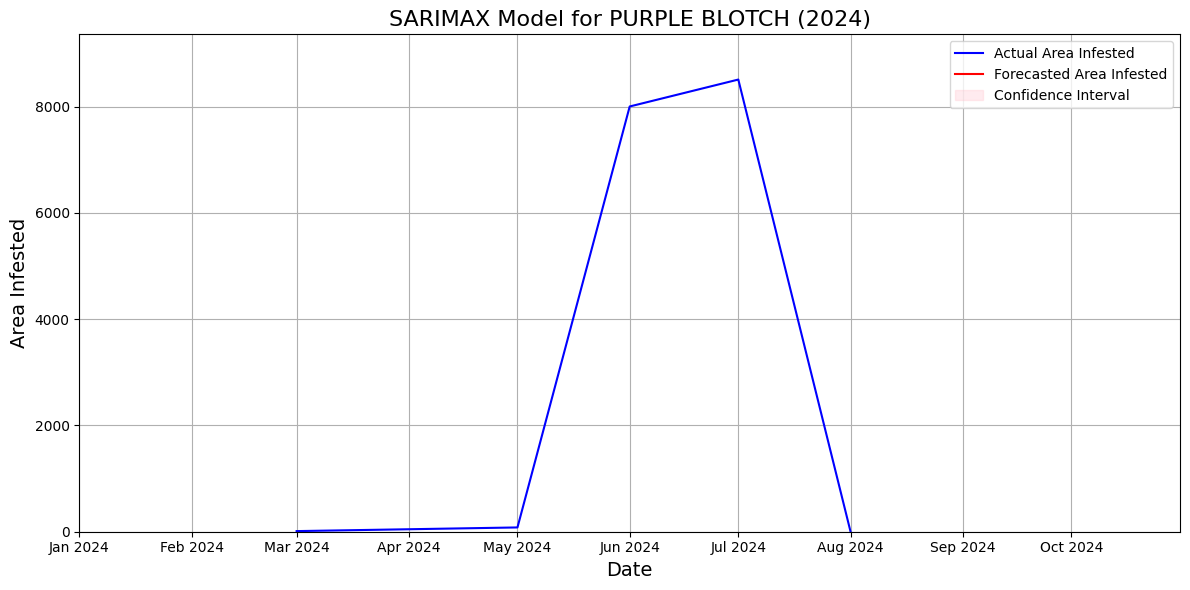


Building SARIMAX model for pest: QUELEA BIRDS


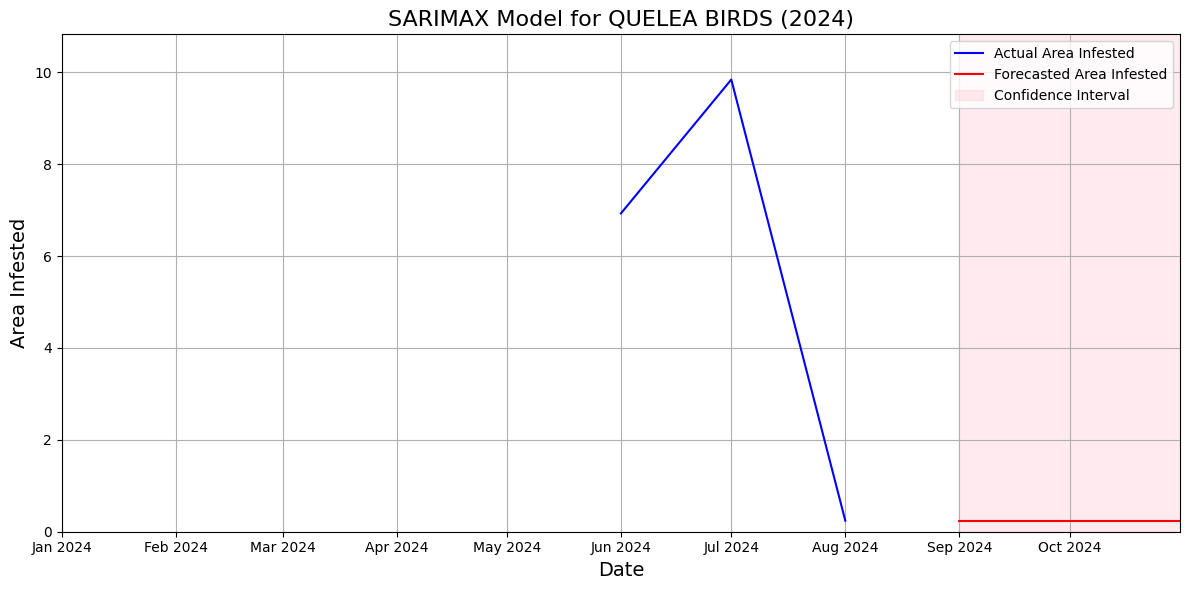


Building SARIMAX model for pest: RATOON STUNTING DISEASE


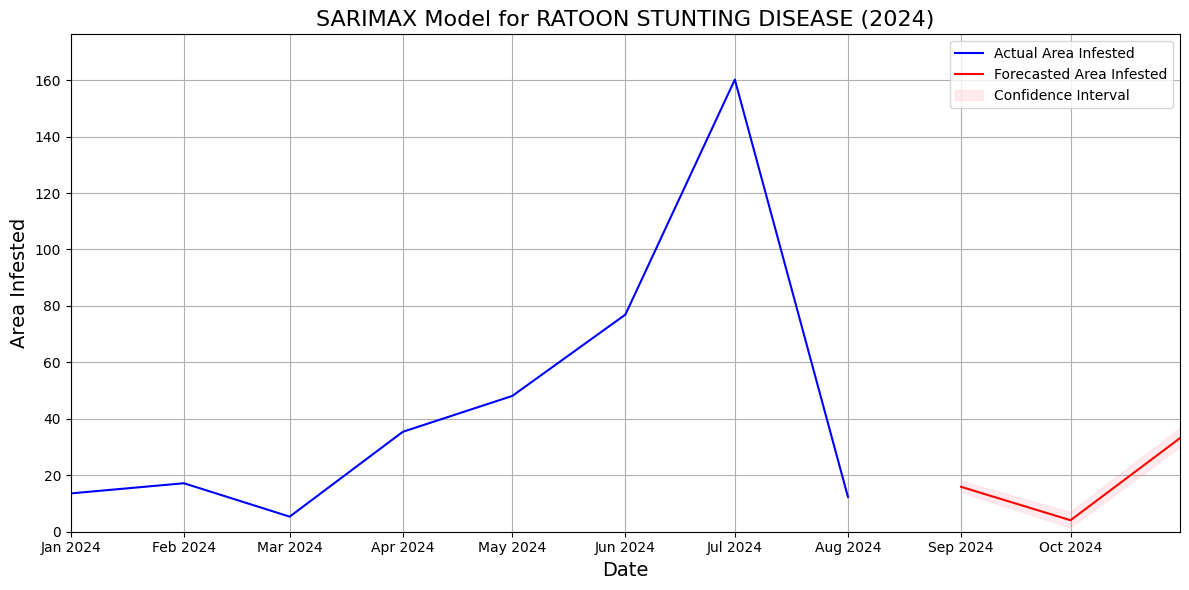


Building SARIMAX model for pest: RICE BLAST


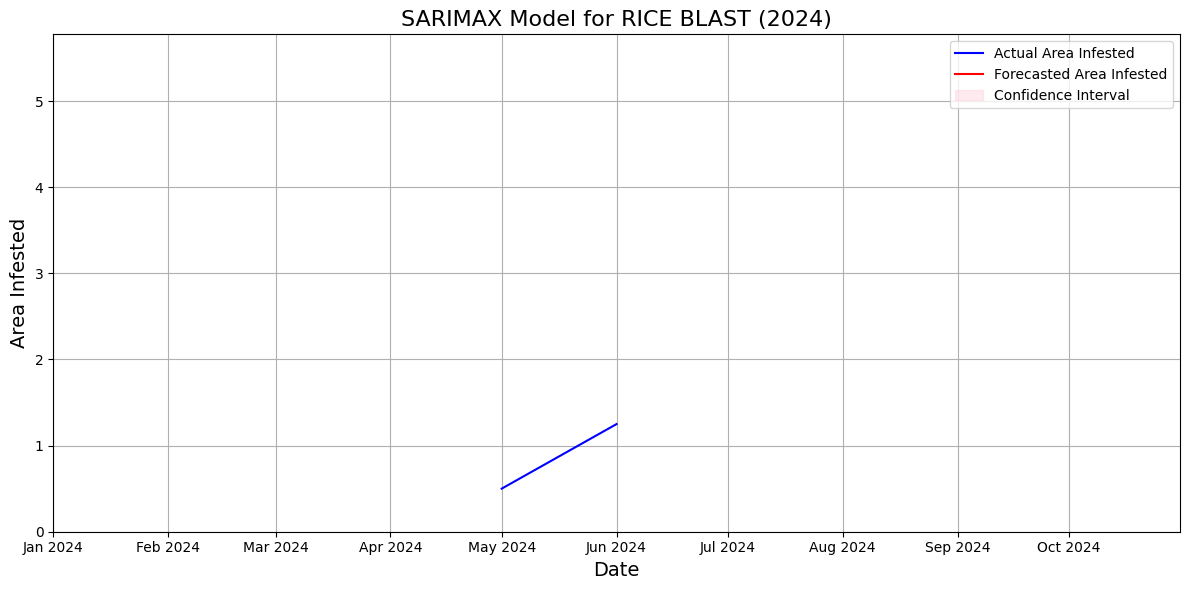


Building SARIMAX model for pest: RING SPOT VIRUS


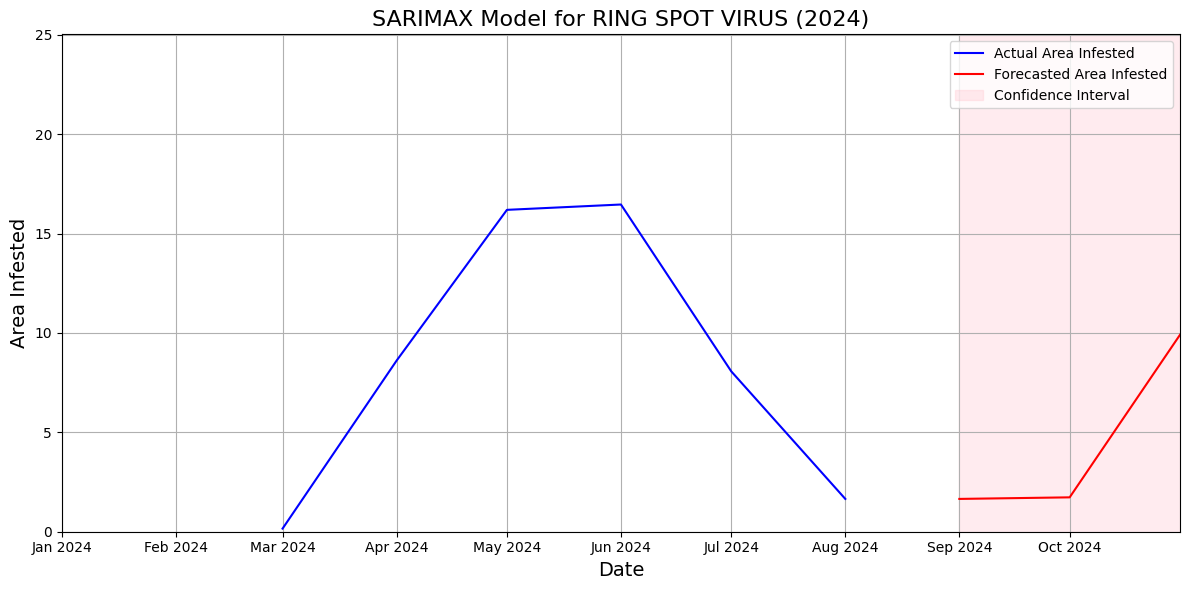


Building SARIMAX model for pest: RODENTS


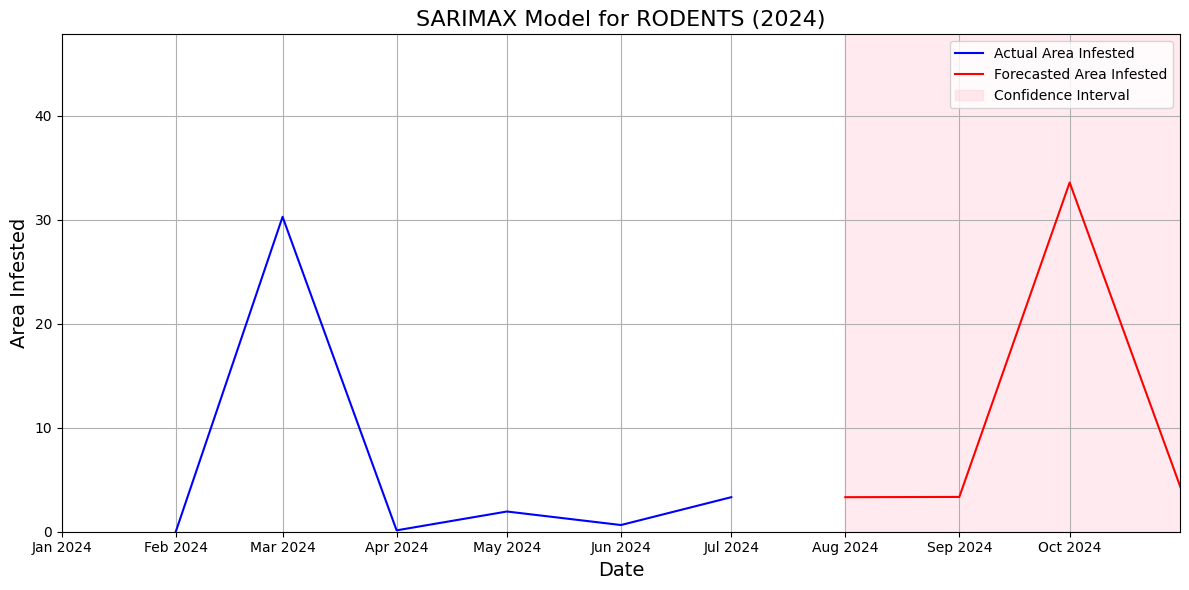


Building SARIMAX model for pest: ROOT KNOT NEMATODES


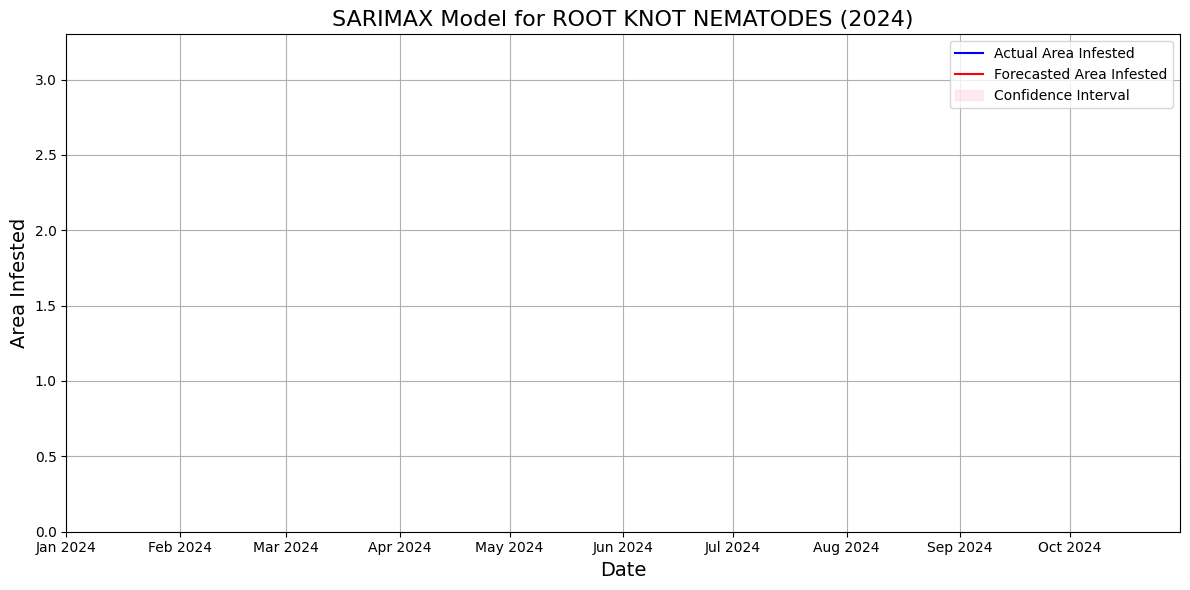


Building SARIMAX model for pest: ROOT ROT


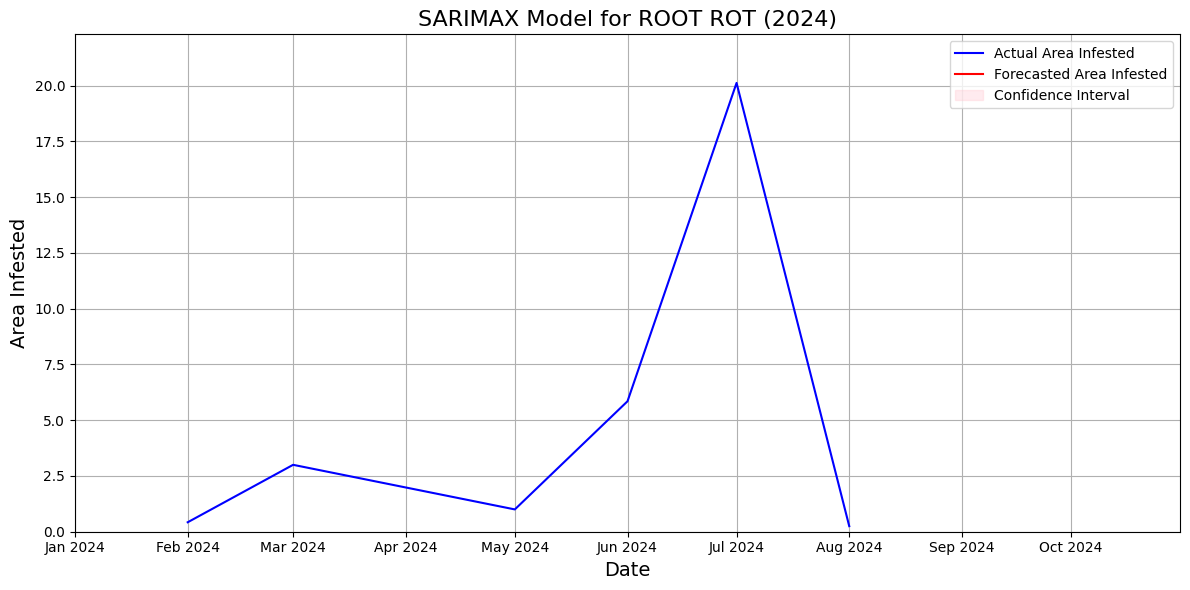


Building SARIMAX model for pest: RUST
Could not build SARIMAX model for pest RUST: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

Building SARIMAX model for pest: SCALE INSECTS
Could not build SARIMAX model for pest SCALE INSECTS: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

Building SARIMAX model for pest: SEPTORIA


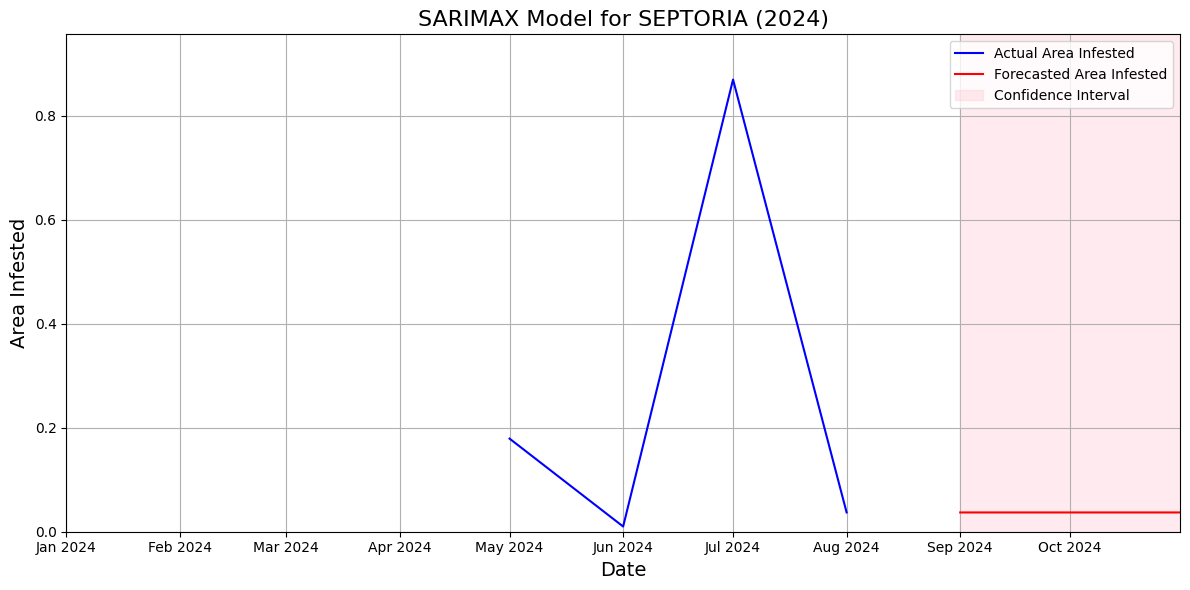


Building SARIMAX model for pest: SIGATOKA
Could not build SARIMAX model for pest SIGATOKA: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

Building SARIMAX model for pest: SMUT


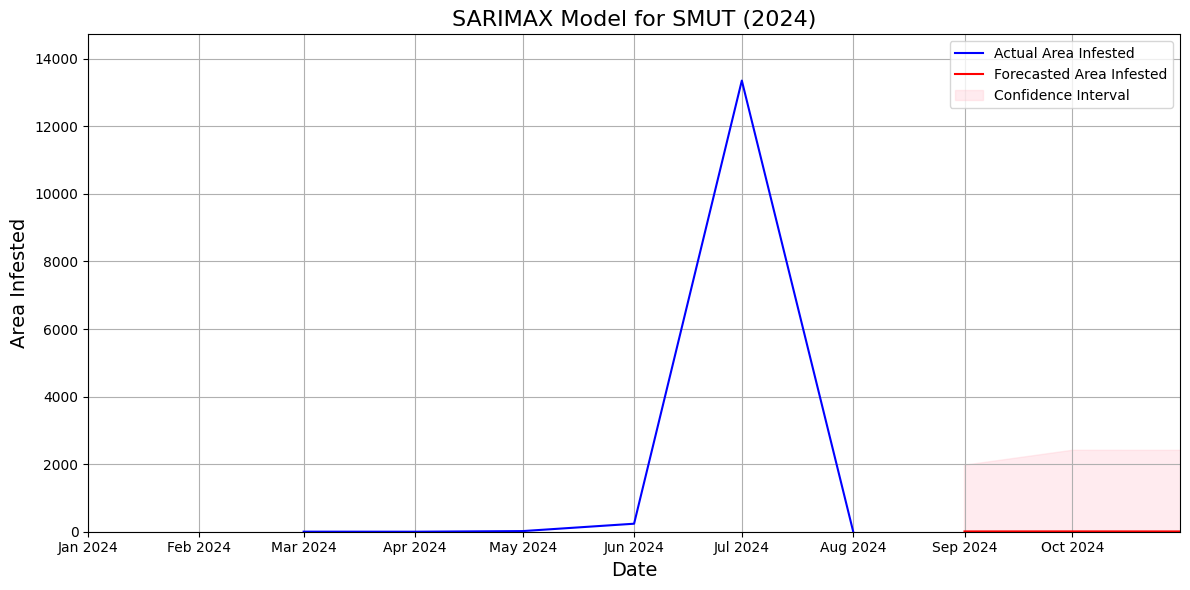


Building SARIMAX model for pest: SPIDER MITES
Could not build SARIMAX model for pest SPIDER MITES: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

Building SARIMAX model for pest: STALK BORERS


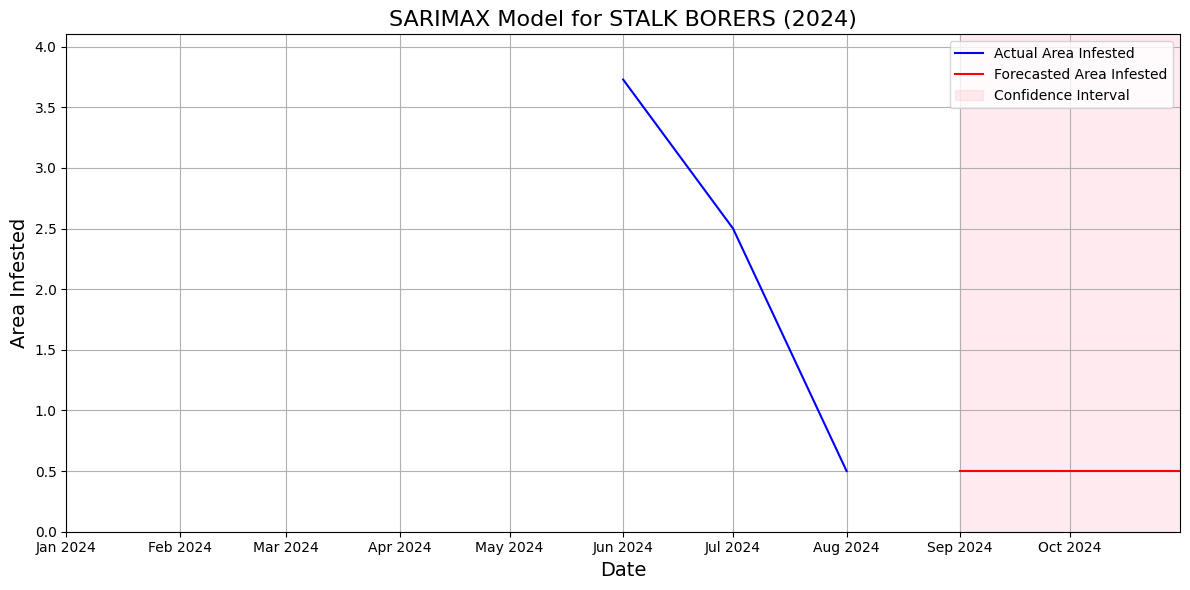


Building SARIMAX model for pest: STEM AND STOLON CANKER


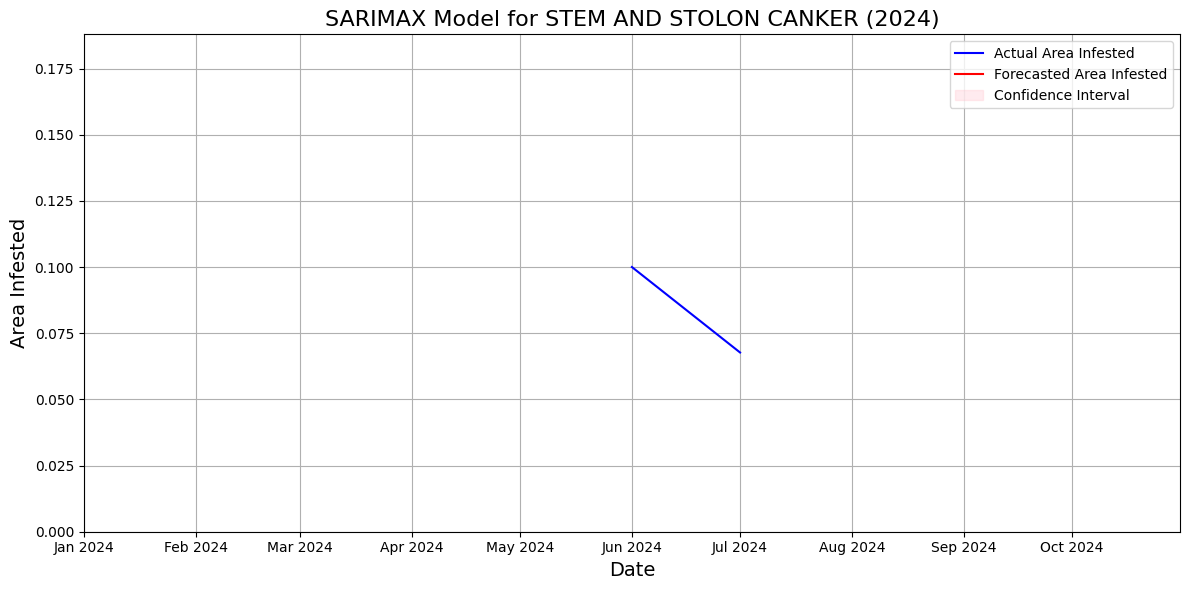


Building SARIMAX model for pest: STEM BORERS


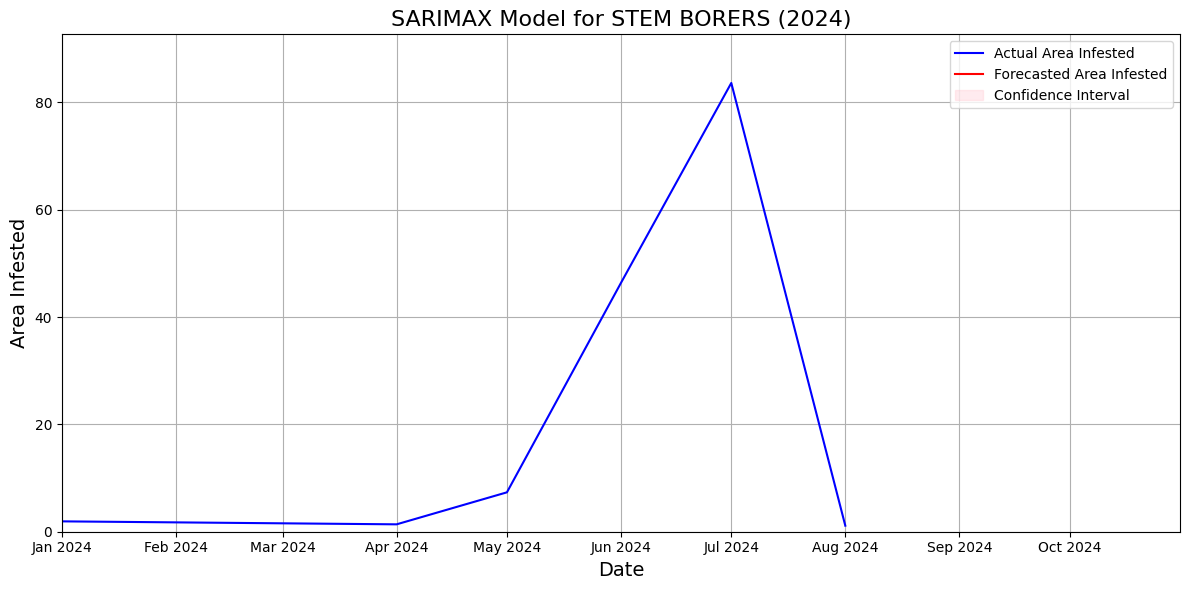


Building SARIMAX model for pest: STRIGA


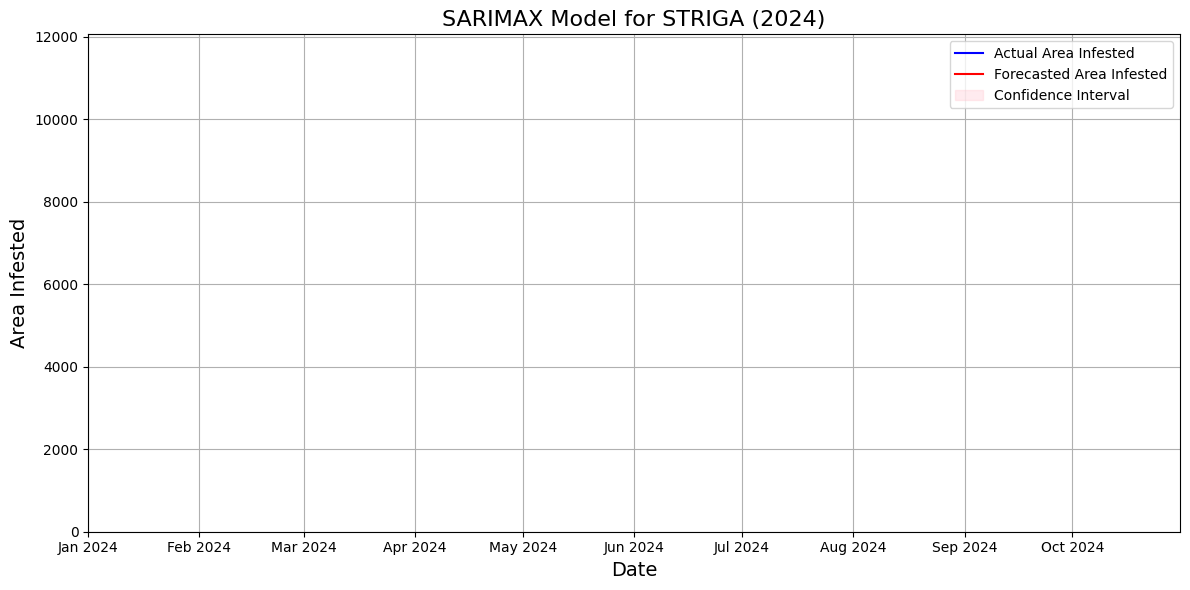


Building SARIMAX model for pest: SUGARCANE RED ROTS


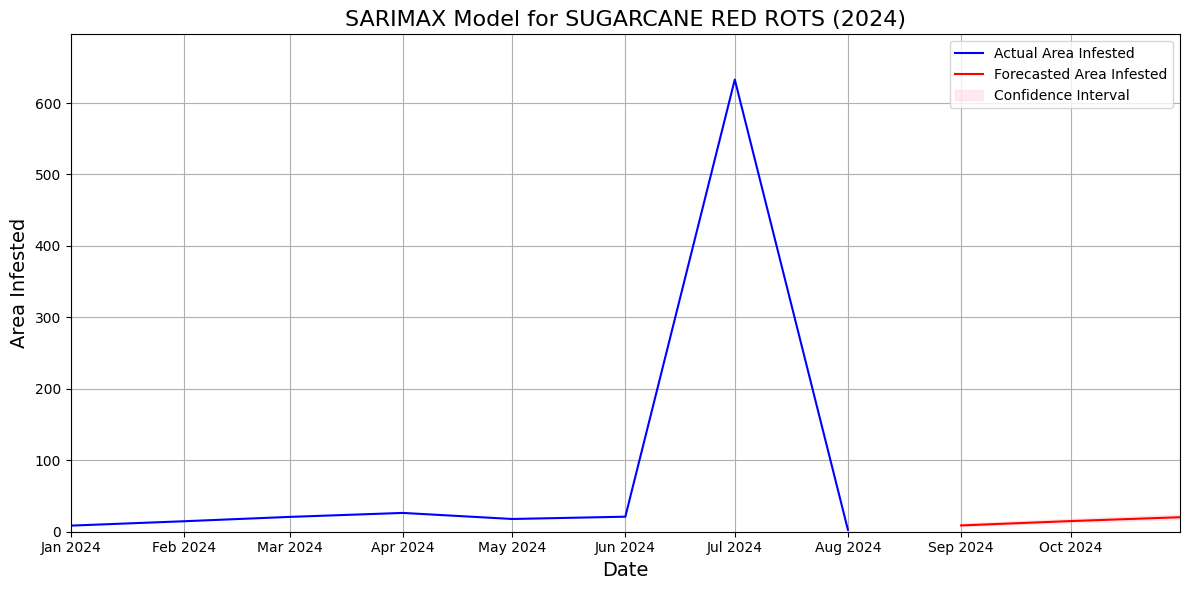


Building SARIMAX model for pest: SUGARCANE STALK BORERS


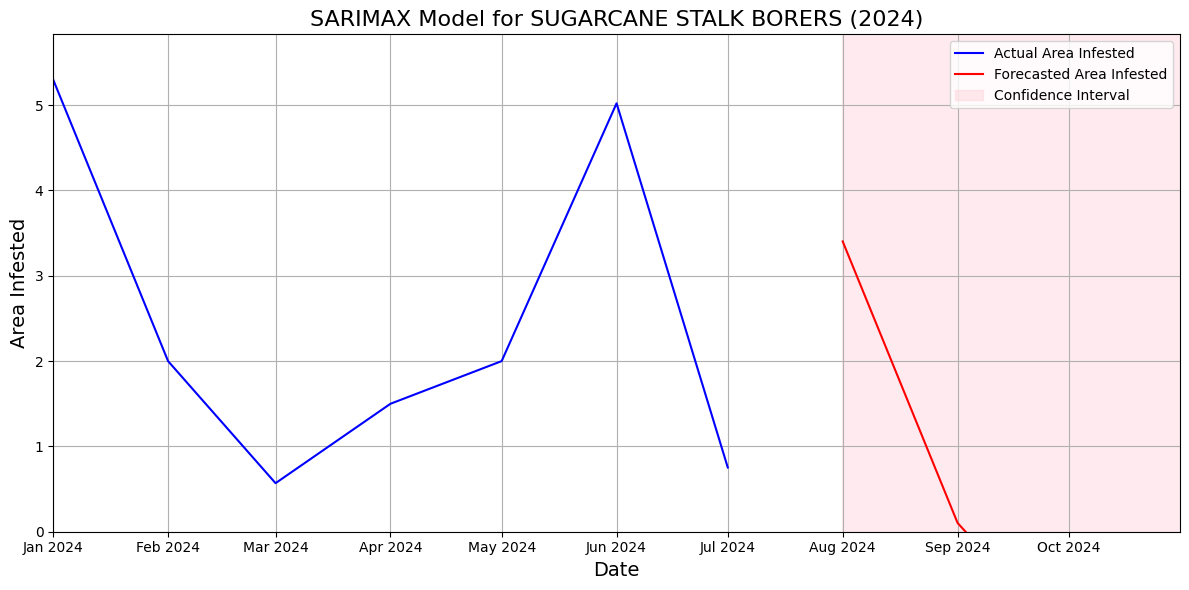


Building SARIMAX model for pest: SWEET POTATO CATERPILLARS


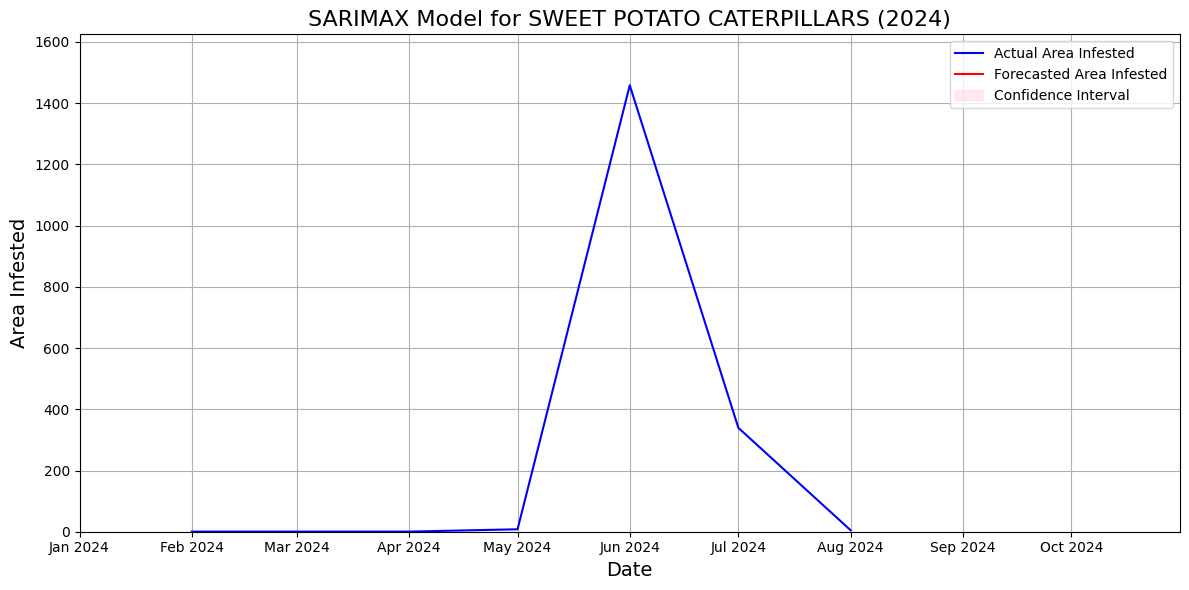


Building SARIMAX model for pest: SWEET POTATO WEEVILS


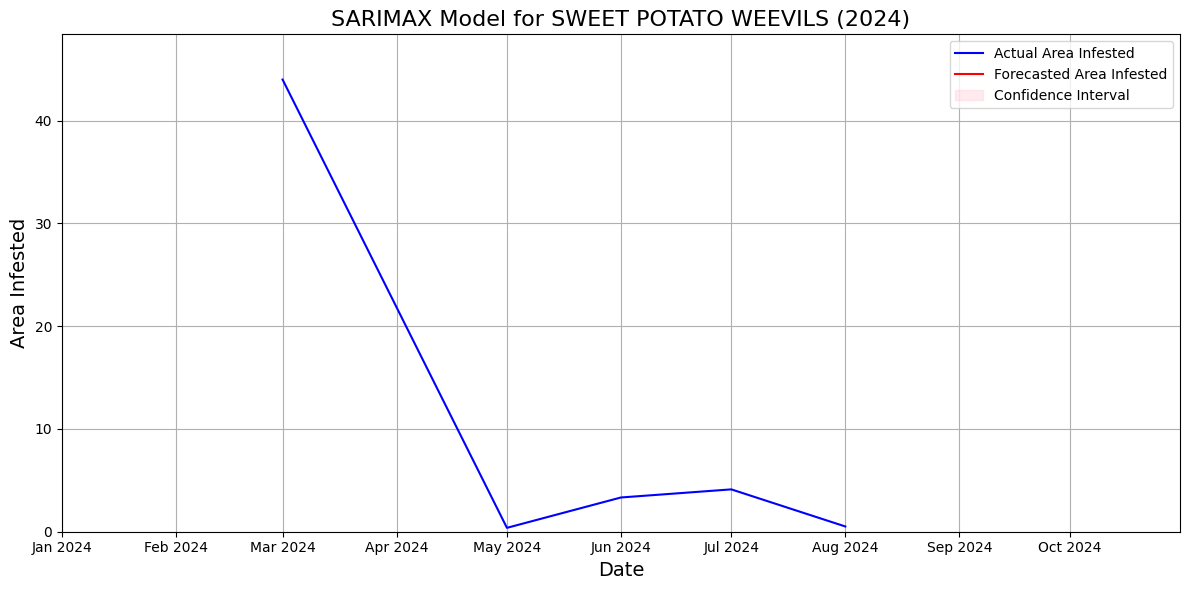


Building SARIMAX model for pest: TALL MORNING GLORY


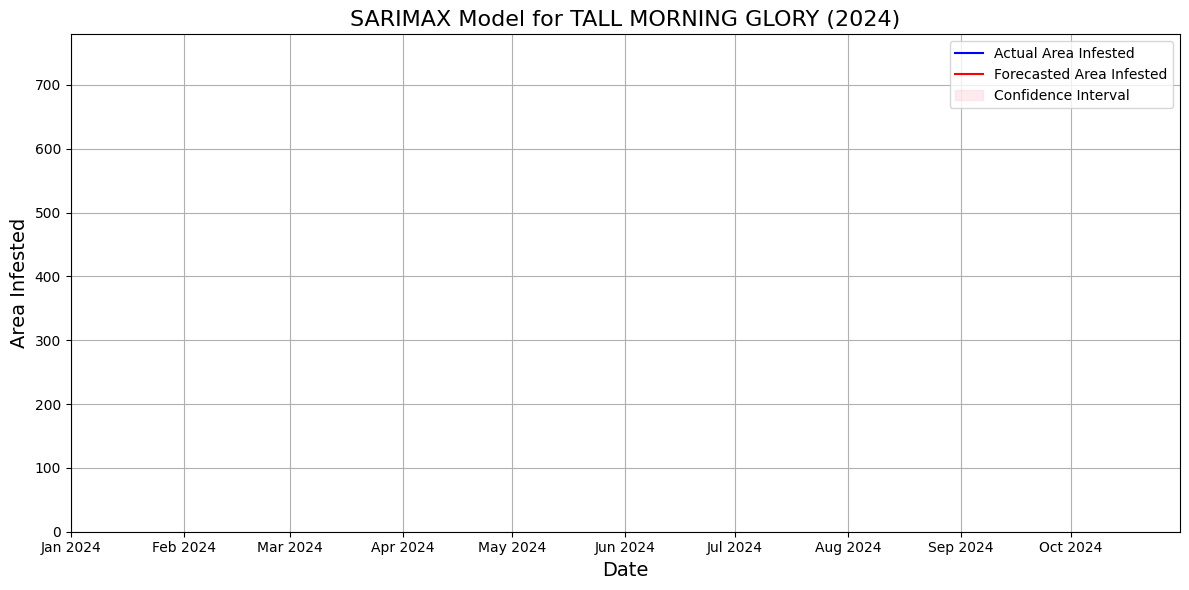


Building SARIMAX model for pest: THRIPS


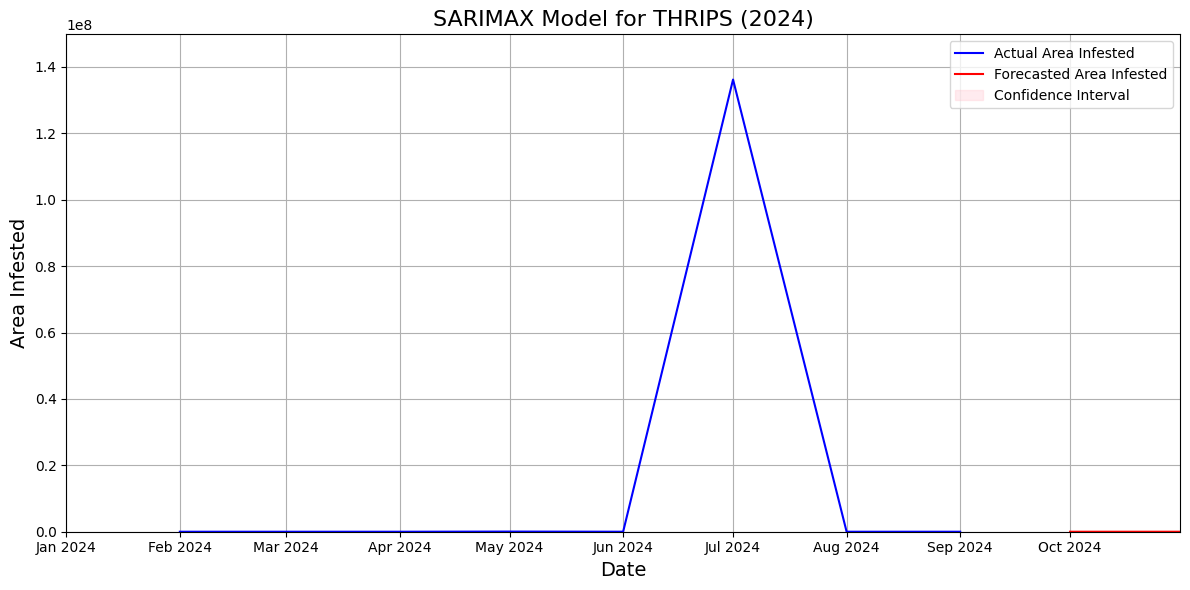


Building SARIMAX model for pest: TREE LOCUSTS


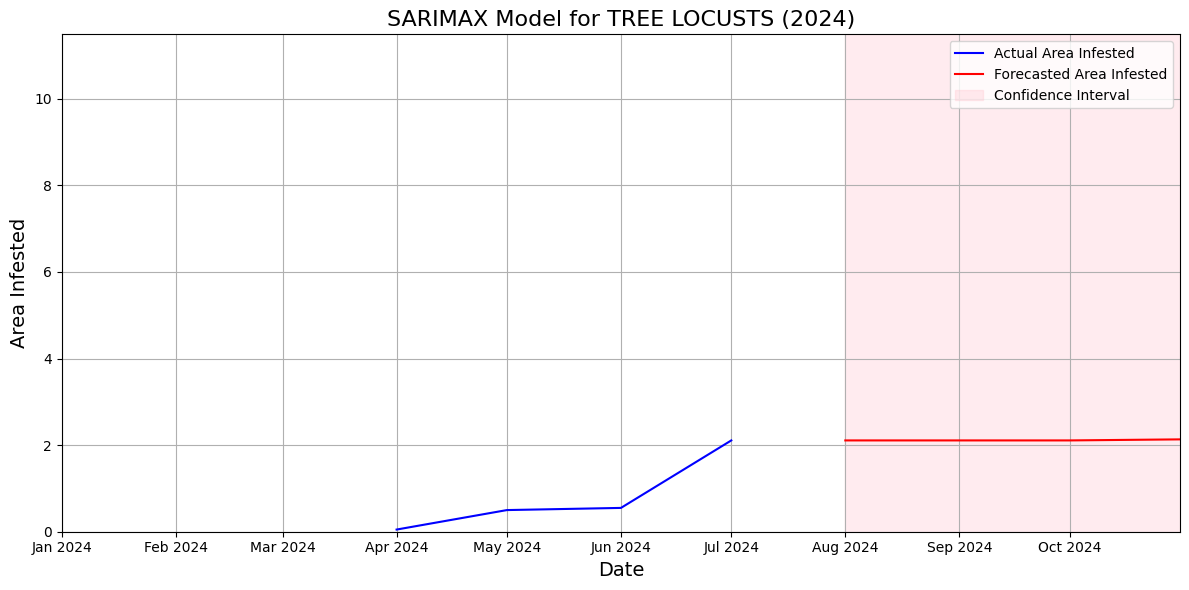


Building SARIMAX model for pest: TUBERWORMS


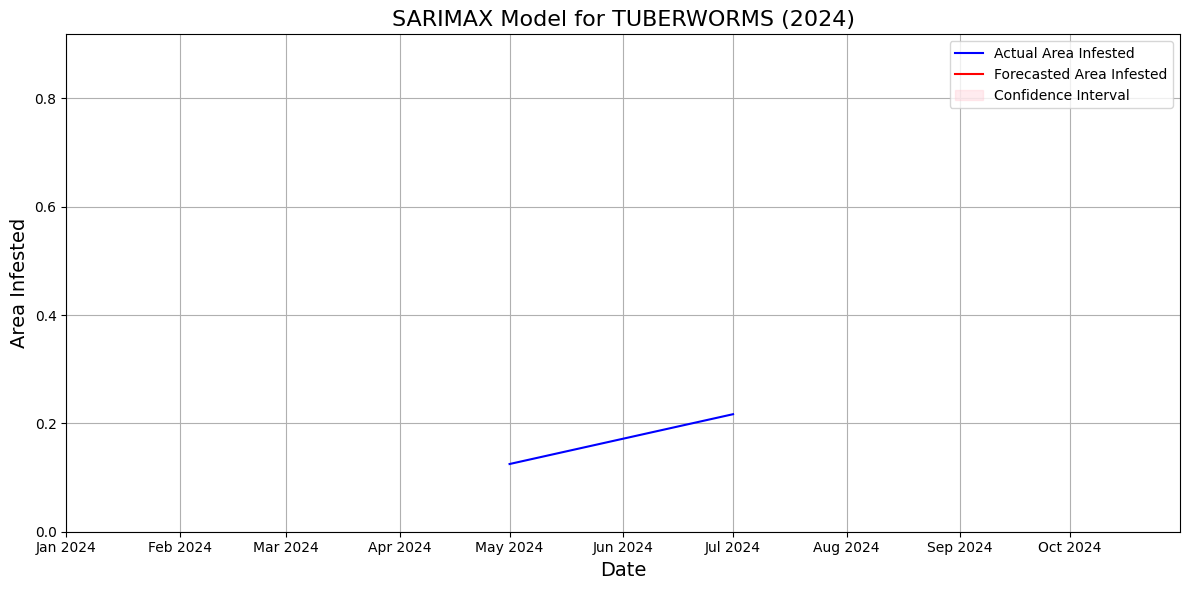


Building SARIMAX model for pest: UNKNOWN DISEASE
Could not build SARIMAX model for pest UNKNOWN DISEASE: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

Building SARIMAX model for pest: UNKNOWN PEST


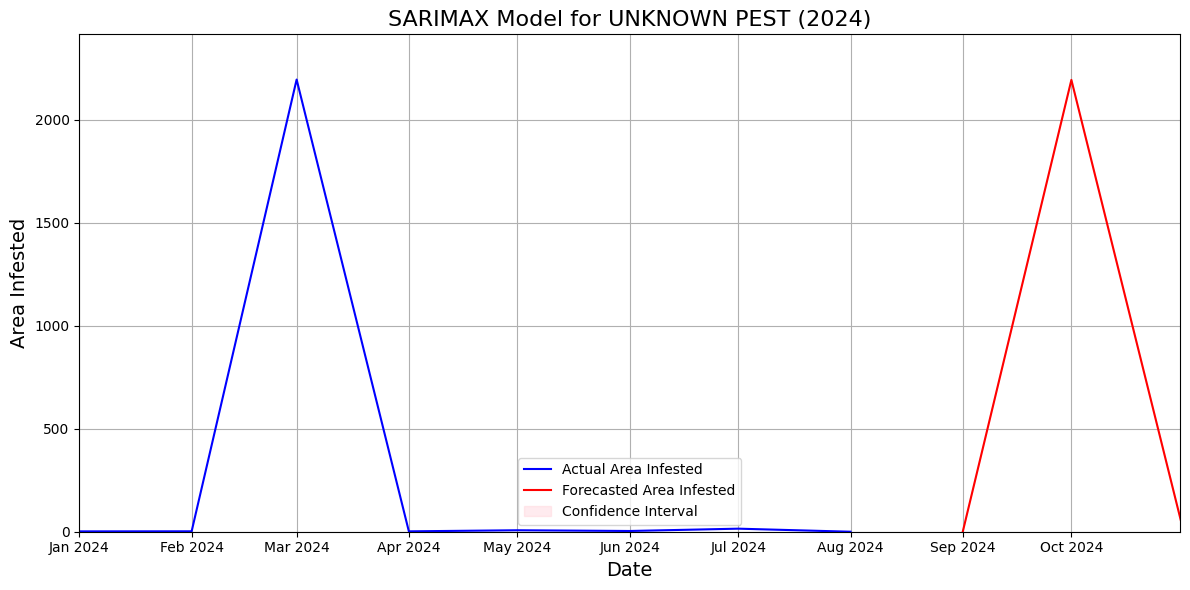


Building SARIMAX model for pest: VARIEGATED GRASSHOPERS


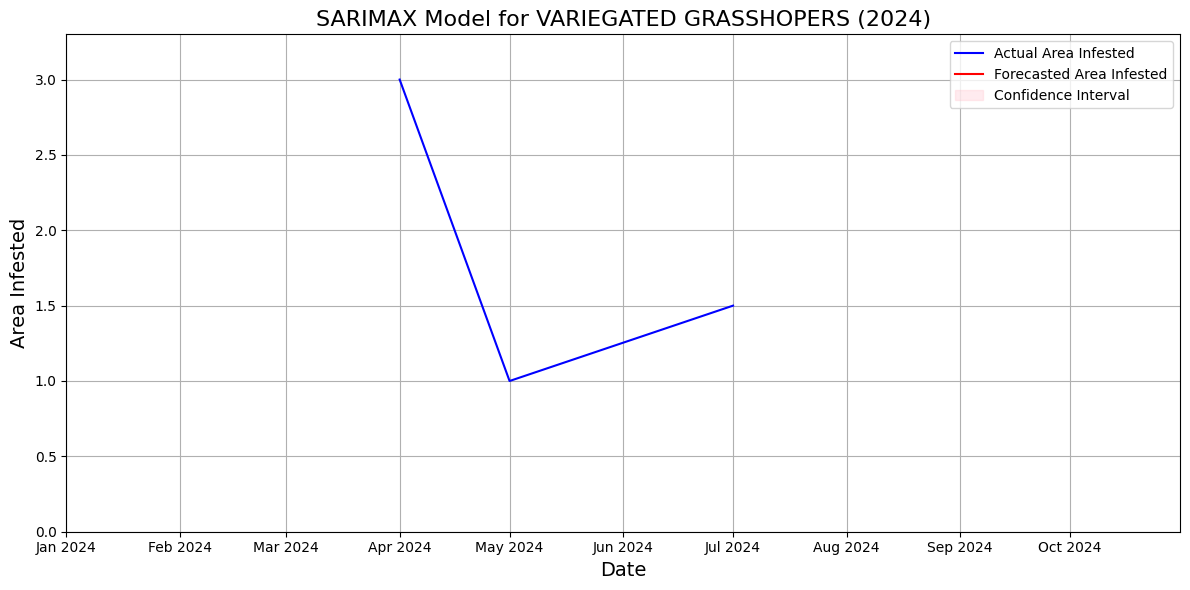


Building SARIMAX model for pest: VERTICILLIUM WILT


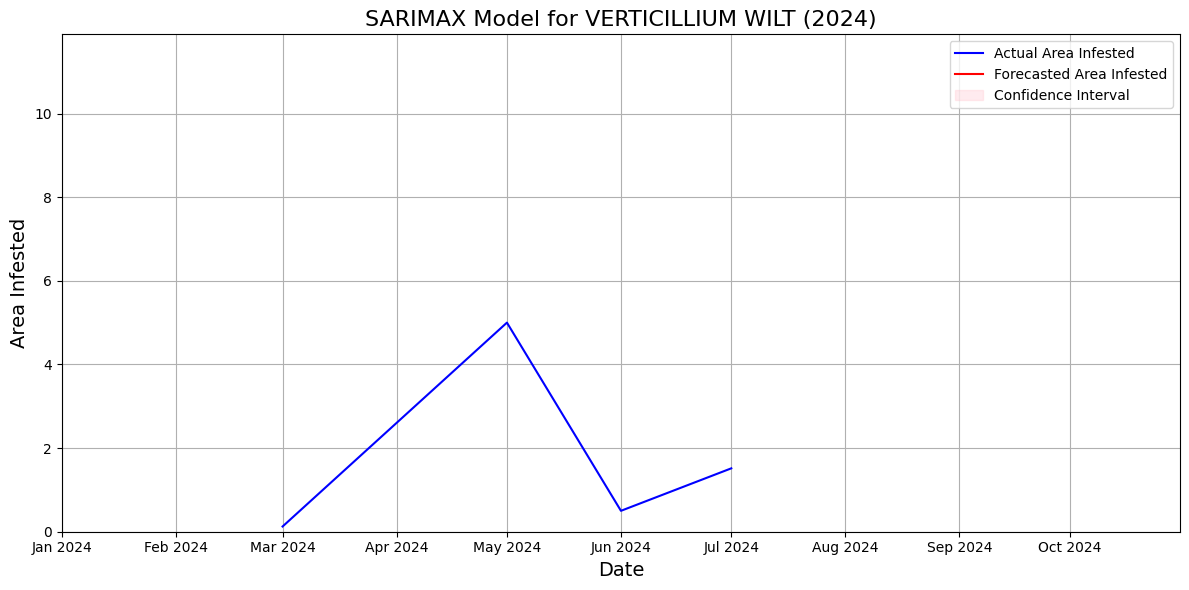


Building SARIMAX model for pest: WATER HYACINTH


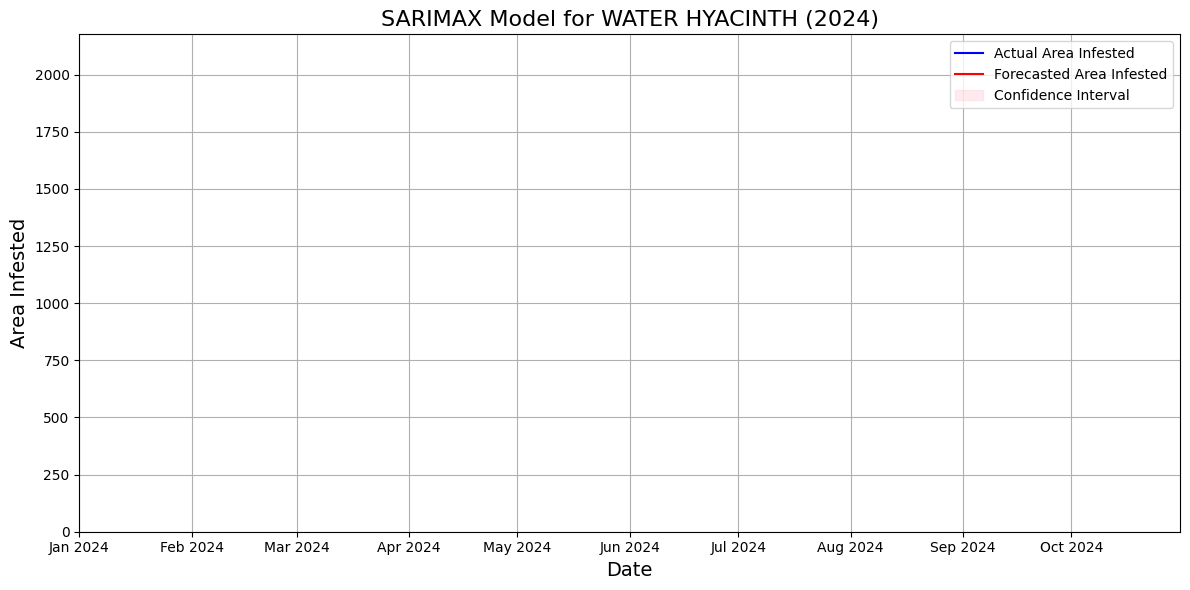


Building SARIMAX model for pest: WHEAT BUNT


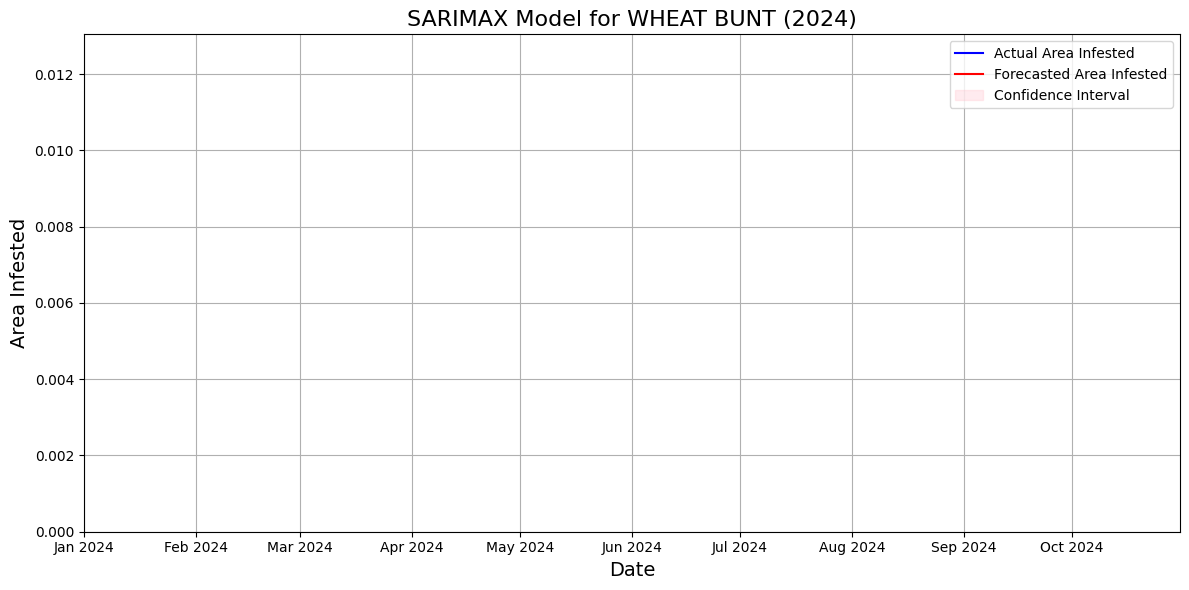


Building SARIMAX model for pest: WHITE MOULD


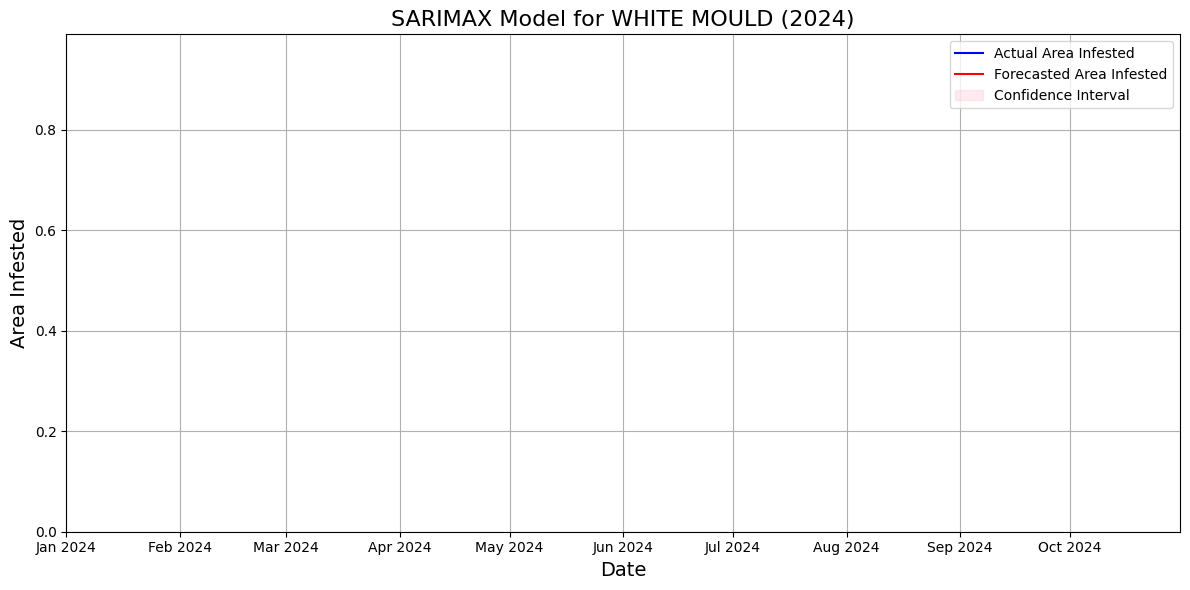


Building SARIMAX model for pest: WHITEFLIES


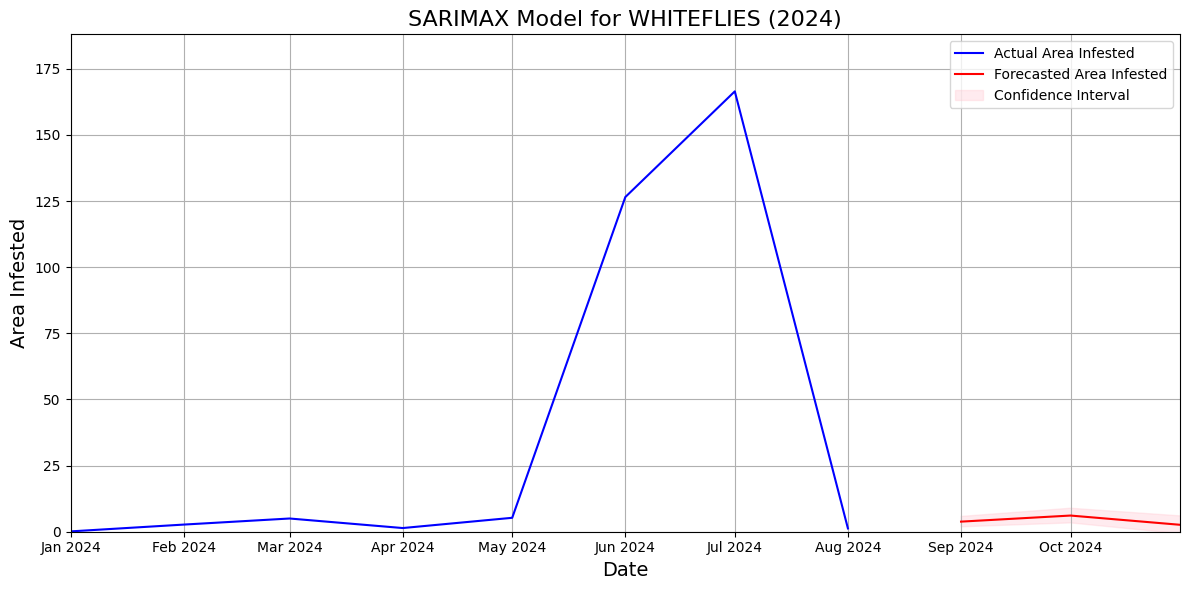


Building SARIMAX model for pest: WIREWORMS


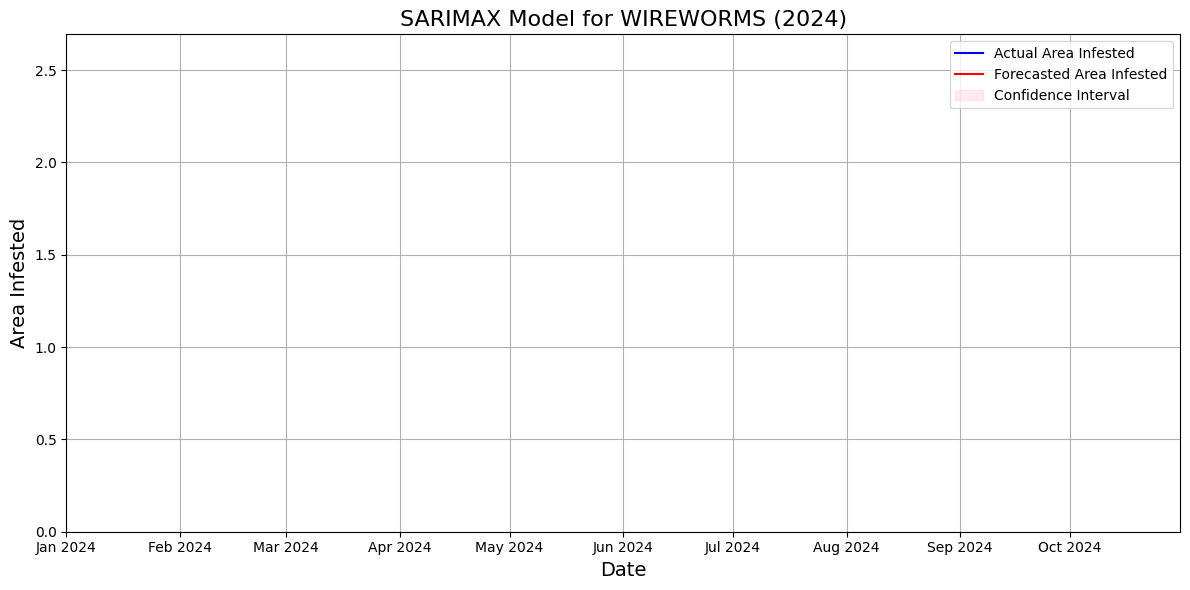


Building SARIMAX model for pest: YELLOW DWARF VIRUS


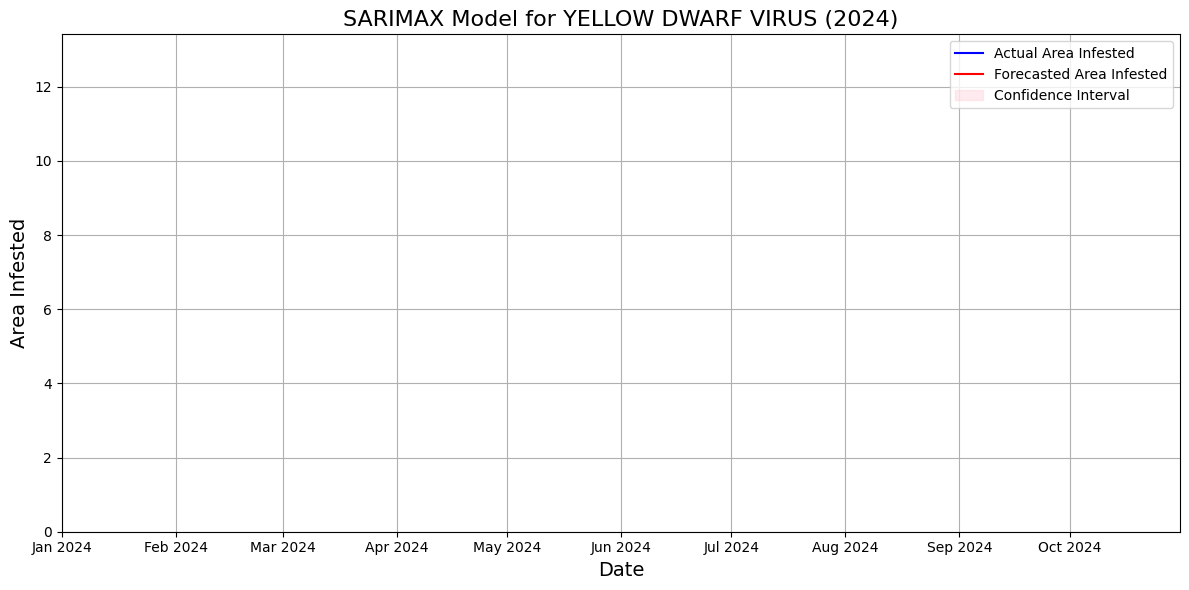

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
import matplotlib.dates as mdates

warnings.filterwarnings("ignore")

# Step 1: Aggregate data by pest and prepare the dataset
# Ensure 'detection_date' is in datetime format
merged_full_data['detection_date'] = pd.to_datetime(merged_full_data['detection_date'], errors='coerce')

# Filter for data in 2024
data_2024 = merged_full_data[merged_full_data['detection_date'].dt.year == 2024]

# Group by pest name and aggregate data
grouped_data = data_2024.groupby(['pest_name', 'detection_date']).agg({
    'area_infested': 'sum',  # Sum area infested per pest per day
    'Temperature Min (°C)': 'mean',
    'Temperature Max (°C)': 'mean',
    'Humidity (%)': 'mean',
    'Precipitation (mm)': 'mean',
    'Wind Speed (m/s)': 'mean'
}).reset_index()

# Step 2: Loop through each pest and build SARIMAX models
unique_pests = grouped_data['pest_name'].unique()
forecast_steps = 30  # Number of days to forecast

for pest in unique_pests:
    print(f"\nBuilding SARIMAX model for pest: {pest}")

    # Filter data for the current pest
    pest_data = grouped_data[grouped_data['pest_name'] == pest]
    pest_data.set_index('detection_date', inplace=True)

    # Define endogenous and exogenous variables
    endog = pest_data['area_infested']  # Target variable
    exog = pest_data[['Temperature Min (°C)', 'Temperature Max (°C)', 'Humidity (%)',
                      'Precipitation (mm)', 'Wind Speed (m/s)']]  # Exogenous variables

    # Replace missing or infinite values
    exog = exog.replace([np.inf, -np.inf], np.nan).fillna(exog.mean())

    # Build SARIMAX model
    try:
        model = SARIMAX(endog, exog=exog, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
        results = model.fit(disp=False)
    except Exception as e:
        print(f"Could not build SARIMAX model for pest {pest}: {e}")
        continue

    # Forecast future values
    # Create a DataFrame with future dates and exogenous values
    future_dates = pd.date_range(endog.index[-1], periods=forecast_steps + 1, freq='D')[1:]  # +1 and [1:] to exclude the last existing date
    future_exog = pd.DataFrame(index=future_dates, columns=exog.columns)
    # Fill future_exog with the mean of existing data for now
    future_exog.fillna(exog.mean(), inplace=True)

    forecast = results.get_forecast(steps=forecast_steps, exog=future_exog)
    forecast_values = forecast.predicted_mean
    forecast_ci = forecast.conf_int()

    # Step 3: Plot actual vs predicted values
    plt.figure(figsize=(12, 6))

    # Plot the actual data
    plt.plot(endog.index, endog, label='Actual Area Infested', color='blue')

    # Plot the forecasted data
    plt.plot(forecast_values.index, forecast_values, label='Forecasted Area Infested', color='red')

    # Fill the confidence interval
    plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1],
                     color='pink', alpha=0.3, label='Confidence Interval')

    # Title and labels
    plt.title(f'SARIMAX Model for {pest} (2024)', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Area Infested', fontsize=14)

    # Set x-axis to show monthly ticks for 2024, up to October
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Monthly locator
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format as Month Year
    plt.xlim(pd.to_datetime('2024-01-01'), pd.to_datetime('2024-10-31'))  # Limit x-axis to 2024

    # Set y-axis dynamically based on the max area infested for the current pest
    max_area = max(endog.max(), forecast_values.max())  # Get max of actual and forecasted values
    plt.ylim(bottom=0, top=max_area * 1.1)  # Set the upper limit to 10% higher than the max value

    # Add grid, legend, and layout
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    # Show the plot
    plt.show()

### **Step 9: Plotting the SARIMAX Forecasts**

In Step 9, the SARIMAX model's 14-day forecast is visualized alongside historical data. Three plots are generated:

1. **Plot 1: Broader Scale (May to October)**  
   - Shows actual area infested, forecasted values, and smoothed data.
   - Includes confidence intervals as a shaded region.

2. **Plot 2: Zoomed-in for Last Month**  
   - Focuses on the last month of data, showing actual vs. forecasted values with smoothed data and confidence intervals.

3. **Plot 3: Most Zoomed-in (Last 14 Days)**  
   - Zooms into the last 14 days, displaying actual vs. forecasted data with smoothed values and confidence intervals.

Each plot helps analyze trends over different time scales and highlights uncertainties with confidence intervals. The y-axis shows the area infested, and the x-axis represents the dates.

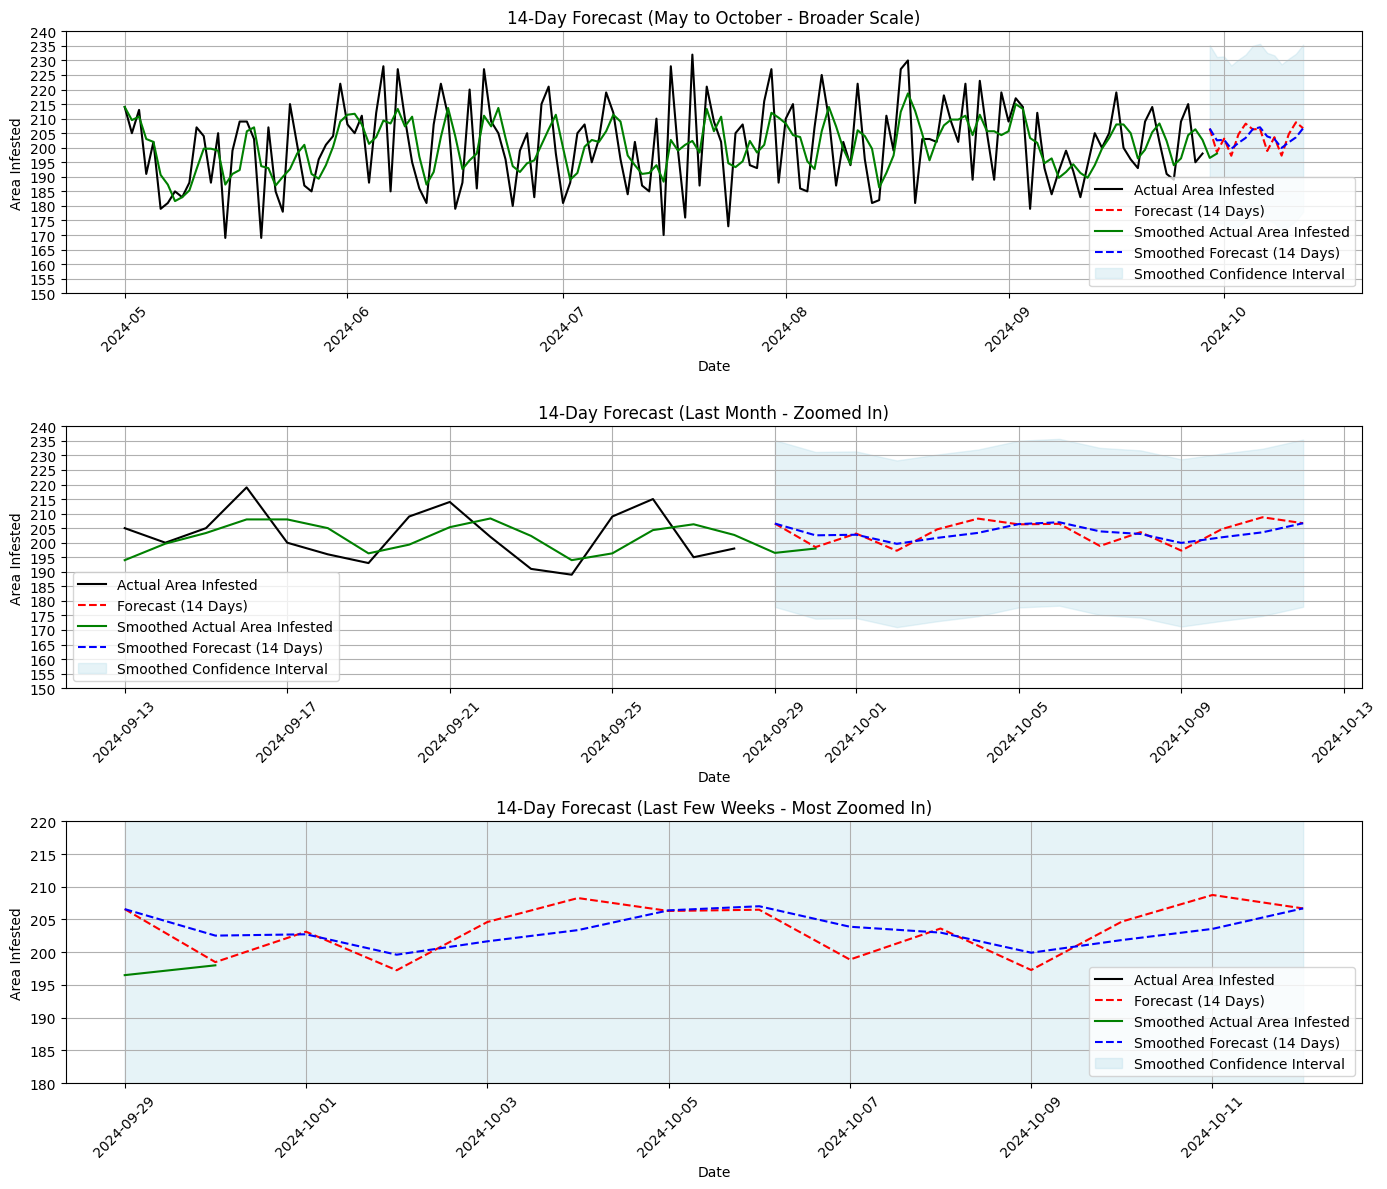

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Example DataFrame for historical data (replace this with your actual data)
date_range = pd.date_range(start='2024-05-01', end='2024-09-28')  # End on 28th September
# Simulated example data for actual area infested (replace this with your actual area infested data)
data = np.random.poisson(lam=200, size=len(date_range))  # Randomly generated data
historical_df = pd.DataFrame(data, index=date_range, columns=['Area Infested'])

# Fit SARIMAX model on historical data
model = SARIMAX(historical_df['Area Infested'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
model_fit = model.fit()

# Forecast for 14 days
forecast_steps = 14
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=historical_df.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)

# Create DataFrame for forecasted values
forecast_df = pd.DataFrame({
    'Forecasted Area Infested': forecast.predicted_mean,
    'Lower CI': forecast.conf_int().iloc[:, 0],
    'Upper CI': forecast.conf_int().iloc[:, 1]
}, index=forecast_index)

# Combine historical and forecast data
combined_df = pd.concat([historical_df, forecast_df])

# Apply Moving Average Smoothing to entire combined data (historical + forecast)
combined_df['Smoothed Area Infested'] = combined_df['Area Infested'].rolling(window=3, min_periods=1).mean()
combined_df['Smoothed Forecasted Area Infested'] = combined_df['Forecasted Area Infested'].rolling(window=3, min_periods=1).mean()
combined_df['Smoothed Lower CI'] = combined_df['Lower CI'].rolling(window=3, min_periods=1).mean()
combined_df['Smoothed Upper CI'] = combined_df['Upper CI'].rolling(window=3, min_periods=1).mean()

# --------- Plot the Data ---------
plt.figure(figsize=(14, 12))

# Plot 1: 14-day Forecast (May to October, broader scale)
plt.subplot(3, 1, 1)
plt.plot(combined_df.index, combined_df['Area Infested'], label='Actual Area Infested', color='black', linestyle='-')
plt.plot(forecast_df.index, forecast_df['Forecasted Area Infested'], label='Forecast (14 Days)', color='red', linestyle='--')
plt.plot(combined_df.index, combined_df['Smoothed Area Infested'], label='Smoothed Actual Area Infested', color='green', linestyle='-')
plt.plot(forecast_df.index, combined_df['Smoothed Forecasted Area Infested'].dropna(), label='Smoothed Forecast (14 Days)', color='blue', linestyle='--')

# Fix for confidence intervals - select only the forecasted part (14 days)
plt.fill_between(forecast_df.index, combined_df['Smoothed Lower CI'].iloc[-forecast_steps:], combined_df['Smoothed Upper CI'].iloc[-forecast_steps:], color='lightblue', alpha=0.3, label='Smoothed Confidence Interval')

plt.title('14-Day Forecast (May to October - Broader Scale)')
plt.xlabel('Date')
plt.ylabel('Area Infested')
plt.xticks(rotation=45)
plt.ylim(150, 240)
plt.grid(True)
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(5))
plt.legend()

# Plot 2: 14-day Forecast (Last Month, zoomed in with favorable y-axis)
plt.subplot(3, 1, 2)
plt.plot(combined_df.index[-30:], combined_df['Area Infested'][-30:], label='Actual Area Infested', color='black', linestyle='-')
plt.plot(forecast_df.index, forecast_df['Forecasted Area Infested'], label='Forecast (14 Days)', color='red', linestyle='--')
plt.plot(combined_df.index[-30:], combined_df['Smoothed Area Infested'][-30:], label='Smoothed Actual Area Infested', color='green', linestyle='-')
plt.plot(forecast_df.index, combined_df['Smoothed Forecasted Area Infested'].dropna(), label='Smoothed Forecast (14 Days)', color='blue', linestyle='--')

plt.fill_between(forecast_df.index, combined_df['Smoothed Lower CI'].iloc[-forecast_steps:], combined_df['Smoothed Upper CI'].iloc[-forecast_steps:], color='lightblue', alpha=0.3, label='Smoothed Confidence Interval')

plt.title('14-Day Forecast (Last Month - Zoomed In)')
plt.xlabel('Date')
plt.ylabel('Area Infested')
plt.xticks(rotation=45)
plt.ylim(150, 240)
plt.grid(True)
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(5))
plt.legend()

# Plot 3: 14-day Forecast (Last Few Weeks, most zoomed-in y-axis)
plt.subplot(3, 1, 3)
plt.plot(combined_df.index[-14:], combined_df['Area Infested'][-14:], label='Actual Area Infested', color='black', linestyle='-')
plt.plot(forecast_df.index, forecast_df['Forecasted Area Infested'], label='Forecast (14 Days)', color='red', linestyle='--')
plt.plot(combined_df.index[-14:], combined_df['Smoothed Area Infested'][-14:], label='Smoothed Actual Area Infested', color='green', linestyle='-')
plt.plot(forecast_df.index, combined_df['Smoothed Forecasted Area Infested'].dropna(), label='Smoothed Forecast (14 Days)', color='blue', linestyle='--')

plt.fill_between(forecast_df.index, combined_df['Smoothed Lower CI'].iloc[-forecast_steps:], combined_df['Smoothed Upper CI'].iloc[-forecast_steps:], color='lightblue', alpha=0.3, label='Smoothed Confidence Interval')

plt.title('14-Day Forecast (Last Few Weeks - Most Zoomed In)')
plt.xlabel('Date')
plt.ylabel('Area Infested')
plt.xticks(rotation=45)
plt.ylim(180, 220)
plt.grid(True)
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(5))
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import time

# Function to create dataset sequences
def create_dataset(dataset, look_back=1):
    """
    Converts a time series dataset into sequences for LSTM input.

    Args:
        dataset (np.array): Original dataset as a NumPy array.
        look_back (int): Number of previous time steps to use as input features.

    Returns:
        tuple: X (features) and Y (target) as NumPy arrays.
    """
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:i + look_back, 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Load your dataset here (replace with your data loading code)
# Assuming `dataset` is a NumPy array of shape (n_samples, n_features)
# dataset = ...  # Replace with your actual dataset
# Replace ... with your actual dataset.
# Example: Assuming 'Temperature Min (°C)' from merged_full_data_cleaned
dataset = merged_full_data_cleaned[['Temperature Min (°C)']].values

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_scaled = scaler.fit_transform(dataset)

# Split into train and test sets
train_size = int(len(dataset_scaled) * 0.8)
train, test = dataset_scaled[:train_size], dataset_scaled[train_size:]

# Create sequences for LSTM input
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape into [samples, time steps, features] as required by LSTM
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

Epoch 1/10
30618/30618 ━━━━━━━━━━━━━━━━━━━━ 62s 2ms/step - loss: 0.0048 - val_loss: 3.9698e-05
Epoch 2/10
30618/30618 ━━━━━━━━━━━━━━━━━━━━ 61s 2ms/step - loss: 4.0531e-05 - val_loss: 3.9482e-05
Epoch 3/10
30618/30618 ━━━━━━━━━━━━━━━━━━━━ 60s 2ms/step - loss: 5.2690e-05 - val_loss: 3.9421e-05
Epoch 4/10
30618/30618 ━━━━━━━━━━━━━━━━━━━━ 84s 2ms/step - loss: 4.0879e-05 - val_loss: 3.9422e-05
Epoch 5/10
30618/30618 ━━━━━━━━━━━━━━━━━━━━ 58s 2ms/step - loss: 4.2634e-05 - val_loss: 3.9334e-05
Epoch 6/10
30618/30618 ━━━━━━━━━━━━━━━━━━━━ 86s 2ms/step - loss: 7.2006e-05 - val_loss: 3.9340e-05
Epoch 7/10
30618/30618 ━━━━━━━━━━━━━━━━━━━━ 79s 2ms/step - loss: 5.7483e-05 - val_loss: 3.9325e-05
Epoch 8/10
30618/30618 ━━━━━━━━━━━━━━━━━━━━ 62s 2ms/step - loss: 2.9377e-05 - val_loss: 3.9348e-05
Epoch 9/10
30618/30618 ━━━━━━━━━━━━━━━━━━━━ 80s 2ms/step - loss: 8.1473e-05 - val_loss: 3.9306e-05
Epoch 10/10
30618/30618 ━━━━━━━━━━━━━━━━━━━━ 84s 2ms/step - loss: 2.1380e-05 - val_loss: 3.9331e-05
--- Training 

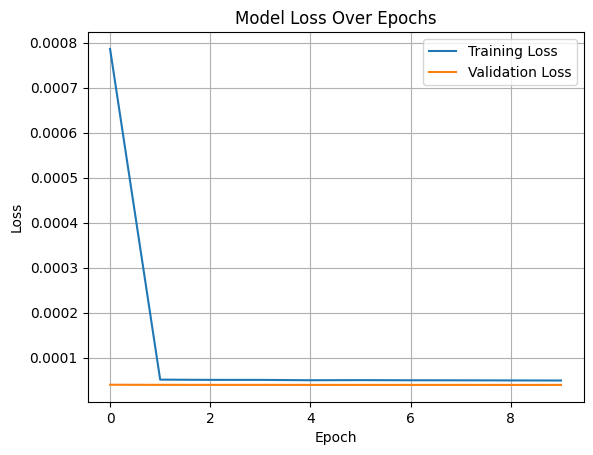

In [ ]:
# Delete any pre-existing model in the workspace
if 'model' in globals():
    del model

# Build the LSTM model
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))

# Compile the model using Adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
start_time = time.time()
history = model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=1, validation_data=(testX, testY))
print("--- Training Time: %s seconds ---" % (time.time() - start_time))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Function to make predictions and calculate performance metrics
def make_preds_and_evaluate(model, trainX, trainY, testX, testY, scaler):
    # Make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)

    # Invert scaling for predictions and actual values
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])

    # Calculate RMSE and R² scores
    train_rmse = np.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
    train_r2 = r2_score(trainY[0], trainPredict[:, 0])
    test_rmse = np.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
    test_r2 = r2_score(testY[0], testPredict[:, 0])

    print(f"Train RMSE: {train_rmse:.2f}, Train R²: {train_r2:.2f}")
    print(f"Test RMSE: {test_rmse:.2f}, Test R²: {test_r2:.2f}")

    return trainPredict, testPredict

# Make predictions and evaluate
trainPredict, testPredict = make_preds_and_evaluate(model, trainX, trainY, testX, testY, scaler)


957/957 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Train RMSE: 0.12, Train R²: 0.00
Test RMSE: 0.12, Test R²: -0.00


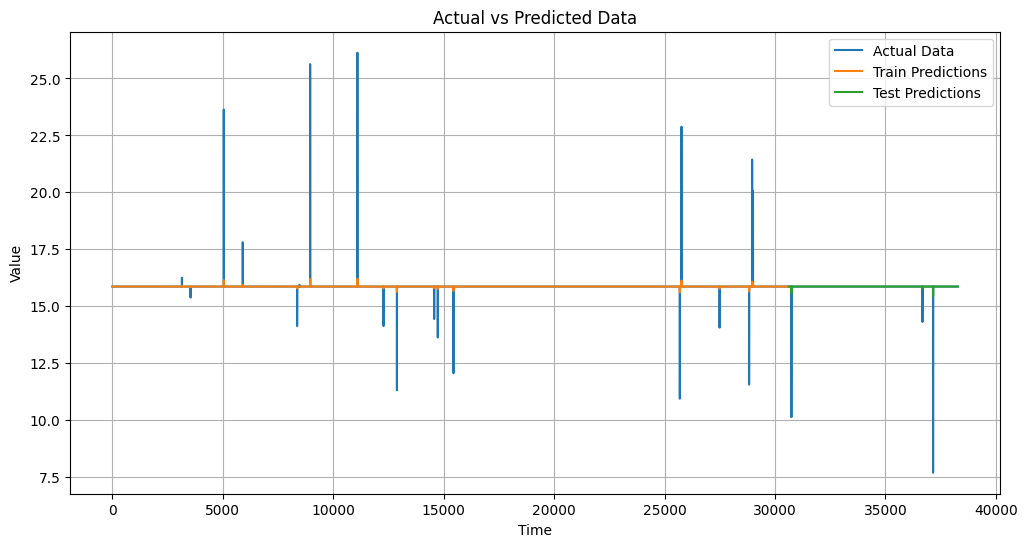

In [ ]:
# Function to plot actual vs predicted values
def plot_predictions(dataset, trainPredict, testPredict, scaler, look_back):
    dataset_inversed = scaler.inverse_transform(dataset)
    trainPredictPlot = np.empty_like(dataset_inversed)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

    testPredictPlot = np.empty_like(dataset_inversed)
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(trainPredict)+(look_back*2):len(dataset_inversed), :] = testPredict

    # Plot baseline, training predictions, and testing predictions
    plt.figure(figsize=(12, 6))
    plt.plot(dataset_inversed, label='Actual Data')
    plt.plot(trainPredictPlot, label='Train Predictions')
    plt.plot(testPredictPlot, label='Test Predictions')
    plt.title('Actual vs Predicted Data')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Visualize predictions
plot_predictions(dataset_scaled, trainPredict, testPredict, scaler, look_back)


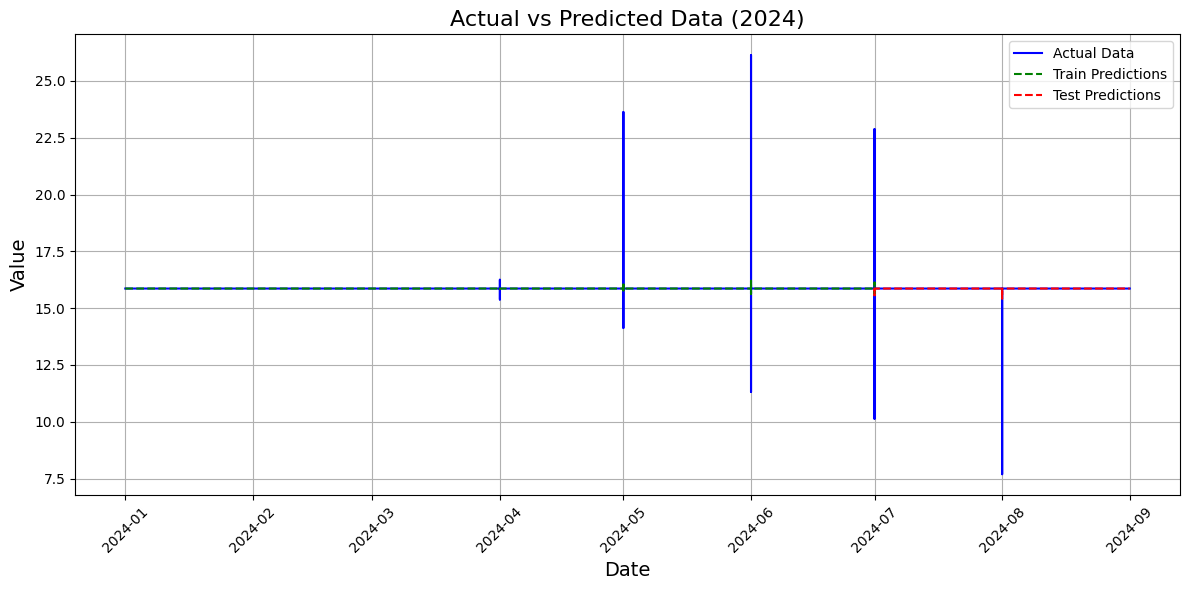

In [ ]:
def plot_predictions_with_dates_2024(dates, dataset, trainPredict, testPredict, scaler, look_back):
    """
    Plots actual vs predicted values with dates limited to 2024 on the x-axis.

    Args:
        dates (pd.Series): Series of dates corresponding to the dataset.
        dataset (np.array): Scaled dataset (original data).
        trainPredict (np.array): Predictions for training data.
        testPredict (np.array): Predictions for testing data.
        scaler (MinMaxScaler): Scaler used to normalize the data.
        look_back (int): Number of time steps used in input sequences.
    """
    # Invert scaling for the dataset
    dataset_inversed = scaler.inverse_transform(dataset)

    # Prepare training prediction plot
    trainPredictPlot = np.empty_like(dataset_inversed)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict

    # Prepare testing prediction plot
    testPredictPlot = np.empty_like(dataset_inversed)
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(trainPredict) + (look_back * 2):len(dataset_inversed), :] = testPredict

    # Filter dates and corresponding data for 2024
    mask_2024 = dates.dt.year == 2024
    dates_2024 = dates[mask_2024]
    dataset_inversed_2024 = dataset_inversed[mask_2024.values]
    trainPredictPlot_2024 = trainPredictPlot[mask_2024.values]
    testPredictPlot_2024 = testPredictPlot[mask_2024.values]

    # Plot the data
    plt.figure(figsize=(12, 6))
    plt.plot(dates_2024, dataset_inversed_2024, label='Actual Data', color='blue')
    plt.plot(dates_2024, trainPredictPlot_2024, label='Train Predictions', color='green', linestyle='--')
    plt.plot(dates_2024, testPredictPlot_2024, label='Test Predictions', color='red', linestyle='--')
    plt.title('Actual vs Predicted Data (2024)', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Value', fontsize=14)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Ensure 'dates' is a pandas Series of datetime objects
dates = pd.to_datetime(merged_full_data_cleaned['detection_date'], errors='coerce')

# Plot predictions strictly for 2024
plot_predictions_with_dates_2024(dates, dataset_scaled, trainPredict, testPredict, scaler, look_back)



In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# from matplotlib.dates import DateFormatter

# # Ensure 'detection_date' is properly formatted as datetime
# all_pests_aggregated['detection_date'] = pd.to_datetime(all_pests_aggregated['detection_date'], errors='coerce')

# # Filter for test dates in 2024
# test_dates = all_pests_aggregated['detection_date'][-len(y_test):]

# # Make predictions on the test data
# predictions = model.predict(X_test)

# # Inverse transform the actual test values and predictions
# y_test_actual = scaler.inverse_transform(
#     np.hstack([np.zeros((y_test.shape[0], len(features) - 1)), y_test.reshape(-1, 1)])
# )[:, -1]
# predictions_actual = scaler.inverse_transform(
#     np.hstack([np.zeros((predictions.shape[0], len(features) - 1)), predictions.reshape(-1, 1)])
# )[:, -1]

# # Apply Moving Average Smoothing
# window_size = 3
# smoothed_actual = pd.Series(y_test_actual).rolling(window=window_size, min_periods=1).mean()
# smoothed_predicted = pd.Series(predictions_actual).rolling(window=window_size, min_periods=1).mean()

# # --------- Plot the Data ---------
# plt.figure(figsize=(14, 8))

# # Plot actual values
# plt.plot(test_dates, y_test_actual, label='Actual Area Infested', color='black', linestyle='-', linewidth=2)
# plt.plot(test_dates, predictions_actual, label='Predicted Area Infested', color='red', linestyle='--', linewidth=2)
# plt.plot(test_dates, smoothed_actual, label='Smoothed Actual Area Infested', color='green', linestyle='-', linewidth=2)

# # Title and labels
# plt.title('Time Series: Actual vs Predicted Area Infested (2024)', fontsize=16)
# plt.xlabel('Month (2024)', fontsize=14)
# plt.ylabel('Area Infested', fontsize=14)

# # Format the x-axis to show months
# plt.gca().xaxis.set_major_formatter(DateFormatter('%b'))  # Month abbreviations (Jan, Feb, etc.)

# # Rotate the x-axis labels for better readability
# plt.xticks(rotation=45)

# # Set y-axis limits and ticks
# plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.2))  # Ticks every 0.2 units
# plt.ylim(0, max(y_test_actual.max(), predictions_actual.max()) + 0.1)  # Dynamic y-axis limit

# # Add grid and legend
# plt.grid(True)
# plt.legend()
# plt.tight_layout()

# # Display the plot
# plt.show()
